<a href="https://colab.research.google.com/github/ssubin29/KaggleStruggle/blob/main/StateFarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle API 연동

In [ ]:
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

ERROR: Operation cancelled by user


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir dataset

In [4]:
!unzip /content/drive/MyDrive/Colab/KaggleStruggle/dataset/statefarm/state-farm-distracted-driver-detection.zip -d /content/dataset

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/dataset/imgs/train/c7/img_56636.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56661.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56699.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56717.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56724.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56768.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56779.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56849.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56899.jpg  
  inflating: /content/dataset/imgs/train/c7/img_56938.jpg  
  inflating: /content/dataset/imgs/train/c7/img_5706.jpg  
  inflating: /content/dataset/imgs/train/c7/img_57076.jpg  
  inflating: /content/dataset/imgs/train/c7/img_57122.jpg  
  inflating: /content/dataset/imgs/train/c7/img_57137.jpg  
  inflating: /content/dataset/imgs/train/c7/img_5715.jpg  
  inflating: /content/dataset/imgs/train/c7/img_57278.jpg  
  infl

#  practice

In [ ]:
# -*- coding: utf-8 -*-
"""
@author: Giba1
"""
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import sys
from skimage import io, transform
import matplotlib.animation as animation

train = pd.read_csv('/content/dataset/driver_imgs_list.csv' )
train['id'] = range( train.shape[0] )
fig = plt.figure()
subj = np.unique( train['subject'])[0]

for subj in np.unique( train['subject'])[:2]:

    imagem = train[ train['subject']==subj ]
    
    imgs = []
    t = imagem.values[0]
    for t in imagem.values:
        img = cv2.imread('/content/dataset/imgs/train/'+t[1]+'/'+t[2],3)
        img = cv2.resize(img, (160, 120))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append( img )
        
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1,wspace=None, hspace=None)  # removes white border
    fname = 'MOVIE_subject_'+subj+'.gif'
    imgs = [ (ax.imshow(img), 
              ax.set_title(t[0]), 
              ax.annotate(n_img,(5,5))) for n_img, img in enumerate(imgs) ] 
    img_anim = animation.ArtistAnimation(fig, imgs, interval=125, 
                                repeat_delay=1000, blit=False)
    print('Writing:', fname)
    print(img_anim)
    img_anim.save(fname, writer='imagemagick', dpi=20)
    print(0)
    fig.clf()
print ('Now relax and watch some movies!!!')


# Any results you write to the current directory are saved as output.

MovieWriter imagemagick unavailable; trying to use pillow instead.


Writing: MOVIE_subject_p002.gif


TypeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f24001c6cb0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f24001cf320> (for post_execute):


KeyboardInterrupt: ignored

# Import module

In [5]:
import os
from glob import glob
import random
import time
import tensorflow
import datetime
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

from tqdm import tqdm

import numpy as np
import pandas as pd
from IPython.display import FileLink
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
%matplotlib inline
from IPython.display import display, Image
import matplotlib.image as mpimg
import cv2

#!pip uninstall scikit-learn
#!pip install scikit-learn==0.20.1
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files       
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, \
                                       ZeroPadding2D

In [6]:
dataset = pd.read_csv('/content/dataset/driver_imgs_list.csv')
dataset.head(5)

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

In [7]:
by_drivers = dataset.groupby('subject')
unique_drivers = by_drivers.groups.keys()
print(unique_drivers)

dict_keys(['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072', 'p075', 'p081'])


In [8]:
# Load the dataset previously downloaded from Kaggle
NUMBER_CLASSES = 10

# Color type: 1 - grey, 3 - rgb

# cv2로 image를 읽고 64x64로 resize
def get_cv2_image(path, img_rows, img_cols, color_type=3):
    # Loading as Grayscale image
    if color_type == 1:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #gray로 읽기
    elif color_type == 3:
        img = cv2.imread(path, cv2.IMREAD_COLOR) #color로 읽기
    # Reduce size
    img = cv2.resize(img, (img_rows, img_cols)) #64x64로 resize
    return img

# c0~c9 image load (c0~9 become labels(after one-hot encoding) become Y, image(after one-hot encoding) become train_X)
def load_train(img_rows, img_cols, color_type=3):
    start_time = time.time()
    train_images = [] 
    train_labels = []
    # Loop over the training folder 
    for classed in tqdm(range(NUMBER_CLASSES)):
        print(f'classed {classed}')
        print('Loading directory c{}'.format(classed))
        files = glob(os.path.join('/content/dataset', 'imgs', 'train', 'c' + str(classed), '*.jpg'))
        print(files)
        for file in files:
            img = get_cv2_image(file, img_rows, img_cols, color_type)
            train_images.append(img)
            train_labels.append(classed)
    print("Data Loaded in {} second".format(time.time() - start_time))
    print(train_labels)
    return train_images, train_labels 

def read_and_normalize_train_data(img_rows, img_cols, color_type):
    X, labels = load_train(img_rows, img_cols, color_type)
    y = np_utils.to_categorical(labels, 10)
    # to_categorical은 one-hot encoding 실행 10진 정수 형식을 특수한 2진 바이너리 형식으로 변경 
    # 10 크기의 배열에 labels 위치에만 1

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # train/test split for practice
    
    x_train = np.array(x_train, dtype=np.uint8).reshape(-1,img_rows,img_cols,color_type)
    x_test = np.array(x_test, dtype=np.uint8).reshape(-1,img_rows,img_cols,color_type)
    
    return x_train, x_test, y_train, y_test

# Validation
def load_test(size=200000, img_rows=64, img_cols=64, color_type=3):
    path = os.path.join('/content/dataset', 'imgs', 'test', '*.jpg')
    files = sorted(glob(path))
    X_test, X_test_id = [], []
    total = 0
    files_size = len(files)
    for file in tqdm(files):
        if total >= size or total >= files_size:
            break
        file_base = os.path.basename(file)
        img = get_cv2_image(file, img_rows, img_cols, color_type)
        X_test.append(img)
        X_test_id.append(file_base)
        total += 1
    return X_test, X_test_id

def read_and_normalize_sampled_test_data(size, img_rows, img_cols, color_type=3):
    test_data, test_ids = load_test(size, img_rows, img_cols, color_type)
    
    test_data = np.array(test_data, dtype=np.uint8)
    test_data = test_data.reshape(-1,img_rows,img_cols,color_type)
    
    return test_data, test_ids

In [9]:
img_rows = 64
img_cols = 64
color_type = 1

In [10]:
x_train, x_test, y_train, y_test = read_and_normalize_train_data(img_rows, img_cols, color_type)
print('Train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

  0%|          | 0/10 [00:00<?, ?it/s]

classed 0
Loading directory c0
['/content/dataset/imgs/train/c0/img_13675.jpg', '/content/dataset/imgs/train/c0/img_36206.jpg', '/content/dataset/imgs/train/c0/img_11914.jpg', '/content/dataset/imgs/train/c0/img_29340.jpg', '/content/dataset/imgs/train/c0/img_7547.jpg', '/content/dataset/imgs/train/c0/img_51347.jpg', '/content/dataset/imgs/train/c0/img_92645.jpg', '/content/dataset/imgs/train/c0/img_79289.jpg', '/content/dataset/imgs/train/c0/img_59232.jpg', '/content/dataset/imgs/train/c0/img_89362.jpg', '/content/dataset/imgs/train/c0/img_32901.jpg', '/content/dataset/imgs/train/c0/img_28569.jpg', '/content/dataset/imgs/train/c0/img_62023.jpg', '/content/dataset/imgs/train/c0/img_87666.jpg', '/content/dataset/imgs/train/c0/img_83282.jpg', '/content/dataset/imgs/train/c0/img_26740.jpg', '/content/dataset/imgs/train/c0/img_93094.jpg', '/content/dataset/imgs/train/c0/img_9198.jpg', '/content/dataset/imgs/train/c0/img_39359.jpg', '/content/dataset/imgs/train/c0/img_68866.jpg', '/content/

 10%|█         | 1/10 [00:04<00:44,  4.89s/it]

classed 1
Loading directory c1
['/content/dataset/imgs/train/c1/img_17527.jpg', '/content/dataset/imgs/train/c1/img_64868.jpg', '/content/dataset/imgs/train/c1/img_62070.jpg', '/content/dataset/imgs/train/c1/img_8977.jpg', '/content/dataset/imgs/train/c1/img_74840.jpg', '/content/dataset/imgs/train/c1/img_45471.jpg', '/content/dataset/imgs/train/c1/img_13405.jpg', '/content/dataset/imgs/train/c1/img_63254.jpg', '/content/dataset/imgs/train/c1/img_45998.jpg', '/content/dataset/imgs/train/c1/img_28847.jpg', '/content/dataset/imgs/train/c1/img_95843.jpg', '/content/dataset/imgs/train/c1/img_79378.jpg', '/content/dataset/imgs/train/c1/img_69281.jpg', '/content/dataset/imgs/train/c1/img_101267.jpg', '/content/dataset/imgs/train/c1/img_27622.jpg', '/content/dataset/imgs/train/c1/img_41251.jpg', '/content/dataset/imgs/train/c1/img_8943.jpg', '/content/dataset/imgs/train/c1/img_41670.jpg', '/content/dataset/imgs/train/c1/img_17819.jpg', '/content/dataset/imgs/train/c1/img_57226.jpg', '/content

 20%|██        | 2/10 [00:09<00:36,  4.62s/it]

classed 2
Loading directory c2
['/content/dataset/imgs/train/c2/img_89885.jpg', '/content/dataset/imgs/train/c2/img_55731.jpg', '/content/dataset/imgs/train/c2/img_61637.jpg', '/content/dataset/imgs/train/c2/img_51015.jpg', '/content/dataset/imgs/train/c2/img_90482.jpg', '/content/dataset/imgs/train/c2/img_74799.jpg', '/content/dataset/imgs/train/c2/img_25729.jpg', '/content/dataset/imgs/train/c2/img_68490.jpg', '/content/dataset/imgs/train/c2/img_92409.jpg', '/content/dataset/imgs/train/c2/img_22592.jpg', '/content/dataset/imgs/train/c2/img_61167.jpg', '/content/dataset/imgs/train/c2/img_38915.jpg', '/content/dataset/imgs/train/c2/img_1595.jpg', '/content/dataset/imgs/train/c2/img_48628.jpg', '/content/dataset/imgs/train/c2/img_89023.jpg', '/content/dataset/imgs/train/c2/img_29737.jpg', '/content/dataset/imgs/train/c2/img_88852.jpg', '/content/dataset/imgs/train/c2/img_91592.jpg', '/content/dataset/imgs/train/c2/img_11080.jpg', '/content/dataset/imgs/train/c2/img_43578.jpg', '/content

 30%|███       | 3/10 [00:13<00:31,  4.54s/it]

classed 3
Loading directory c3
['/content/dataset/imgs/train/c3/img_1879.jpg', '/content/dataset/imgs/train/c3/img_51491.jpg', '/content/dataset/imgs/train/c3/img_10928.jpg', '/content/dataset/imgs/train/c3/img_79626.jpg', '/content/dataset/imgs/train/c3/img_55298.jpg', '/content/dataset/imgs/train/c3/img_82705.jpg', '/content/dataset/imgs/train/c3/img_34510.jpg', '/content/dataset/imgs/train/c3/img_70450.jpg', '/content/dataset/imgs/train/c3/img_76472.jpg', '/content/dataset/imgs/train/c3/img_26873.jpg', '/content/dataset/imgs/train/c3/img_93420.jpg', '/content/dataset/imgs/train/c3/img_9309.jpg', '/content/dataset/imgs/train/c3/img_74659.jpg', '/content/dataset/imgs/train/c3/img_48657.jpg', '/content/dataset/imgs/train/c3/img_97271.jpg', '/content/dataset/imgs/train/c3/img_86906.jpg', '/content/dataset/imgs/train/c3/img_88171.jpg', '/content/dataset/imgs/train/c3/img_50800.jpg', '/content/dataset/imgs/train/c3/img_13964.jpg', '/content/dataset/imgs/train/c3/img_20267.jpg', '/content/

 40%|████      | 4/10 [00:18<00:27,  4.53s/it]

classed 4
Loading directory c4
['/content/dataset/imgs/train/c4/img_19580.jpg', '/content/dataset/imgs/train/c4/img_47902.jpg', '/content/dataset/imgs/train/c4/img_61376.jpg', '/content/dataset/imgs/train/c4/img_12333.jpg', '/content/dataset/imgs/train/c4/img_69941.jpg', '/content/dataset/imgs/train/c4/img_36298.jpg', '/content/dataset/imgs/train/c4/img_80127.jpg', '/content/dataset/imgs/train/c4/img_66478.jpg', '/content/dataset/imgs/train/c4/img_64192.jpg', '/content/dataset/imgs/train/c4/img_6469.jpg', '/content/dataset/imgs/train/c4/img_15721.jpg', '/content/dataset/imgs/train/c4/img_69592.jpg', '/content/dataset/imgs/train/c4/img_48398.jpg', '/content/dataset/imgs/train/c4/img_28448.jpg', '/content/dataset/imgs/train/c4/img_58467.jpg', '/content/dataset/imgs/train/c4/img_6007.jpg', '/content/dataset/imgs/train/c4/img_14023.jpg', '/content/dataset/imgs/train/c4/img_45024.jpg', '/content/dataset/imgs/train/c4/img_99580.jpg', '/content/dataset/imgs/train/c4/img_65472.jpg', '/content/

 50%|█████     | 5/10 [00:22<00:22,  4.51s/it]

classed 5
Loading directory c5
['/content/dataset/imgs/train/c5/img_1821.jpg', '/content/dataset/imgs/train/c5/img_69669.jpg', '/content/dataset/imgs/train/c5/img_48411.jpg', '/content/dataset/imgs/train/c5/img_92441.jpg', '/content/dataset/imgs/train/c5/img_38824.jpg', '/content/dataset/imgs/train/c5/img_84162.jpg', '/content/dataset/imgs/train/c5/img_26282.jpg', '/content/dataset/imgs/train/c5/img_44462.jpg', '/content/dataset/imgs/train/c5/img_17715.jpg', '/content/dataset/imgs/train/c5/img_99965.jpg', '/content/dataset/imgs/train/c5/img_48723.jpg', '/content/dataset/imgs/train/c5/img_46664.jpg', '/content/dataset/imgs/train/c5/img_69090.jpg', '/content/dataset/imgs/train/c5/img_78284.jpg', '/content/dataset/imgs/train/c5/img_74344.jpg', '/content/dataset/imgs/train/c5/img_67163.jpg', '/content/dataset/imgs/train/c5/img_22514.jpg', '/content/dataset/imgs/train/c5/img_97152.jpg', '/content/dataset/imgs/train/c5/img_1467.jpg', '/content/dataset/imgs/train/c5/img_77583.jpg', '/content/

 60%|██████    | 6/10 [00:27<00:17,  4.50s/it]

classed 6
Loading directory c6
['/content/dataset/imgs/train/c6/img_27120.jpg', '/content/dataset/imgs/train/c6/img_97620.jpg', '/content/dataset/imgs/train/c6/img_18694.jpg', '/content/dataset/imgs/train/c6/img_25851.jpg', '/content/dataset/imgs/train/c6/img_48760.jpg', '/content/dataset/imgs/train/c6/img_19438.jpg', '/content/dataset/imgs/train/c6/img_48493.jpg', '/content/dataset/imgs/train/c6/img_56037.jpg', '/content/dataset/imgs/train/c6/img_97240.jpg', '/content/dataset/imgs/train/c6/img_60617.jpg', '/content/dataset/imgs/train/c6/img_24001.jpg', '/content/dataset/imgs/train/c6/img_97054.jpg', '/content/dataset/imgs/train/c6/img_70510.jpg', '/content/dataset/imgs/train/c6/img_81728.jpg', '/content/dataset/imgs/train/c6/img_79492.jpg', '/content/dataset/imgs/train/c6/img_54065.jpg', '/content/dataset/imgs/train/c6/img_38382.jpg', '/content/dataset/imgs/train/c6/img_96573.jpg', '/content/dataset/imgs/train/c6/img_76008.jpg', '/content/dataset/imgs/train/c6/img_46973.jpg', '/conten

 70%|███████   | 7/10 [00:31<00:13,  4.50s/it]

classed 7
Loading directory c7
['/content/dataset/imgs/train/c7/img_8778.jpg', '/content/dataset/imgs/train/c7/img_91037.jpg', '/content/dataset/imgs/train/c7/img_1990.jpg', '/content/dataset/imgs/train/c7/img_77499.jpg', '/content/dataset/imgs/train/c7/img_5771.jpg', '/content/dataset/imgs/train/c7/img_1220.jpg', '/content/dataset/imgs/train/c7/img_98947.jpg', '/content/dataset/imgs/train/c7/img_18056.jpg', '/content/dataset/imgs/train/c7/img_95855.jpg', '/content/dataset/imgs/train/c7/img_69785.jpg', '/content/dataset/imgs/train/c7/img_4292.jpg', '/content/dataset/imgs/train/c7/img_64642.jpg', '/content/dataset/imgs/train/c7/img_16777.jpg', '/content/dataset/imgs/train/c7/img_6810.jpg', '/content/dataset/imgs/train/c7/img_44782.jpg', '/content/dataset/imgs/train/c7/img_72354.jpg', '/content/dataset/imgs/train/c7/img_18051.jpg', '/content/dataset/imgs/train/c7/img_55210.jpg', '/content/dataset/imgs/train/c7/img_71373.jpg', '/content/dataset/imgs/train/c7/img_4505.jpg', '/content/datas

 80%|████████  | 8/10 [00:35<00:08,  4.31s/it]

classed 8
Loading directory c8
['/content/dataset/imgs/train/c8/img_32279.jpg', '/content/dataset/imgs/train/c8/img_23521.jpg', '/content/dataset/imgs/train/c8/img_26378.jpg', '/content/dataset/imgs/train/c8/img_54016.jpg', '/content/dataset/imgs/train/c8/img_62031.jpg', '/content/dataset/imgs/train/c8/img_53620.jpg', '/content/dataset/imgs/train/c8/img_43496.jpg', '/content/dataset/imgs/train/c8/img_56050.jpg', '/content/dataset/imgs/train/c8/img_72701.jpg', '/content/dataset/imgs/train/c8/img_26230.jpg', '/content/dataset/imgs/train/c8/img_74520.jpg', '/content/dataset/imgs/train/c8/img_27683.jpg', '/content/dataset/imgs/train/c8/img_93006.jpg', '/content/dataset/imgs/train/c8/img_27991.jpg', '/content/dataset/imgs/train/c8/img_58392.jpg', '/content/dataset/imgs/train/c8/img_64193.jpg', '/content/dataset/imgs/train/c8/img_56850.jpg', '/content/dataset/imgs/train/c8/img_80528.jpg', '/content/dataset/imgs/train/c8/img_18000.jpg', '/content/dataset/imgs/train/c8/img_48621.jpg', '/conten

 90%|█████████ | 9/10 [00:39<00:04,  4.12s/it]

classed 9
Loading directory c9
['/content/dataset/imgs/train/c9/img_28334.jpg', '/content/dataset/imgs/train/c9/img_17513.jpg', '/content/dataset/imgs/train/c9/img_88856.jpg', '/content/dataset/imgs/train/c9/img_35802.jpg', '/content/dataset/imgs/train/c9/img_32091.jpg', '/content/dataset/imgs/train/c9/img_86909.jpg', '/content/dataset/imgs/train/c9/img_68143.jpg', '/content/dataset/imgs/train/c9/img_13982.jpg', '/content/dataset/imgs/train/c9/img_33064.jpg', '/content/dataset/imgs/train/c9/img_66278.jpg', '/content/dataset/imgs/train/c9/img_27399.jpg', '/content/dataset/imgs/train/c9/img_50806.jpg', '/content/dataset/imgs/train/c9/img_45771.jpg', '/content/dataset/imgs/train/c9/img_61562.jpg', '/content/dataset/imgs/train/c9/img_16842.jpg', '/content/dataset/imgs/train/c9/img_63020.jpg', '/content/dataset/imgs/train/c9/img_13318.jpg', '/content/dataset/imgs/train/c9/img_24715.jpg', '/content/dataset/imgs/train/c9/img_47320.jpg', '/content/dataset/imgs/train/c9/img_77467.jpg', '/conten

100%|██████████| 10/10 [00:43<00:00,  4.35s/it]

Data Loaded in 43.487141847610474 second
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [11]:
nb_test_samples = 200
test_files, test_targets = read_and_normalize_sampled_test_data(nb_test_samples, img_rows, img_cols, color_type)
print('Test shape:', test_files.shape)
print(test_files.shape[0], 'Test samples')

  0%|          | 200/79726 [00:00<03:17, 403.35it/s]

Test shape: (200, 64, 64, 1)
200 Test samples


# Data Statistics

In [12]:
# Statistics
# Load the list of names
names = [item[17:19] for item in sorted(glob("/content/dataset/imgs/train/*/"))]
test_files_size = len(np.array(glob(os.path.join('/content/dataset', 'imgs', 'test', '*.jpg'))))
x_train_size = len(x_train)
categories_size = len(names)
x_test_size = len(x_test)
print('There are %s total images.\n' % (test_files_size + x_train_size + x_test_size))
print('There are %d training images.' % x_train_size)
print('There are %d total training categories.' % categories_size)
print('There are %d validation images.' % x_test_size)
print('There are %d test images.'% test_files_size)

There are 102150 total images.

There are 17939 training images.
There are 10 total training categories.
There are 4485 validation images.
There are 79726 test images.


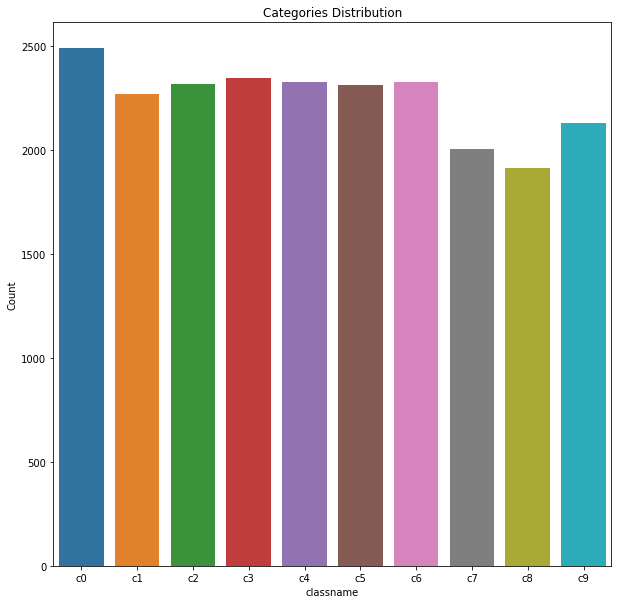

In [13]:
# Plot figure size
plt.figure(figsize = (10,10))
# Count the number of images per category
sns.countplot(x = 'classname', data = dataset)
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution')
# Show plot
plt.show()

In [14]:
# Find the frequency of images per driver
drivers_id = pd.DataFrame((dataset['subject'].value_counts()).reset_index())
drivers_id.columns = ['driver_id', 'Counts']
drivers_id

driver_id  Counts
0       p021    1237
1       p022    1233
2       p024    1226
3       p026    1196
4       p016    1078
5       p066    1034
6       p049    1011
7       p051     920
8       p014     876
9       p015     875
10      p035     848
11      p047     835
12      p081     823
13      p012     823
14      p064     820
15      p075     814
16      p061     809
17      p056     794
18      p050     790
19      p052     740
20      p002     725
21      p045     724
22      p039     651
23      p041     605
24      p042     591
25      p072     346

<Figure size 1440x1440 with 0 Axes>

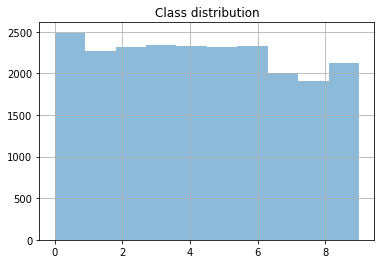

In [15]:
# Plotting class distribution
dataset['class_type'] = dataset['classname'].str.extract('(\d)',expand=False).astype(np.float)
plt.figure(figsize = (20,20))
dataset.hist('class_type', alpha=0.5, layout=(1,1), bins=10)
plt.title('Class distribution')
plt.show()

# image overview

In [16]:
activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

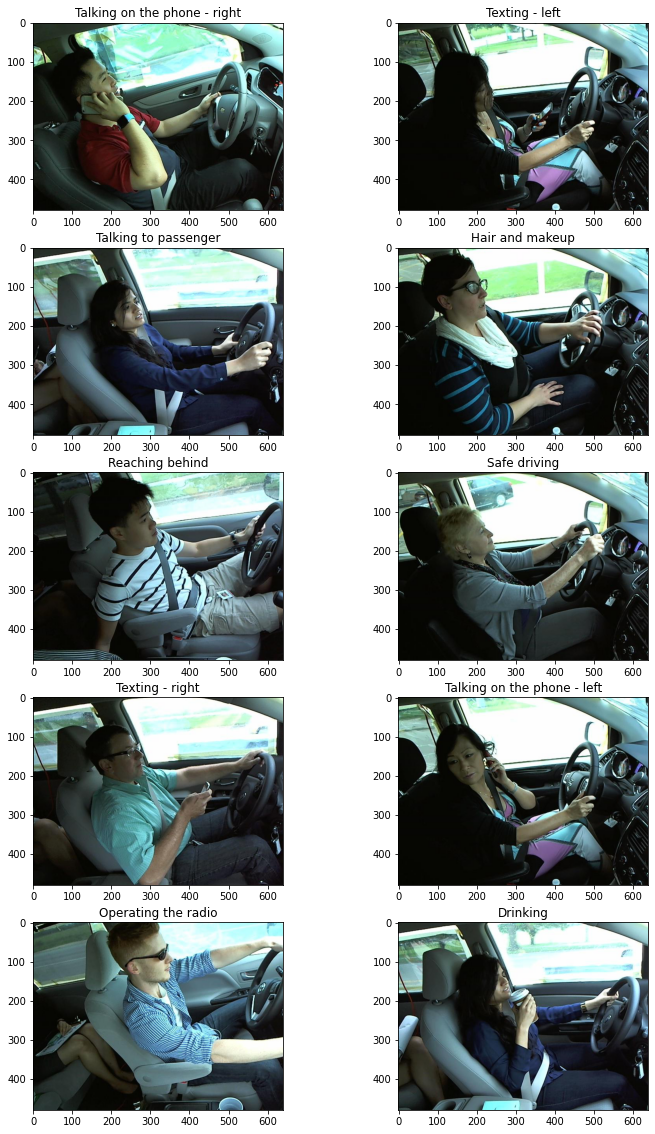

In [17]:
plt.figure(figsize = (12, 20))
image_count = 1
BASE_URL = '/content/dataset/imgs/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
      for i, file in enumerate(os.listdir(BASE_URL + directory)):
          if i == 1:
              break
          else:
              fig = plt.subplot(5, 2, image_count)
              image_count += 1
              image = mpimg.imread(BASE_URL + directory + '/' + file)
              # imread 함수를 통해 jpg 불러오기
              plt.imshow(image)
              plt.title(activity_map[directory])

In [18]:
def create_submission(predictions, test_id, info):
    result = pd.DataFrame(predictions, columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
    result.loc[:, 'img'] = pd.Series(test_id, index=result.index)
    
    now = datetime.datetime.now()
    
    if not os.path.isdir('kaggle_submissions'):
        os.mkdir('kaggle_submissions')

    suffix = "{}_{}".format(info,str(now.strftime("%Y-%m-%d-%H-%M")))
    sub_file = os.path.join('kaggle_submissions', 'submission_' + suffix + '.csv')
    
    result.to_csv(sub_file, index=False)
    
    return sub_file

# Create banilla CNN model

In [19]:
batch_size = 40
nb_epoch = 10

In [20]:
!rm -f saved_models/weights_best_vanilla.hdf5

In [21]:
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    
checkpointer = ModelCheckpoint(filepath='saved_models/weights_best_vanilla.hdf5', 
                               monitor='val_loss', mode='min',
                               verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
callbacks = [checkpointer, es]

In [22]:
def create_model_v1():
    # Vanilla CNN model
    model = Sequential()

    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same', activation = 'relu', input_shape=(img_rows, img_cols, color_type)))
    model.add(MaxPooling2D(pool_size = 2))

    model.add(Conv2D(filters = 128, padding='same', kernel_size = 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))

    model.add(Conv2D(filters = 256, padding='same', kernel_size = 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))

    model.add(Conv2D(filters = 512, padding='same', kernel_size = 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))

    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))
    
    return model

In [23]:
model_v1 = create_model_v1()

# More details about the layers
model_v1.summary()

# Compiling the model
model_v1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 256)        0

In [ ]:
# Training the Vanilla Model version 1
history_v1 = model_v1.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          callbacks=callbacks,
          epochs=nb_epoch, batch_size=batch_size, verbose=1)

Epoch 1/10
330/449 [=====================>........] - ETA: 2:36 - loss: 2.4731 - accuracy: 0.4347

In [ ]:
model_v1.load_weights('saved_models/weights_best_vanilla.hdf5')

In [ ]:
def plot_train_history(history):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

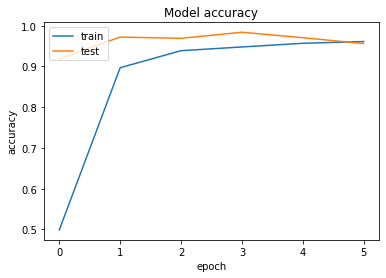

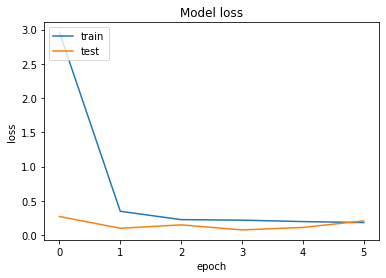

In [ ]:
plot_train_history(history_v1)

In [ ]:
def plot_test_class(model, test_files, image_number, color_type=1):
    img_brute = test_files[image_number]
    img_brute = cv2.resize(img_brute,(img_rows,img_cols))
    plt.imshow(img_brute, cmap='gray')

    new_img = img_brute.reshape(-1,img_rows,img_cols,color_type)

    y_prediction = model.predict(new_img, batch_size=batch_size, verbose=1)

    
    print('Y prediction: {}'.format(y_prediction))
    print('Predicted: {}'.format('c{}'.format(np.argmax(y_prediction))))
    # np.argmax 다차원 배열의 경우에 차원에 따라 가장 큰 값의 인덱스를 반환 -> c0~9중 가장 큰 값이 바로 예측값이 되는 것
    
    plt.show()

In [ ]:
score = model_v1.evaluate(x_test, y_test, verbose=1)
print('Score: ', score)

141/141 [==============================] - 2s 12ms/step - loss: 0.0772 - accuracy: 0.9839
Score:  [0.07724905759096146, 0.9839465022087097]


1/1 [==============================] - 0s 200ms/step
Y prediction: [[1.05996078e-05 6.92100934e-12 7.42739724e-12 1.28727425e-02
  9.62686419e-01 2.35681012e-02 1.93486855e-07 4.26245306e-09
  3.72625436e-05 8.24543939e-04]]
Predicted: c4


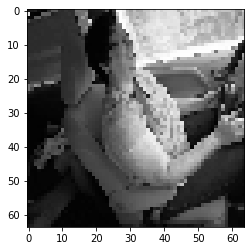

In [ ]:
plot_test_class(model_v1, test_files, 30)

In [ ]:
submission = pd.read_csv("/content/dataset/sample_submission.csv")
submission[['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']] = submission[['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']].astype(int)
submission.head()

img  c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
0       img_1.jpg   0   0   0   0   0   0   0   0   0   0
1      img_10.jpg   0   0   0   0   0   0   0   0   0   0
2     img_100.jpg   0   0   0   0   0   0   0   0   0   0
3    img_1000.jpg   0   0   0   0   0   0   0   0   0   0
4  img_100000.jpg   0   0   0   0   0   0   0   0   0   0

In [ ]:
submission.shape[0]

79726

In [ ]:
test_files.shape[0]

200

In [ ]:
nb_test_samples = 819200
test_files, test_targets = read_and_normalize_sampled_test_data(nb_test_samples, img_rows, img_cols, color_type)
print('Test shape:', test_files.shape)
print(test_files.shape[0], 'Test samples')

100%|██████████| 79726/79726 [02:51<00:00, 464.02it/s]


Test shape: (79726, 64, 64, 1)
79726 Test samples


In [ ]:
def make_submission(model, test_files, color_type=1):
    for image_number in tqdm(range(test_files.shape[0])):
        img_brute = test_files[image_number]
        img_brute = cv2.resize(img_brute,(img_rows,img_cols))

        new_img = img_brute.reshape(-1,img_rows,img_cols,color_type)

        y_prediction = model.predict(new_img, batch_size=batch_size, verbose=1)

        submission.loc[image_number]['c{}'.format(np.argmax(y_prediction))] = 1

    submission.to_csv('submission.csv', header=True,index=False)
    !kaggle competitions submit -c state-farm-distracted-driver-detection -f submission.csv -m "use CNN"


In [ ]:
make_submission(model_v1, test_files, color_type=1)

  0%|          | 0/79726 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 2/79726 [00:00<1:38:29, 13.49it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 4/79726 [00:00<1:31:49, 14.47it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 6/79726 [00:00<1:30:32, 14.68it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 8/79726 [00:00<1:37:20, 13.65it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 10/79726 [00:00<1:34:26, 14.07it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 12/79726 [00:00<1:35:04, 13.97it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 14/79726 [00:00<1:33:13, 14.25it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 16/79726 [00:01<1:34:22, 14.08it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 18/79726 [00:01<1:34:24, 14.07it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 20/79726 [00:01<1:31:18, 14.55it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 22/79726 [00:01<1:29:12, 14.89it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 24/79726 [00:01<1:30:53, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 26/79726 [00:02<2:12:15, 10.04it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 28/79726 [00:02<1:57:46, 11.28it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 30/79726 [00:02<1:53:23, 11.71it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 32/79726 [00:02<1:46:38, 12.45it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 34/79726 [00:02<1:43:35, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 36/79726 [00:02<1:39:12, 13.39it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 38/79726 [00:02<1:39:39, 13.33it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 40/79726 [00:03<1:37:33, 13.61it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 42/79726 [00:03<1:39:52, 13.30it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 44/79726 [00:03<1:38:07, 13.53it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 46/79726 [00:03<1:36:57, 13.70it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 48/79726 [00:03<1:34:25, 14.06it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 50/79726 [00:03<1:36:39, 13.74it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 52/79726 [00:03<1:37:11, 13.66it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 54/79726 [00:04<1:34:11, 14.10it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 56/79726 [00:04<1:33:43, 14.17it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 58/79726 [00:04<1:34:30, 14.05it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 60/79726 [00:04<1:34:16, 14.08it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 62/79726 [00:04<1:33:07, 14.26it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 64/79726 [00:04<1:32:51, 14.30it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 66/79726 [00:04<1:40:29, 13.21it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 68/79726 [00:05<1:35:14, 13.94it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 70/79726 [00:05<1:32:01, 14.43it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 72/79726 [00:05<1:34:21, 14.07it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 74/79726 [00:05<1:32:46, 14.31it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 76/79726 [00:05<1:33:21, 14.22it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 78/79726 [00:05<1:34:02, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 80/79726 [00:05<1:34:44, 14.01it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 82/79726 [00:06<1:34:39, 14.02it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 84/79726 [00:06<1:32:44, 14.31it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 86/79726 [00:06<1:31:05, 14.57it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 88/79726 [00:06<1:29:04, 14.90it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 90/79726 [00:06<1:33:27, 14.20it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 92/79726 [00:06<1:32:32, 14.34it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 94/79726 [00:06<1:32:16, 14.38it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 96/79726 [00:06<1:33:35, 14.18it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 98/79726 [00:07<1:35:48, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 100/79726 [00:07<1:34:17, 14.08it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 102/79726 [00:07<1:33:30, 14.19it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 104/79726 [00:07<1:31:13, 14.55it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 106/79726 [00:07<1:33:12, 14.24it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 108/79726 [00:07<1:32:24, 14.36it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 110/79726 [00:07<1:32:29, 14.35it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 112/79726 [00:08<1:32:23, 14.36it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 114/79726 [00:08<1:30:21, 14.69it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 116/79726 [00:08<1:33:21, 14.21it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 118/79726 [00:08<1:34:15, 14.08it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 120/79726 [00:08<1:33:24, 14.20it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 122/79726 [00:08<1:34:35, 14.03it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 124/79726 [00:08<1:37:22, 13.62it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 126/79726 [00:09<1:36:42, 13.72it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 128/79726 [00:09<1:36:22, 13.77it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 130/79726 [00:09<1:36:08, 13.80it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 132/79726 [00:09<1:38:57, 13.41it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 134/79726 [00:09<1:39:15, 13.36it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 136/79726 [00:09<1:39:30, 13.33it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 138/79726 [00:09<1:37:57, 13.54it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 140/79726 [00:10<1:37:44, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 142/79726 [00:10<1:35:49, 13.84it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 144/79726 [00:10<1:36:00, 13.82it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 146/79726 [00:10<1:33:02, 14.26it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 148/79726 [00:10<1:32:52, 14.28it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 150/79726 [00:10<1:31:51, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 152/79726 [00:10<1:33:41, 14.16it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 154/79726 [00:11<1:33:37, 14.16it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 156/79726 [00:11<1:32:20, 14.36it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 158/79726 [00:11<1:34:49, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 160/79726 [00:11<1:34:31, 14.03it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 162/79726 [00:11<1:36:04, 13.80it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 164/79726 [00:11<1:35:16, 13.92it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 166/79726 [00:11<1:37:59, 13.53it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 168/79726 [00:12<1:36:24, 13.75it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 170/79726 [00:12<1:35:08, 13.94it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 172/79726 [00:12<1:34:10, 14.08it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 174/79726 [00:12<1:35:06, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 176/79726 [00:12<1:45:42, 12.54it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 178/79726 [00:12<1:41:54, 13.01it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 180/79726 [00:13<1:41:12, 13.10it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 182/79726 [00:13<1:41:18, 13.09it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 184/79726 [00:13<1:37:37, 13.58it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 186/79726 [00:13<1:36:03, 13.80it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 188/79726 [00:13<1:34:03, 14.09it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 190/79726 [00:13<1:35:46, 13.84it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 192/79726 [00:13<1:42:50, 12.89it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 194/79726 [00:14<1:41:56, 13.00it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 196/79726 [00:14<1:38:25, 13.47it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 198/79726 [00:14<1:39:56, 13.26it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 200/79726 [00:14<1:39:46, 13.28it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 202/79726 [00:14<1:37:49, 13.55it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 204/79726 [00:14<1:38:26, 13.46it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 206/79726 [00:14<1:39:16, 13.35it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 208/79726 [00:15<1:37:58, 13.53it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 210/79726 [00:15<1:37:59, 13.52it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 212/79726 [00:15<1:36:29, 13.73it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 214/79726 [00:15<1:35:59, 13.81it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 216/79726 [00:15<1:36:55, 13.67it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 218/79726 [00:15<1:37:20, 13.61it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 220/79726 [00:15<1:36:28, 13.73it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 222/79726 [00:16<1:38:20, 13.47it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 224/79726 [00:16<1:37:52, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 226/79726 [00:16<1:36:25, 13.74it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 228/79726 [00:16<1:37:41, 13.56it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 230/79726 [00:16<1:35:14, 13.91it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 232/79726 [00:16<1:35:41, 13.85it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 234/79726 [00:17<1:34:32, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 236/79726 [00:17<1:35:50, 13.82it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 238/79726 [00:17<1:35:01, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 240/79726 [00:17<1:36:04, 13.79it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 242/79726 [00:17<1:37:41, 13.56it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 244/79726 [00:17<1:37:15, 13.62it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 246/79726 [00:17<1:36:02, 13.79it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 248/79726 [00:18<1:35:58, 13.80it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 250/79726 [00:18<1:36:47, 13.69it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 252/79726 [00:18<1:35:08, 13.92it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 254/79726 [00:18<1:33:16, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 256/79726 [00:18<1:36:46, 13.69it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 258/79726 [00:18<1:36:57, 13.66it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 260/79726 [00:18<1:38:27, 13.45it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 262/79726 [00:19<1:36:37, 13.71it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 264/79726 [00:19<1:41:08, 13.09it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 266/79726 [00:19<1:40:19, 13.20it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 268/79726 [00:19<1:39:22, 13.33it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 270/79726 [00:19<1:38:45, 13.41it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 272/79726 [00:19<1:48:13, 12.24it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 274/79726 [00:20<1:45:29, 12.55it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 276/79726 [00:20<1:43:35, 12.78it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 278/79726 [00:20<1:39:21, 13.33it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 280/79726 [00:20<1:40:15, 13.21it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 282/79726 [00:20<1:38:51, 13.39it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 284/79726 [00:20<1:37:12, 13.62it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 286/79726 [00:20<1:37:09, 13.63it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 288/79726 [00:21<1:39:45, 13.27it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 290/79726 [00:21<1:39:12, 13.34it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 292/79726 [00:21<1:39:39, 13.28it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 294/79726 [00:21<1:40:01, 13.24it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 296/79726 [00:21<1:39:50, 13.26it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 298/79726 [00:21<1:40:55, 13.12it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 300/79726 [00:21<1:41:30, 13.04it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 302/79726 [00:22<1:39:37, 13.29it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 304/79726 [00:22<1:46:07, 12.47it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 306/79726 [00:22<1:43:51, 12.75it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 308/79726 [00:22<1:41:11, 13.08it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 310/79726 [00:22<1:39:56, 13.24it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 312/79726 [00:22<1:39:19, 13.33it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 314/79726 [00:23<1:41:13, 13.07it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 316/79726 [00:23<1:41:33, 13.03it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 318/79726 [00:23<1:37:39, 13.55it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 320/79726 [00:23<1:37:42, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 322/79726 [00:23<1:37:30, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 324/79726 [00:23<1:36:58, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 326/79726 [00:23<1:36:33, 13.70it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 328/79726 [00:24<1:35:45, 13.82it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 330/79726 [00:24<1:36:34, 13.70it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 332/79726 [00:24<1:35:43, 13.82it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 334/79726 [00:24<1:37:19, 13.59it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 336/79726 [00:24<1:35:11, 13.90it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 338/79726 [00:24<1:35:15, 13.89it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 340/79726 [00:24<1:35:06, 13.91it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 342/79726 [00:25<1:35:28, 13.86it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 344/79726 [00:25<1:35:08, 13.91it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 346/79726 [00:25<1:39:12, 13.34it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 348/79726 [00:25<1:40:34, 13.15it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 350/79726 [00:25<1:41:00, 13.10it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 352/79726 [00:25<1:40:05, 13.22it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 354/79726 [00:25<1:41:16, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 356/79726 [00:26<1:41:03, 13.09it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 358/79726 [00:26<1:42:12, 12.94it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 360/79726 [00:26<1:41:58, 12.97it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 362/79726 [00:26<1:44:52, 12.61it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 364/79726 [00:26<1:41:46, 13.00it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 366/79726 [00:26<1:40:59, 13.10it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 368/79726 [00:27<1:38:04, 13.49it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 370/79726 [00:27<1:34:50, 13.95it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 372/79726 [00:27<1:37:38, 13.54it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 374/79726 [00:27<1:41:48, 12.99it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 376/79726 [00:27<1:41:15, 13.06it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 378/79726 [00:27<1:40:20, 13.18it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 380/79726 [00:27<1:40:48, 13.12it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 382/79726 [00:28<1:39:29, 13.29it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 384/79726 [00:28<1:40:01, 13.22it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 386/79726 [00:28<1:42:12, 12.94it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 388/79726 [00:28<1:50:06, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 390/79726 [00:28<1:47:12, 12.33it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 392/79726 [00:28<1:45:42, 12.51it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 394/79726 [00:29<1:45:49, 12.49it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 396/79726 [00:29<1:47:50, 12.26it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 398/79726 [00:29<1:47:13, 12.33it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 400/79726 [00:29<1:43:21, 12.79it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 402/79726 [00:29<1:44:05, 12.70it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 404/79726 [00:29<1:45:00, 12.59it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 406/79726 [00:30<1:43:08, 12.82it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 408/79726 [00:30<1:41:21, 13.04it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 410/79726 [00:30<1:42:17, 12.92it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 412/79726 [00:30<1:51:59, 11.80it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 414/79726 [00:30<1:49:12, 12.10it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 416/79726 [00:30<1:47:40, 12.28it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 418/79726 [00:30<1:44:24, 12.66it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 420/79726 [00:31<1:41:16, 13.05it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 422/79726 [00:31<1:41:06, 13.07it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 424/79726 [00:31<1:42:48, 12.86it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 426/79726 [00:31<1:39:28, 13.29it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 428/79726 [00:31<1:40:07, 13.20it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 430/79726 [00:31<1:38:47, 13.38it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 432/79726 [00:32<1:36:52, 13.64it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 434/79726 [00:32<1:36:15, 13.73it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 436/79726 [00:32<1:38:56, 13.36it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 438/79726 [00:32<1:38:46, 13.38it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 440/79726 [00:32<1:38:56, 13.35it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 442/79726 [00:32<1:40:09, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 444/79726 [00:32<1:40:37, 13.13it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 446/79726 [00:33<1:40:50, 13.10it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 448/79726 [00:33<1:40:42, 13.12it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 450/79726 [00:33<1:40:02, 13.21it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 452/79726 [00:33<1:41:42, 12.99it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 454/79726 [00:33<1:43:21, 12.78it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 456/79726 [00:33<1:43:01, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 458/79726 [00:34<1:40:19, 13.17it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 460/79726 [00:34<1:47:15, 12.32it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 462/79726 [00:34<1:45:44, 12.49it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 464/79726 [00:34<1:43:08, 12.81it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 466/79726 [00:34<1:42:51, 12.84it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 468/79726 [00:34<1:43:41, 12.74it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 470/79726 [00:34<1:42:12, 12.92it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 472/79726 [00:35<1:39:48, 13.23it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 474/79726 [00:35<1:38:10, 13.45it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 476/79726 [00:35<1:38:26, 13.42it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 478/79726 [00:35<1:39:05, 13.33it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 480/79726 [00:35<1:39:14, 13.31it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 482/79726 [00:35<1:39:07, 13.32it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 484/79726 [00:36<1:40:10, 13.18it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 486/79726 [00:36<1:40:49, 13.10it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 488/79726 [00:36<1:39:40, 13.25it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 490/79726 [00:36<1:42:10, 12.92it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 492/79726 [00:36<1:40:27, 13.15it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 494/79726 [00:36<1:42:08, 12.93it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 496/79726 [00:36<1:40:31, 13.14it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 498/79726 [00:37<1:39:55, 13.21it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 500/79726 [00:37<1:37:49, 13.50it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 502/79726 [00:37<1:41:18, 13.03it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 504/79726 [00:37<1:45:16, 12.54it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 506/79726 [00:37<1:44:20, 12.65it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 508/79726 [00:37<1:43:52, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 510/79726 [00:38<1:44:11, 12.67it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 512/79726 [00:38<1:42:58, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 514/79726 [00:38<1:42:05, 12.93it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 516/79726 [00:38<1:45:52, 12.47it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 518/79726 [00:38<1:45:29, 12.51it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 520/79726 [00:38<1:44:36, 12.62it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 522/79726 [00:39<1:58:22, 11.15it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 524/79726 [00:39<1:59:02, 11.09it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 526/79726 [00:39<1:55:46, 11.40it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 528/79726 [00:39<1:52:42, 11.71it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 530/79726 [00:39<1:51:45, 11.81it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 532/79726 [00:39<1:48:45, 12.14it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 534/79726 [00:40<1:48:20, 12.18it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 536/79726 [00:40<1:47:13, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 538/79726 [00:40<1:45:25, 12.52it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 540/79726 [00:40<1:44:37, 12.61it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 542/79726 [00:40<1:44:57, 12.57it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 544/79726 [00:40<1:45:06, 12.55it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 546/79726 [00:40<1:41:04, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 548/79726 [00:41<1:39:38, 13.24it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 550/79726 [00:41<1:46:59, 12.33it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 552/79726 [00:41<1:46:47, 12.36it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 554/79726 [00:41<1:44:39, 12.61it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 556/79726 [00:41<1:42:47, 12.84it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 558/79726 [00:41<1:42:33, 12.87it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 560/79726 [00:42<1:43:08, 12.79it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 562/79726 [00:42<1:49:49, 12.01it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 564/79726 [00:42<1:47:35, 12.26it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 566/79726 [00:42<1:45:19, 12.53it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 568/79726 [00:42<1:44:26, 12.63it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 570/79726 [00:42<1:41:50, 12.95it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 572/79726 [00:43<1:41:54, 12.95it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 574/79726 [00:43<1:39:25, 13.27it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 576/79726 [00:43<1:40:35, 13.11it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 578/79726 [00:43<1:38:29, 13.39it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 580/79726 [00:43<1:41:05, 13.05it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 582/79726 [00:43<1:41:26, 13.00it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 584/79726 [00:44<1:57:03, 11.27it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 586/79726 [00:44<1:52:04, 11.77it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 588/79726 [00:44<1:49:10, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 590/79726 [00:44<1:47:41, 12.25it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 592/79726 [00:44<1:48:48, 12.12it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 594/79726 [00:44<1:47:57, 12.22it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 596/79726 [00:44<1:46:50, 12.34it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 598/79726 [00:45<1:43:13, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 600/79726 [00:45<1:43:09, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 602/79726 [00:45<1:45:08, 12.54it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 604/79726 [00:45<1:44:22, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 606/79726 [00:45<1:43:46, 12.71it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 608/79726 [00:45<1:43:19, 12.76it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 610/79726 [00:46<1:42:15, 12.89it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 612/79726 [00:46<1:39:30, 13.25it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 614/79726 [00:46<1:39:01, 13.32it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 616/79726 [00:46<1:40:04, 13.18it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 618/79726 [00:46<1:42:02, 12.92it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 620/79726 [00:46<1:42:54, 12.81it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 622/79726 [00:47<1:50:29, 11.93it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 624/79726 [00:47<1:46:47, 12.35it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 626/79726 [00:47<1:47:27, 12.27it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 628/79726 [00:47<1:44:17, 12.64it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 630/79726 [00:47<1:44:42, 12.59it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 632/79726 [00:47<1:44:43, 12.59it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 634/79726 [00:47<1:42:44, 12.83it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 636/79726 [00:48<1:42:27, 12.86it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 638/79726 [00:48<1:39:09, 13.29it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 640/79726 [00:48<1:38:50, 13.34it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 642/79726 [00:48<2:40:57,  8.19it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 644/79726 [00:49<2:30:07,  8.78it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 646/79726 [00:49<2:15:18,  9.74it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 648/79726 [00:49<2:04:31, 10.58it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 650/79726 [00:49<1:58:18, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 652/79726 [00:49<1:52:32, 11.71it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 654/79726 [00:49<1:48:47, 12.11it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 656/79726 [00:49<1:45:18, 12.51it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 658/79726 [00:50<1:46:33, 12.37it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 660/79726 [00:50<1:46:56, 12.32it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 662/79726 [00:50<1:45:46, 12.46it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 664/79726 [00:50<1:44:12, 12.64it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 666/79726 [00:50<1:44:50, 12.57it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 668/79726 [00:50<1:44:00, 12.67it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 670/79726 [00:51<1:42:07, 12.90it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 672/79726 [00:51<1:40:28, 13.11it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 674/79726 [00:51<1:38:44, 13.34it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 676/79726 [00:51<1:40:53, 13.06it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 678/79726 [00:51<1:45:51, 12.45it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 680/79726 [00:51<1:44:36, 12.59it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 682/79726 [00:51<1:44:09, 12.65it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 684/79726 [00:52<1:46:15, 12.40it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 686/79726 [00:52<1:47:22, 12.27it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 688/79726 [00:52<1:48:38, 12.12it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 690/79726 [00:52<1:45:46, 12.45it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 692/79726 [00:52<1:47:33, 12.25it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 694/79726 [00:52<1:44:10, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 696/79726 [00:53<1:43:21, 12.74it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 698/79726 [00:53<1:44:57, 12.55it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 700/79726 [00:53<1:45:09, 12.53it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 702/79726 [00:53<1:45:43, 12.46it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 704/79726 [00:53<1:47:08, 12.29it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 706/79726 [00:53<1:44:19, 12.62it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 708/79726 [00:54<1:44:59, 12.54it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 710/79726 [00:54<1:43:22, 12.74it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 712/79726 [00:54<1:43:14, 12.76it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 714/79726 [00:54<1:42:59, 12.79it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 716/79726 [00:54<1:46:56, 12.31it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 718/79726 [00:54<1:46:37, 12.35it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 720/79726 [00:55<1:45:52, 12.44it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 722/79726 [00:55<1:52:18, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 724/79726 [00:55<1:51:22, 11.82it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 726/79726 [00:55<1:49:43, 12.00it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 728/79726 [00:55<1:47:19, 12.27it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 730/79726 [00:55<1:45:44, 12.45it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 732/79726 [00:56<1:47:36, 12.23it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 734/79726 [00:56<1:44:40, 12.58it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 736/79726 [00:56<1:53:25, 11.61it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 738/79726 [00:56<1:48:23, 12.14it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 740/79726 [00:56<1:47:43, 12.22it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 742/79726 [00:56<1:49:31, 12.02it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 744/79726 [00:57<1:47:14, 12.27it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 746/79726 [00:57<1:46:19, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 748/79726 [00:57<1:45:48, 12.44it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 750/79726 [00:57<1:47:35, 12.23it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 752/79726 [00:57<1:46:42, 12.33it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 754/79726 [00:57<1:54:20, 11.51it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 756/79726 [00:58<1:50:29, 11.91it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 758/79726 [00:58<1:49:14, 12.05it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 760/79726 [00:58<1:46:46, 12.33it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 762/79726 [00:58<1:48:50, 12.09it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 764/79726 [00:58<1:46:43, 12.33it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 766/79726 [00:58<1:48:20, 12.15it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 768/79726 [00:58<1:45:37, 12.46it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 770/79726 [00:59<1:46:29, 12.36it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 772/79726 [00:59<1:44:53, 12.54it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 774/79726 [00:59<2:04:15, 10.59it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 776/79726 [00:59<1:57:16, 11.22it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 778/79726 [00:59<1:55:35, 11.38it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 780/79726 [01:00<1:50:44, 11.88it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 782/79726 [01:00<1:49:53, 11.97it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 784/79726 [01:00<1:50:44, 11.88it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 786/79726 [01:00<1:48:41, 12.10it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 788/79726 [01:00<1:48:32, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 790/79726 [01:00<1:51:18, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 792/79726 [01:01<1:46:28, 12.36it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 794/79726 [01:01<1:45:04, 12.52it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 796/79726 [01:01<1:46:38, 12.34it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 798/79726 [01:01<1:50:21, 11.92it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 800/79726 [01:01<1:48:58, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 802/79726 [01:01<1:46:15, 12.38it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 804/79726 [01:01<1:46:47, 12.32it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 806/79726 [01:02<1:43:45, 12.68it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 808/79726 [01:02<1:43:13, 12.74it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 810/79726 [01:02<1:43:14, 12.74it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 812/79726 [01:02<1:44:08, 12.63it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 814/79726 [01:02<1:45:28, 12.47it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 816/79726 [01:02<1:46:18, 12.37it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 818/79726 [01:03<1:43:57, 12.65it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 820/79726 [01:03<1:45:48, 12.43it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 822/79726 [01:03<1:48:36, 12.11it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 824/79726 [01:03<1:47:03, 12.28it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 826/79726 [01:03<1:46:33, 12.34it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 828/79726 [01:03<1:48:00, 12.18it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 830/79726 [01:04<1:57:11, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 832/79726 [01:04<1:53:46, 11.56it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 834/79726 [01:04<1:50:44, 11.87it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 836/79726 [01:04<1:47:10, 12.27it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 838/79726 [01:04<1:48:43, 12.09it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 840/79726 [01:04<1:49:30, 12.01it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 842/79726 [01:05<1:48:49, 12.08it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 844/79726 [01:05<1:45:21, 12.48it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 846/79726 [01:05<1:45:53, 12.41it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 848/79726 [01:05<1:43:26, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 850/79726 [01:05<1:43:13, 12.74it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 852/79726 [01:05<1:42:43, 12.80it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 854/79726 [01:06<1:51:05, 11.83it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 856/79726 [01:06<1:49:06, 12.05it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 858/79726 [01:06<1:44:17, 12.60it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 860/79726 [01:06<1:51:17, 11.81it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 862/79726 [01:06<1:59:29, 11.00it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 864/79726 [01:06<1:56:44, 11.26it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 866/79726 [01:07<1:50:50, 11.86it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 868/79726 [01:07<1:50:12, 11.93it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 870/79726 [01:07<1:48:45, 12.08it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 872/79726 [01:07<1:48:39, 12.10it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 874/79726 [01:07<1:47:20, 12.24it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 876/79726 [01:07<1:47:10, 12.26it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 878/79726 [01:08<1:46:14, 12.37it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 880/79726 [01:08<1:45:50, 12.42it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 882/79726 [01:08<1:41:51, 12.90it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 884/79726 [01:08<1:42:48, 12.78it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 886/79726 [01:08<1:42:16, 12.85it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 888/79726 [01:08<1:45:07, 12.50it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 890/79726 [01:09<1:46:42, 12.31it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 892/79726 [01:09<1:44:04, 12.62it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 894/79726 [01:09<1:42:00, 12.88it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 896/79726 [01:09<1:43:32, 12.69it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 898/79726 [01:09<1:43:57, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 900/79726 [01:09<1:44:22, 12.59it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 902/79726 [01:09<1:42:52, 12.77it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 904/79726 [01:10<1:46:52, 12.29it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 906/79726 [01:10<1:46:56, 12.28it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 908/79726 [01:10<1:47:10, 12.26it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 910/79726 [01:10<1:46:39, 12.32it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 912/79726 [01:10<1:47:12, 12.25it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 914/79726 [01:10<1:48:04, 12.15it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 916/79726 [01:11<1:49:36, 11.98it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 918/79726 [01:11<1:46:11, 12.37it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 920/79726 [01:11<1:47:40, 12.20it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 922/79726 [01:11<1:48:08, 12.15it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 924/79726 [01:11<1:48:07, 12.15it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 926/79726 [01:11<1:55:12, 11.40it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 928/79726 [01:12<1:52:57, 11.63it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 930/79726 [01:12<1:47:28, 12.22it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 932/79726 [01:12<1:49:07, 12.03it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 934/79726 [01:12<1:47:16, 12.24it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 936/79726 [01:12<1:47:55, 12.17it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 938/79726 [01:12<1:54:41, 11.45it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 940/79726 [01:13<2:02:11, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 942/79726 [01:13<2:01:21, 10.82it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 944/79726 [01:13<1:57:50, 11.14it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 946/79726 [01:13<1:56:13, 11.30it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 948/79726 [01:13<1:53:39, 11.55it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 950/79726 [01:14<1:51:20, 11.79it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 952/79726 [01:14<1:51:44, 11.75it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 954/79726 [01:14<1:51:32, 11.77it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 956/79726 [01:14<1:51:06, 11.82it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 958/79726 [01:14<1:52:09, 11.71it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 960/79726 [01:14<1:48:47, 12.07it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 962/79726 [01:15<1:49:56, 11.94it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 964/79726 [01:15<1:49:01, 12.04it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 966/79726 [01:15<1:55:02, 11.41it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 968/79726 [01:15<1:51:37, 11.76it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 970/79726 [01:15<1:54:22, 11.48it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 972/79726 [01:15<1:51:38, 11.76it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 974/79726 [01:16<1:49:55, 11.94it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 976/79726 [01:16<1:47:59, 12.15it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 978/79726 [01:16<1:47:40, 12.19it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 980/79726 [01:16<1:47:53, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 982/79726 [01:16<1:48:21, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 984/79726 [01:16<1:48:45, 12.07it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 986/79726 [01:17<1:50:29, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 988/79726 [01:17<1:50:50, 11.84it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 990/79726 [01:17<1:51:43, 11.75it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 992/79726 [01:17<1:48:02, 12.15it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 994/79726 [01:17<1:50:56, 11.83it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 996/79726 [01:17<1:50:15, 11.90it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 998/79726 [01:18<1:47:59, 12.15it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1000/79726 [01:18<1:48:07, 12.14it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1002/79726 [01:18<1:45:16, 12.46it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1004/79726 [01:18<1:47:45, 12.18it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1006/79726 [01:18<1:47:28, 12.21it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1008/79726 [01:18<1:45:11, 12.47it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1010/79726 [01:19<1:46:44, 12.29it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1012/79726 [01:19<1:48:46, 12.06it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1014/79726 [01:19<1:47:40, 12.18it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 1016/79726 [01:19<1:55:45, 11.33it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1018/79726 [01:19<1:51:59, 11.71it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1020/79726 [01:19<1:51:51, 11.73it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1022/79726 [01:20<1:58:16, 11.09it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1024/79726 [01:20<1:56:38, 11.25it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1026/79726 [01:20<1:55:31, 11.35it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1028/79726 [01:20<1:56:06, 11.30it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1030/79726 [01:20<1:54:57, 11.41it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1032/79726 [01:20<1:52:30, 11.66it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏         | 1034/79726 [01:21<1:52:19, 11.68it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1036/79726 [01:21<1:54:28, 11.46it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1038/79726 [01:21<1:50:00, 11.92it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1040/79726 [01:21<1:47:17, 12.22it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 1042/79726 [01:21<1:53:06, 11.59it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏         | 1044/79726 [01:21<1:51:55, 11.72it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1046/79726 [01:22<1:57:21, 11.17it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1048/79726 [01:22<1:55:30, 11.35it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1050/79726 [01:22<1:52:50, 11.62it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1052/79726 [01:22<1:52:46, 11.63it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 1054/79726 [01:22<1:51:01, 11.81it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1056/79726 [01:23<1:48:59, 12.03it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1058/79726 [01:23<1:48:27, 12.09it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1060/79726 [01:23<1:52:40, 11.64it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 1062/79726 [01:23<1:53:13, 11.58it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 1064/79726 [01:23<1:57:57, 11.11it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1066/79726 [01:23<1:56:11, 11.28it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1068/79726 [01:24<1:55:58, 11.30it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1070/79726 [01:24<1:53:42, 11.53it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1072/79726 [01:24<1:51:16, 11.78it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1074/79726 [01:24<1:46:51, 12.27it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1076/79726 [01:24<1:47:35, 12.18it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1078/79726 [01:24<1:46:35, 12.30it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1080/79726 [01:25<1:46:54, 12.26it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▏         | 1082/79726 [01:25<1:53:02, 11.60it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1084/79726 [01:25<1:52:23, 11.66it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1086/79726 [01:25<1:49:13, 12.00it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1088/79726 [01:25<1:46:07, 12.35it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1090/79726 [01:25<1:45:24, 12.43it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 1092/79726 [01:26<1:45:18, 12.45it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 1094/79726 [01:26<1:44:37, 12.53it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1096/79726 [01:26<1:46:44, 12.28it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1098/79726 [01:26<1:49:23, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 1100/79726 [01:26<1:51:01, 11.80it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1102/79726 [01:26<1:59:13, 10.99it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1104/79726 [01:27<2:03:25, 10.62it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1106/79726 [01:27<1:59:01, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1108/79726 [01:27<2:01:36, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1110/79726 [01:27<1:59:17, 10.98it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1112/79726 [01:27<1:57:42, 11.13it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1114/79726 [01:28<1:58:33, 11.05it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1116/79726 [01:28<1:54:46, 11.41it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1118/79726 [01:28<1:56:51, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 1120/79726 [01:28<1:54:04, 11.48it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1122/79726 [01:28<1:52:05, 11.69it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1124/79726 [01:28<1:49:09, 12.00it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1126/79726 [01:29<1:51:49, 11.71it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1128/79726 [01:29<1:47:58, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 1130/79726 [01:29<1:49:25, 11.97it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1132/79726 [01:29<1:50:19, 11.87it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1134/79726 [01:29<1:52:11, 11.67it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1136/79726 [01:29<1:50:46, 11.82it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1138/79726 [01:30<1:50:49, 11.82it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 1140/79726 [01:30<1:48:17, 12.10it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▏         | 1142/79726 [01:30<1:49:23, 11.97it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 1144/79726 [01:30<1:57:05, 11.19it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▏         | 1146/79726 [01:30<1:55:12, 11.37it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1148/79726 [01:30<1:51:25, 11.75it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1150/79726 [01:31<1:50:53, 11.81it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1152/79726 [01:31<1:47:54, 12.14it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 1154/79726 [01:31<1:54:31, 11.43it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1156/79726 [01:31<1:50:44, 11.83it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1158/79726 [01:31<1:49:43, 11.93it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▏         | 1160/79726 [01:31<1:50:00, 11.90it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1162/79726 [01:32<1:48:39, 12.05it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 1164/79726 [01:32<1:54:43, 11.41it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 1166/79726 [01:32<1:58:02, 11.09it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1168/79726 [01:32<1:56:18, 11.26it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1170/79726 [01:32<1:53:47, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 1172/79726 [01:32<1:48:41, 12.04it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 1174/79726 [01:33<1:50:09, 11.89it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1176/79726 [01:33<1:49:35, 11.95it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1178/79726 [01:33<1:50:31, 11.85it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1180/79726 [01:33<1:49:15, 11.98it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 1182/79726 [01:33<1:49:47, 11.92it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1184/79726 [01:33<1:48:55, 12.02it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏         | 1186/79726 [01:34<1:48:09, 12.10it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 1188/79726 [01:34<1:46:39, 12.27it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 1190/79726 [01:34<1:48:37, 12.05it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 1192/79726 [01:34<1:48:00, 12.12it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 1194/79726 [01:34<1:48:33, 12.06it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1196/79726 [01:34<1:47:44, 12.15it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1198/79726 [01:35<1:50:09, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 1200/79726 [01:35<1:50:58, 11.79it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 1202/79726 [01:35<1:54:01, 11.48it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1204/79726 [01:35<1:52:44, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1206/79726 [01:35<1:55:02, 11.38it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1208/79726 [01:35<1:53:08, 11.57it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1210/79726 [01:36<1:57:55, 11.10it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1212/79726 [01:36<1:52:46, 11.60it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1214/79726 [01:36<1:54:51, 11.39it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1216/79726 [01:36<1:50:51, 11.80it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1218/79726 [01:36<1:49:18, 11.97it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1220/79726 [01:36<1:47:53, 12.13it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1222/79726 [01:37<1:45:45, 12.37it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1224/79726 [01:37<1:51:42, 11.71it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1226/79726 [01:37<1:52:00, 11.68it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1228/79726 [01:37<1:52:48, 11.60it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1230/79726 [01:37<1:48:55, 12.01it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1232/79726 [01:38<1:51:59, 11.68it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1234/79726 [01:38<1:49:35, 11.94it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1236/79726 [01:38<1:49:06, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 1238/79726 [01:38<1:49:43, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1240/79726 [01:38<1:51:19, 11.75it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1242/79726 [01:38<1:52:39, 11.61it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1244/79726 [01:39<1:48:40, 12.04it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1246/79726 [01:39<1:47:12, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1248/79726 [01:39<1:49:15, 11.97it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 1250/79726 [01:39<1:50:32, 11.83it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1252/79726 [01:39<1:49:34, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1254/79726 [01:39<1:47:52, 12.12it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1256/79726 [01:40<1:50:17, 11.86it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1258/79726 [01:40<2:46:21,  7.86it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1259/79726 [01:40<2:40:22,  8.15it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1261/79726 [01:40<2:24:01,  9.08it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1263/79726 [01:40<2:10:40, 10.01it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1265/79726 [01:41<2:03:38, 10.58it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1267/79726 [01:41<1:59:01, 10.99it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1269/79726 [01:41<1:59:03, 10.98it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1271/79726 [01:41<1:54:54, 11.38it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1273/79726 [01:41<2:02:38, 10.66it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1275/79726 [01:41<1:58:49, 11.00it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 1277/79726 [01:42<1:56:33, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1279/79726 [01:42<1:55:52, 11.28it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1281/79726 [01:42<1:54:35, 11.41it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1283/79726 [01:42<2:01:51, 10.73it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1285/79726 [01:42<1:55:07, 11.36it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1287/79726 [01:43<1:51:37, 11.71it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1289/79726 [01:43<1:57:25, 11.13it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1291/79726 [01:43<1:53:20, 11.53it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1293/79726 [01:43<1:53:11, 11.55it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1295/79726 [01:43<1:54:13, 11.44it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1297/79726 [01:43<1:54:38, 11.40it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1299/79726 [01:44<1:51:25, 11.73it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1301/79726 [01:44<1:48:28, 12.05it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1303/79726 [01:44<1:47:27, 12.16it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1305/79726 [01:44<1:49:38, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1307/79726 [01:44<1:50:48, 11.80it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1309/79726 [01:44<1:51:13, 11.75it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 1311/79726 [01:45<1:48:58, 11.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1313/79726 [01:45<1:49:44, 11.91it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1315/79726 [01:45<1:51:10, 11.75it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1317/79726 [01:45<1:54:35, 11.40it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1319/79726 [01:45<1:53:48, 11.48it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1321/79726 [01:45<1:52:03, 11.66it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1323/79726 [01:46<1:54:59, 11.36it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 1325/79726 [01:46<1:54:07, 11.45it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1327/79726 [01:46<1:53:50, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1329/79726 [01:46<1:57:21, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1331/79726 [01:46<1:57:10, 11.15it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1333/79726 [01:46<1:52:17, 11.64it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1335/79726 [01:47<1:56:44, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1337/79726 [01:47<1:54:06, 11.45it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1339/79726 [01:47<1:55:26, 11.32it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1341/79726 [01:47<1:54:42, 11.39it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1343/79726 [01:47<1:53:59, 11.46it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1345/79726 [01:48<1:52:08, 11.65it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1347/79726 [01:48<1:53:27, 11.51it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1349/79726 [01:48<1:55:19, 11.33it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1351/79726 [01:48<1:54:52, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 1353/79726 [01:48<1:54:01, 11.45it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1355/79726 [01:48<1:58:31, 11.02it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1357/79726 [01:49<2:04:07, 10.52it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1359/79726 [01:49<2:00:35, 10.83it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1361/79726 [01:49<1:57:20, 11.13it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1363/79726 [01:49<1:57:23, 11.13it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1365/79726 [01:49<1:56:37, 11.20it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1367/79726 [01:49<1:53:15, 11.53it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1369/79726 [01:50<1:50:28, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1371/79726 [01:50<1:53:39, 11.49it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1373/79726 [01:50<1:50:34, 11.81it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1375/79726 [01:50<1:51:53, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1377/79726 [01:50<1:50:45, 11.79it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1379/79726 [01:51<1:51:03, 11.76it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1381/79726 [01:51<1:49:12, 11.96it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1383/79726 [01:51<1:52:23, 11.62it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1385/79726 [01:51<1:50:10, 11.85it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 1387/79726 [01:51<1:55:03, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1389/79726 [01:51<1:55:01, 11.35it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1391/79726 [01:52<1:54:16, 11.42it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1393/79726 [01:52<1:55:00, 11.35it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 1395/79726 [01:52<1:56:32, 11.20it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1397/79726 [01:52<1:54:30, 11.40it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 1399/79726 [01:52<1:55:29, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1401/79726 [01:52<1:53:07, 11.54it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1403/79726 [01:53<1:53:26, 11.51it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 1405/79726 [01:53<1:48:53, 11.99it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1407/79726 [01:53<1:49:40, 11.90it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1409/79726 [01:53<1:51:49, 11.67it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 1411/79726 [01:53<1:51:26, 11.71it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1413/79726 [01:53<1:51:43, 11.68it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1415/79726 [01:54<1:50:52, 11.77it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1417/79726 [01:54<1:50:29, 11.81it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1419/79726 [01:54<1:57:46, 11.08it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1421/79726 [01:54<1:54:50, 11.36it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1423/79726 [01:54<1:54:45, 11.37it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1425/79726 [01:55<1:54:28, 11.40it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1427/79726 [01:55<1:50:42, 11.79it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1429/79726 [01:55<1:54:46, 11.37it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1431/79726 [01:55<1:57:14, 11.13it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1433/79726 [01:55<1:55:04, 11.34it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1435/79726 [01:55<1:53:30, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1437/79726 [01:56<1:51:51, 11.67it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1439/79726 [01:56<1:52:00, 11.65it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1441/79726 [01:56<1:58:46, 10.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1443/79726 [01:56<1:55:32, 11.29it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1445/79726 [01:56<1:53:11, 11.53it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1447/79726 [01:56<1:53:30, 11.49it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 1449/79726 [01:57<1:49:33, 11.91it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1451/79726 [01:57<1:48:20, 12.04it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1453/79726 [01:57<1:49:49, 11.88it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1455/79726 [01:57<1:47:08, 12.18it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1457/79726 [01:57<1:48:20, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1459/79726 [01:57<1:50:56, 11.76it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1461/79726 [01:58<1:51:15, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1463/79726 [01:58<1:51:37, 11.68it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1465/79726 [01:58<1:52:22, 11.61it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1467/79726 [01:58<1:53:48, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1469/79726 [01:58<1:53:47, 11.46it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1471/79726 [01:58<1:55:20, 11.31it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1473/79726 [01:59<1:50:36, 11.79it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1475/79726 [01:59<1:49:37, 11.90it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1477/79726 [01:59<1:50:24, 11.81it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1479/79726 [01:59<1:48:55, 11.97it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1481/79726 [01:59<1:49:23, 11.92it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1483/79726 [01:59<1:51:01, 11.75it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1485/79726 [02:00<1:49:07, 11.95it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1487/79726 [02:00<1:49:01, 11.96it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1489/79726 [02:00<1:50:04, 11.85it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1491/79726 [02:00<1:49:34, 11.90it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1493/79726 [02:00<1:50:45, 11.77it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 1495/79726 [02:01<1:58:06, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1497/79726 [02:01<1:56:15, 11.21it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1499/79726 [02:01<1:59:16, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1501/79726 [02:01<1:57:43, 11.08it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1503/79726 [02:01<1:57:36, 11.09it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 1505/79726 [02:01<1:57:05, 11.13it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1507/79726 [02:02<1:59:22, 10.92it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1509/79726 [02:02<1:56:02, 11.23it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1511/79726 [02:02<1:56:57, 11.15it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1513/79726 [02:02<1:54:49, 11.35it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1515/79726 [02:02<1:52:42, 11.57it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1517/79726 [02:02<1:51:47, 11.66it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1519/79726 [02:03<1:53:56, 11.44it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1521/79726 [02:03<1:50:15, 11.82it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1523/79726 [02:03<1:50:50, 11.76it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1525/79726 [02:03<1:51:04, 11.73it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1527/79726 [02:03<1:54:35, 11.37it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1529/79726 [02:04<1:52:56, 11.54it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1531/79726 [02:04<1:53:20, 11.50it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1533/79726 [02:04<1:50:15, 11.82it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1535/79726 [02:04<1:52:38, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1537/79726 [02:04<2:02:37, 10.63it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1539/79726 [02:04<1:59:14, 10.93it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1541/79726 [02:05<1:57:45, 11.07it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1543/79726 [02:05<1:59:42, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1545/79726 [02:05<1:58:40, 10.98it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1547/79726 [02:05<1:56:08, 11.22it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1549/79726 [02:05<1:57:29, 11.09it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1551/79726 [02:05<1:55:02, 11.33it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 1553/79726 [02:06<1:50:23, 11.80it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1555/79726 [02:06<1:49:41, 11.88it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1557/79726 [02:06<1:49:10, 11.93it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1559/79726 [02:06<1:48:39, 11.99it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 1561/79726 [02:06<1:52:23, 11.59it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1563/79726 [02:07<1:54:03, 11.42it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1565/79726 [02:07<1:59:31, 10.90it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1567/79726 [02:07<1:55:09, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1569/79726 [02:07<1:53:45, 11.45it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1571/79726 [02:07<1:52:54, 11.54it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1573/79726 [02:07<1:53:39, 11.46it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1575/79726 [02:08<1:53:55, 11.43it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 1577/79726 [02:08<1:55:05, 11.32it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1579/79726 [02:08<1:53:27, 11.48it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1581/79726 [02:08<1:56:30, 11.18it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1583/79726 [02:08<1:55:08, 11.31it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 1585/79726 [02:08<1:56:27, 11.18it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1587/79726 [02:09<1:54:15, 11.40it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1589/79726 [02:09<1:51:38, 11.66it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 1591/79726 [02:09<1:51:04, 11.72it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 1593/79726 [02:09<1:49:58, 11.84it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1595/79726 [02:09<1:47:30, 12.11it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1597/79726 [02:09<1:49:02, 11.94it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1599/79726 [02:10<1:49:44, 11.87it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1601/79726 [02:10<1:49:43, 11.87it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1603/79726 [02:10<1:50:30, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1605/79726 [02:10<1:49:04, 11.94it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1607/79726 [02:10<1:49:33, 11.88it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1609/79726 [02:10<1:50:50, 11.75it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1611/79726 [02:11<1:52:44, 11.55it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1613/79726 [02:11<1:59:46, 10.87it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1615/79726 [02:11<1:56:50, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1617/79726 [02:11<1:57:56, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1619/79726 [02:11<1:57:50, 11.05it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1621/79726 [02:12<1:56:31, 11.17it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1623/79726 [02:12<1:56:39, 11.16it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1625/79726 [02:12<1:57:11, 11.11it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1627/79726 [02:12<1:56:41, 11.15it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1629/79726 [02:12<2:01:07, 10.75it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1631/79726 [02:12<1:56:09, 11.21it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1633/79726 [02:13<1:53:06, 11.51it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1635/79726 [02:13<1:56:00, 11.22it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1637/79726 [02:13<1:54:23, 11.38it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1639/79726 [02:13<1:53:23, 11.48it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1641/79726 [02:13<1:55:57, 11.22it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1643/79726 [02:14<1:54:26, 11.37it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1645/79726 [02:14<1:53:52, 11.43it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1647/79726 [02:14<1:53:07, 11.50it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 1649/79726 [02:14<1:52:10, 11.60it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1651/79726 [02:14<2:00:22, 10.81it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 1653/79726 [02:14<2:03:20, 10.55it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 1655/79726 [02:15<2:06:03, 10.32it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1657/79726 [02:15<2:04:55, 10.42it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1659/79726 [02:15<2:00:45, 10.77it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1661/79726 [02:15<1:58:20, 10.99it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 1663/79726 [02:15<1:59:54, 10.85it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1665/79726 [02:16<2:03:42, 10.52it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 1667/79726 [02:16<2:00:11, 10.82it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1669/79726 [02:16<2:02:32, 10.62it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1671/79726 [02:16<1:56:18, 11.18it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1673/79726 [02:16<1:54:10, 11.39it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1675/79726 [02:16<1:53:43, 11.44it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1677/79726 [02:17<1:52:43, 11.54it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1679/79726 [02:17<2:00:09, 10.83it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1681/79726 [02:17<1:56:43, 11.14it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1683/79726 [02:17<1:54:18, 11.38it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1685/79726 [02:17<2:09:12, 10.07it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1687/79726 [02:18<2:03:14, 10.55it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1689/79726 [02:18<2:02:39, 10.60it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1691/79726 [02:18<2:01:16, 10.72it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1693/79726 [02:18<2:01:05, 10.74it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1695/79726 [02:18<1:57:50, 11.04it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 1697/79726 [02:18<1:55:02, 11.30it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1699/79726 [02:19<1:55:03, 11.30it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1701/79726 [02:19<1:55:46, 11.23it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1703/79726 [02:19<1:55:19, 11.28it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1705/79726 [02:19<1:55:51, 11.22it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1707/79726 [02:19<1:55:07, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1709/79726 [02:20<1:54:29, 11.36it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1711/79726 [02:20<1:50:40, 11.75it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1713/79726 [02:20<1:54:46, 11.33it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1715/79726 [02:20<1:52:29, 11.56it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1717/79726 [02:20<1:51:17, 11.68it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1719/79726 [02:20<1:51:48, 11.63it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1721/79726 [02:21<1:52:50, 11.52it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1723/79726 [02:21<1:53:55, 11.41it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1725/79726 [02:21<1:59:58, 10.84it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1727/79726 [02:21<1:57:00, 11.11it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1729/79726 [02:21<1:56:48, 11.13it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1731/79726 [02:21<1:54:10, 11.39it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1733/79726 [02:22<1:55:56, 11.21it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1735/79726 [02:22<1:56:25, 11.16it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1737/79726 [02:22<1:58:14, 10.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1739/79726 [02:22<1:55:56, 11.21it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1741/79726 [02:22<1:56:17, 11.18it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1743/79726 [02:23<1:54:30, 11.35it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1745/79726 [02:23<1:56:26, 11.16it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1747/79726 [02:23<1:57:57, 11.02it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1749/79726 [02:23<1:56:12, 11.18it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1751/79726 [02:23<1:55:04, 11.29it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1753/79726 [02:23<1:53:02, 11.50it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1755/79726 [02:24<1:53:03, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1757/79726 [02:24<1:54:58, 11.30it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1759/79726 [02:24<1:57:11, 11.09it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1761/79726 [02:24<1:56:44, 11.13it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1763/79726 [02:24<1:59:06, 10.91it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1765/79726 [02:25<1:57:02, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1767/79726 [02:25<1:55:48, 11.22it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 1769/79726 [02:25<1:57:50, 11.03it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1771/79726 [02:25<2:10:36,  9.95it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1773/79726 [02:25<2:12:27,  9.81it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1775/79726 [02:26<2:12:07,  9.83it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1777/79726 [02:26<2:06:46, 10.25it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1779/79726 [02:26<2:11:19,  9.89it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1781/79726 [02:26<2:06:48, 10.24it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1783/79726 [02:26<2:02:56, 10.57it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1785/79726 [02:26<2:04:06, 10.47it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1787/79726 [02:27<1:59:01, 10.91it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1789/79726 [02:27<1:57:46, 11.03it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1791/79726 [02:27<1:55:23, 11.26it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1793/79726 [02:27<1:55:16, 11.27it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1795/79726 [02:27<1:52:36, 11.53it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1797/79726 [02:28<1:53:06, 11.48it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1799/79726 [02:28<1:51:16, 11.67it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1801/79726 [02:28<1:53:50, 11.41it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1803/79726 [02:28<1:54:30, 11.34it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1805/79726 [02:28<1:53:23, 11.45it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1807/79726 [02:28<1:52:36, 11.53it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1809/79726 [02:29<1:52:44, 11.52it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1811/79726 [02:29<1:52:48, 11.51it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1813/79726 [02:29<1:58:12, 10.99it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1815/79726 [02:29<1:57:37, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1817/79726 [02:29<1:57:20, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1819/79726 [02:29<2:03:16, 10.53it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1821/79726 [02:30<1:59:27, 10.87it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1823/79726 [02:30<2:01:07, 10.72it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1825/79726 [02:30<1:59:20, 10.88it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1827/79726 [02:30<1:56:30, 11.14it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1829/79726 [02:30<1:55:34, 11.23it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1831/79726 [02:31<1:53:02, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 1833/79726 [02:31<2:01:14, 10.71it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 1835/79726 [02:31<1:58:31, 10.95it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1837/79726 [02:31<2:04:36, 10.42it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1839/79726 [02:31<2:09:13, 10.05it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1841/79726 [02:32<2:13:15,  9.74it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 1842/79726 [02:32<2:18:54,  9.34it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1844/79726 [02:32<2:08:59, 10.06it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1846/79726 [02:32<2:15:14,  9.60it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1847/79726 [02:32<2:15:18,  9.59it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1849/79726 [02:32<2:06:30, 10.26it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1851/79726 [02:33<2:02:39, 10.58it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 1853/79726 [02:33<1:59:40, 10.84it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1855/79726 [02:33<2:07:04, 10.21it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1857/79726 [02:33<2:00:23, 10.78it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1859/79726 [02:33<1:57:37, 11.03it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 1861/79726 [02:33<1:56:09, 11.17it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1863/79726 [02:34<1:55:47, 11.21it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1865/79726 [02:34<1:57:01, 11.09it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1867/79726 [02:34<1:56:34, 11.13it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1869/79726 [02:34<1:55:01, 11.28it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1871/79726 [02:34<1:56:05, 11.18it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1873/79726 [02:35<1:55:48, 11.20it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1875/79726 [02:35<1:58:46, 10.92it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 1877/79726 [02:35<1:57:46, 11.02it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1879/79726 [02:35<2:00:37, 10.76it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1881/79726 [02:36<2:53:49,  7.46it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1883/79726 [02:36<2:34:45,  8.38it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1885/79726 [02:36<2:18:49,  9.34it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1887/79726 [02:36<2:09:39, 10.01it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1889/79726 [02:36<2:07:31, 10.17it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1891/79726 [02:36<2:01:25, 10.68it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1893/79726 [02:37<2:00:34, 10.76it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1895/79726 [02:37<1:59:22, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1897/79726 [02:37<1:59:35, 10.85it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1899/79726 [02:37<1:57:13, 11.06it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1901/79726 [02:37<2:03:50, 10.47it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 1903/79726 [02:38<2:01:31, 10.67it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1905/79726 [02:38<2:03:13, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1907/79726 [02:38<2:04:57, 10.38it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1909/79726 [02:38<1:59:27, 10.86it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 1911/79726 [02:38<2:00:25, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1913/79726 [02:38<2:01:27, 10.68it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1915/79726 [02:39<1:58:38, 10.93it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1917/79726 [02:39<1:57:01, 11.08it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1919/79726 [02:39<1:53:45, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1921/79726 [02:39<2:01:52, 10.64it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1923/79726 [02:39<1:58:59, 10.90it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1925/79726 [02:40<1:58:23, 10.95it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1927/79726 [02:40<1:55:51, 11.19it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1929/79726 [02:40<1:58:01, 10.99it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1931/79726 [02:40<1:55:30, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1933/79726 [02:40<1:57:20, 11.05it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 1935/79726 [02:40<1:56:08, 11.16it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1937/79726 [02:41<1:58:40, 10.93it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1939/79726 [02:41<1:59:39, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1941/79726 [02:41<1:59:59, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 1943/79726 [02:41<1:58:43, 10.92it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1945/79726 [02:41<1:59:03, 10.89it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1947/79726 [02:42<1:57:53, 11.00it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1949/79726 [02:42<1:57:08, 11.07it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1951/79726 [02:42<1:57:56, 10.99it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1953/79726 [02:42<2:00:35, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1955/79726 [02:42<2:01:45, 10.65it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1957/79726 [02:42<1:59:12, 10.87it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1959/79726 [02:43<1:57:43, 11.01it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1961/79726 [02:43<1:55:33, 11.22it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1963/79726 [02:43<2:04:46, 10.39it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 1965/79726 [02:43<2:02:54, 10.55it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1967/79726 [02:43<2:07:42, 10.15it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 1969/79726 [02:44<2:00:26, 10.76it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1971/79726 [02:44<1:59:37, 10.83it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1973/79726 [02:44<1:55:55, 11.18it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1975/79726 [02:44<1:52:10, 11.55it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 1977/79726 [02:44<1:54:55, 11.28it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 1979/79726 [02:44<1:57:57, 10.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1981/79726 [02:45<1:56:52, 11.09it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1983/79726 [02:45<1:58:47, 10.91it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1985/79726 [02:45<1:59:32, 10.84it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1987/79726 [02:45<1:59:59, 10.80it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1989/79726 [02:45<1:59:33, 10.84it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1991/79726 [02:46<2:08:15, 10.10it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1993/79726 [02:46<2:05:22, 10.33it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 1995/79726 [02:46<2:06:06, 10.27it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 1997/79726 [02:46<2:00:07, 10.78it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 1999/79726 [02:46<1:59:40, 10.83it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2001/79726 [02:47<1:59:54, 10.80it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 2003/79726 [02:47<2:07:02, 10.20it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2005/79726 [02:47<2:03:59, 10.45it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2007/79726 [02:47<1:59:34, 10.83it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2009/79726 [02:47<1:59:53, 10.80it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2011/79726 [02:47<1:55:36, 11.20it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2013/79726 [02:48<1:56:33, 11.11it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2015/79726 [02:48<1:56:05, 11.16it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2017/79726 [02:48<1:54:28, 11.31it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2019/79726 [02:48<1:56:14, 11.14it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2021/79726 [02:48<1:59:25, 10.84it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2023/79726 [02:49<1:58:27, 10.93it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2025/79726 [02:49<1:55:25, 11.22it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2027/79726 [02:49<1:55:59, 11.16it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2029/79726 [02:49<1:57:40, 11.00it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2031/79726 [02:49<1:57:08, 11.05it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2033/79726 [02:49<2:04:59, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2035/79726 [02:50<2:07:38, 10.14it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2037/79726 [02:50<2:11:55,  9.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2039/79726 [02:50<2:12:01,  9.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2041/79726 [02:50<2:07:03, 10.19it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2043/79726 [02:50<2:00:46, 10.72it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 2045/79726 [02:51<1:56:49, 11.08it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2047/79726 [02:51<1:54:08, 11.34it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2049/79726 [02:51<1:56:50, 11.08it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2051/79726 [02:51<1:54:09, 11.34it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2053/79726 [02:51<2:02:05, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2055/79726 [02:52<2:01:17, 10.67it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2057/79726 [02:52<2:06:22, 10.24it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2059/79726 [02:52<2:02:09, 10.60it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2061/79726 [02:52<2:01:16, 10.67it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2063/79726 [02:52<1:59:42, 10.81it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2065/79726 [02:52<2:00:02, 10.78it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 2067/79726 [02:53<1:58:47, 10.90it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2069/79726 [02:53<1:58:42, 10.90it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2071/79726 [02:53<2:00:09, 10.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2073/79726 [02:53<2:00:13, 10.77it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2075/79726 [02:53<1:59:32, 10.83it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2077/79726 [02:54<1:59:14, 10.85it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2079/79726 [02:54<1:57:13, 11.04it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2081/79726 [02:54<1:57:15, 11.04it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2083/79726 [02:54<1:57:01, 11.06it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2085/79726 [02:54<1:58:14, 10.94it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2087/79726 [02:55<2:00:11, 10.77it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2089/79726 [02:55<1:57:17, 11.03it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2091/79726 [02:55<1:58:31, 10.92it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2093/79726 [02:55<1:58:07, 10.95it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2095/79726 [02:55<1:57:07, 11.05it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 2097/79726 [02:55<1:58:16, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2099/79726 [02:56<1:58:11, 10.95it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2101/79726 [02:56<1:57:00, 11.06it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2103/79726 [02:56<1:59:20, 10.84it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2105/79726 [02:56<2:02:32, 10.56it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2107/79726 [02:56<1:58:22, 10.93it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2109/79726 [02:57<2:02:14, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2111/79726 [02:57<2:00:50, 10.70it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2113/79726 [02:57<1:58:43, 10.89it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2115/79726 [02:57<1:56:42, 11.08it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2117/79726 [02:57<1:58:00, 10.96it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 2119/79726 [02:57<2:00:23, 10.74it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2121/79726 [02:58<1:57:26, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2123/79726 [02:58<1:58:02, 10.96it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2125/79726 [02:58<1:56:00, 11.15it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2127/79726 [02:58<1:59:02, 10.86it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2129/79726 [02:58<1:58:21, 10.93it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2131/79726 [02:59<1:59:00, 10.87it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2133/79726 [02:59<2:05:06, 10.34it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2135/79726 [02:59<2:05:35, 10.30it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2137/79726 [02:59<2:03:57, 10.43it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2139/79726 [02:59<2:00:34, 10.72it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2141/79726 [03:00<2:00:19, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2143/79726 [03:00<2:01:29, 10.64it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2145/79726 [03:00<2:01:08, 10.67it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2147/79726 [03:00<1:59:27, 10.82it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 2149/79726 [03:00<1:57:28, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2151/79726 [03:00<1:59:06, 10.85it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2153/79726 [03:01<1:59:35, 10.81it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2155/79726 [03:01<2:01:37, 10.63it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2157/79726 [03:01<1:56:50, 11.06it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2159/79726 [03:01<1:58:10, 10.94it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2161/79726 [03:01<1:56:29, 11.10it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 2163/79726 [03:02<1:57:14, 11.03it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2165/79726 [03:02<1:55:25, 11.20it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2167/79726 [03:02<2:05:55, 10.26it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2169/79726 [03:02<2:02:16, 10.57it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2171/79726 [03:02<2:03:00, 10.51it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2173/79726 [03:02<2:01:37, 10.63it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2175/79726 [03:03<2:05:10, 10.33it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2177/79726 [03:03<2:01:58, 10.60it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2179/79726 [03:03<2:01:03, 10.68it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2181/79726 [03:03<1:57:18, 11.02it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2183/79726 [03:03<1:59:36, 10.80it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2185/79726 [03:04<1:59:42, 10.80it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2187/79726 [03:04<1:56:59, 11.05it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2189/79726 [03:04<1:57:06, 11.03it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2191/79726 [03:04<1:58:33, 10.90it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2193/79726 [03:04<1:58:38, 10.89it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 2195/79726 [03:04<1:53:51, 11.35it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2197/79726 [03:05<1:55:16, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2199/79726 [03:05<1:58:44, 10.88it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2201/79726 [03:05<1:58:58, 10.86it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2203/79726 [03:05<1:59:12, 10.84it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2205/79726 [03:05<1:57:01, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2207/79726 [03:06<2:01:02, 10.67it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2209/79726 [03:06<2:04:29, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2211/79726 [03:06<2:03:50, 10.43it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2213/79726 [03:06<2:00:37, 10.71it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2215/79726 [03:06<1:57:59, 10.95it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2217/79726 [03:07<2:01:31, 10.63it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2219/79726 [03:07<2:04:35, 10.37it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2221/79726 [03:07<2:04:59, 10.34it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2223/79726 [03:07<2:01:53, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2225/79726 [03:07<2:05:16, 10.31it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2227/79726 [03:08<2:10:18,  9.91it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 2228/79726 [03:08<2:11:48,  9.80it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 2229/79726 [03:08<2:20:59,  9.16it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2231/79726 [03:08<2:08:17, 10.07it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2232/79726 [03:08<2:08:55, 10.02it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2233/79726 [03:08<2:09:21,  9.98it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2235/79726 [03:08<2:03:58, 10.42it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 2237/79726 [03:09<2:07:15, 10.15it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2239/79726 [03:09<2:06:30, 10.21it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2241/79726 [03:09<2:13:31,  9.67it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2242/79726 [03:09<2:16:04,  9.49it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 2244/79726 [03:09<2:19:33,  9.25it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2246/79726 [03:09<2:09:38,  9.96it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2248/79726 [03:10<2:03:44, 10.44it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2250/79726 [03:10<2:05:18, 10.30it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2252/79726 [03:10<2:04:50, 10.34it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2254/79726 [03:10<2:05:16, 10.31it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2256/79726 [03:10<2:02:28, 10.54it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2258/79726 [03:11<2:03:15, 10.47it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2260/79726 [03:11<2:01:59, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2262/79726 [03:11<2:09:06, 10.00it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2264/79726 [03:11<2:02:18, 10.56it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2266/79726 [03:11<1:59:52, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2268/79726 [03:12<2:06:05, 10.24it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2270/79726 [03:12<2:06:02, 10.24it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2272/79726 [03:12<2:05:04, 10.32it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2274/79726 [03:12<2:05:38, 10.27it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2276/79726 [03:12<2:03:26, 10.46it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2278/79726 [03:13<2:01:05, 10.66it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2280/79726 [03:13<1:59:24, 10.81it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2282/79726 [03:13<2:01:18, 10.64it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2284/79726 [03:13<2:00:31, 10.71it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2286/79726 [03:13<2:00:21, 10.72it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2288/79726 [03:13<1:59:08, 10.83it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2290/79726 [03:14<2:06:18, 10.22it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2292/79726 [03:14<2:05:50, 10.26it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2294/79726 [03:14<2:03:25, 10.46it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2296/79726 [03:14<2:09:59,  9.93it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 2298/79726 [03:14<2:08:41, 10.03it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2300/79726 [03:15<2:06:29, 10.20it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2302/79726 [03:15<2:04:57, 10.33it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2304/79726 [03:15<2:01:35, 10.61it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2306/79726 [03:15<2:03:30, 10.45it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2308/79726 [03:15<2:01:42, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2310/79726 [03:16<2:01:08, 10.65it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2312/79726 [03:16<2:00:52, 10.67it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2314/79726 [03:16<2:07:36, 10.11it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 2316/79726 [03:16<2:06:53, 10.17it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2318/79726 [03:16<2:05:35, 10.27it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2320/79726 [03:17<2:03:15, 10.47it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2322/79726 [03:17<2:01:34, 10.61it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2324/79726 [03:17<2:02:03, 10.57it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2326/79726 [03:17<2:03:08, 10.48it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2328/79726 [03:17<2:02:45, 10.51it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2330/79726 [03:18<2:02:06, 10.56it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2332/79726 [03:18<2:00:08, 10.74it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2334/79726 [03:18<2:03:08, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2336/79726 [03:18<2:01:23, 10.63it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2338/79726 [03:18<1:59:04, 10.83it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2340/79726 [03:18<1:56:56, 11.03it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2342/79726 [03:19<1:55:57, 11.12it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2344/79726 [03:19<1:57:30, 10.98it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2346/79726 [03:19<2:00:55, 10.67it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2348/79726 [03:19<2:03:39, 10.43it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2350/79726 [03:19<2:03:09, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2352/79726 [03:20<2:01:15, 10.63it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2354/79726 [03:20<2:00:03, 10.74it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2356/79726 [03:20<2:01:01, 10.65it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2358/79726 [03:20<1:58:12, 10.91it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2360/79726 [03:20<1:57:57, 10.93it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2362/79726 [03:20<1:58:00, 10.93it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2364/79726 [03:21<2:01:00, 10.66it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2366/79726 [03:21<2:02:53, 10.49it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2368/79726 [03:21<2:03:44, 10.42it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 2370/79726 [03:21<2:00:45, 10.68it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2372/79726 [03:21<2:00:41, 10.68it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2374/79726 [03:22<2:02:14, 10.55it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2376/79726 [03:22<2:03:01, 10.48it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2378/79726 [03:22<2:01:49, 10.58it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2380/79726 [03:22<2:02:35, 10.52it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2382/79726 [03:22<1:59:06, 10.82it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2384/79726 [03:23<1:59:03, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2386/79726 [03:23<1:58:59, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2388/79726 [03:23<2:00:26, 10.70it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2390/79726 [03:23<1:58:46, 10.85it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2392/79726 [03:23<2:00:07, 10.73it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2394/79726 [03:23<1:58:56, 10.84it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2396/79726 [03:24<2:00:45, 10.67it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 2398/79726 [03:24<1:59:50, 10.75it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2400/79726 [03:24<2:03:33, 10.43it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2402/79726 [03:24<2:02:14, 10.54it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2404/79726 [03:24<2:05:17, 10.29it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2406/79726 [03:25<2:04:19, 10.37it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2408/79726 [03:25<2:04:32, 10.35it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2410/79726 [03:25<2:01:04, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2412/79726 [03:25<2:03:43, 10.41it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2414/79726 [03:25<2:03:42, 10.42it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 2416/79726 [03:26<2:00:23, 10.70it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2418/79726 [03:26<1:57:50, 10.93it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2420/79726 [03:26<1:58:40, 10.86it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2422/79726 [03:26<2:03:49, 10.40it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2424/79726 [03:26<2:00:56, 10.65it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2426/79726 [03:27<1:59:27, 10.79it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2428/79726 [03:27<2:01:51, 10.57it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2430/79726 [03:27<2:03:35, 10.42it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2432/79726 [03:27<2:01:22, 10.61it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2434/79726 [03:27<2:01:43, 10.58it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2436/79726 [03:27<1:58:23, 10.88it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2438/79726 [03:28<2:00:19, 10.70it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2440/79726 [03:28<1:58:17, 10.89it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2442/79726 [03:28<2:00:48, 10.66it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2444/79726 [03:28<2:00:06, 10.72it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2446/79726 [03:28<2:03:01, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2448/79726 [03:29<2:02:39, 10.50it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2450/79726 [03:29<2:01:29, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2452/79726 [03:29<2:00:17, 10.71it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2454/79726 [03:29<2:07:49, 10.07it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2456/79726 [03:29<2:04:44, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2458/79726 [03:30<2:01:25, 10.61it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2460/79726 [03:30<1:58:41, 10.85it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2462/79726 [03:30<2:00:05, 10.72it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2464/79726 [03:30<2:01:23, 10.61it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2466/79726 [03:30<2:00:08, 10.72it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2468/79726 [03:30<2:01:28, 10.60it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2470/79726 [03:31<2:03:58, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 2472/79726 [03:31<2:02:45, 10.49it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2474/79726 [03:31<2:00:45, 10.66it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2476/79726 [03:31<2:03:42, 10.41it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2478/79726 [03:31<2:06:34, 10.17it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2480/79726 [03:32<2:04:49, 10.31it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 2482/79726 [03:32<2:05:48, 10.23it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2484/79726 [03:32<2:01:50, 10.57it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2486/79726 [03:32<2:05:19, 10.27it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 2488/79726 [03:32<2:03:08, 10.45it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2490/79726 [03:33<2:03:09, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2492/79726 [03:33<2:03:01, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2494/79726 [03:33<2:04:01, 10.38it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2496/79726 [03:33<2:08:06, 10.05it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2498/79726 [03:33<2:04:26, 10.34it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2500/79726 [03:34<2:04:36, 10.33it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2502/79726 [03:34<2:04:33, 10.33it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2504/79726 [03:34<2:03:56, 10.38it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2506/79726 [03:34<2:01:35, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2508/79726 [03:34<2:03:13, 10.44it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2510/79726 [03:35<2:02:47, 10.48it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2512/79726 [03:35<2:53:33,  7.41it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2514/79726 [03:35<2:36:47,  8.21it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2515/79726 [03:35<2:33:25,  8.39it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2516/79726 [03:35<2:29:10,  8.63it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 2517/79726 [03:35<2:26:48,  8.77it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2518/79726 [03:36<2:22:57,  9.00it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2519/79726 [03:36<2:21:18,  9.11it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2520/79726 [03:36<2:19:58,  9.19it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2521/79726 [03:36<2:16:52,  9.40it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2523/79726 [03:36<2:07:43, 10.07it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2525/79726 [03:36<2:09:06,  9.97it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2527/79726 [03:36<2:06:16, 10.19it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2529/79726 [03:37<2:03:04, 10.45it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2531/79726 [03:37<2:01:54, 10.55it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2533/79726 [03:37<2:04:41, 10.32it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2535/79726 [03:37<2:13:10,  9.66it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2537/79726 [03:37<2:08:39, 10.00it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2539/79726 [03:38<2:05:07, 10.28it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2541/79726 [03:38<2:11:05,  9.81it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2543/79726 [03:38<2:07:09, 10.12it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2545/79726 [03:38<2:12:25,  9.71it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2547/79726 [03:38<2:06:29, 10.17it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2549/79726 [03:39<2:03:03, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2551/79726 [03:39<2:06:40, 10.15it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2553/79726 [03:39<2:05:21, 10.26it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2555/79726 [03:39<2:04:27, 10.33it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2557/79726 [03:39<2:05:23, 10.26it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 2559/79726 [03:40<2:06:24, 10.17it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2561/79726 [03:40<2:04:18, 10.35it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2563/79726 [03:40<2:00:51, 10.64it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2565/79726 [03:40<2:03:02, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2567/79726 [03:40<2:15:15,  9.51it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2569/79726 [03:41<2:08:32, 10.00it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2571/79726 [03:41<2:12:58,  9.67it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 2573/79726 [03:41<2:07:15, 10.10it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2575/79726 [03:41<2:15:22,  9.50it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2577/79726 [03:41<2:09:03,  9.96it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 2579/79726 [03:42<2:08:27, 10.01it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2581/79726 [03:42<2:07:03, 10.12it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2583/79726 [03:42<2:04:04, 10.36it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2585/79726 [03:42<2:05:25, 10.25it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2587/79726 [03:42<2:05:01, 10.28it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2589/79726 [03:43<2:00:26, 10.67it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2591/79726 [03:43<2:01:00, 10.62it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2593/79726 [03:43<2:03:46, 10.39it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2595/79726 [03:43<2:02:34, 10.49it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2597/79726 [03:43<2:00:53, 10.63it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2599/79726 [03:43<1:59:39, 10.74it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2601/79726 [03:44<2:01:39, 10.57it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2603/79726 [03:44<2:00:51, 10.64it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2605/79726 [03:44<2:06:41, 10.15it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2607/79726 [03:44<2:04:00, 10.36it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2609/79726 [03:44<2:07:56, 10.05it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2611/79726 [03:45<2:04:57, 10.28it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 2613/79726 [03:45<2:04:34, 10.32it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2615/79726 [03:45<2:03:27, 10.41it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2617/79726 [03:45<2:07:30, 10.08it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 2619/79726 [03:45<2:13:19,  9.64it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2620/79726 [03:46<2:14:37,  9.55it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2622/79726 [03:46<2:08:45,  9.98it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2624/79726 [03:46<2:02:53, 10.46it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2626/79726 [03:46<2:02:38, 10.48it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2628/79726 [03:46<2:05:15, 10.26it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2630/79726 [03:47<2:04:51, 10.29it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2632/79726 [03:47<2:03:51, 10.37it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2634/79726 [03:47<2:05:48, 10.21it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2636/79726 [03:47<2:03:20, 10.42it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2638/79726 [03:47<2:01:23, 10.58it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2640/79726 [03:47<2:02:24, 10.50it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2642/79726 [03:48<2:05:46, 10.22it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2644/79726 [03:48<2:04:49, 10.29it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2646/79726 [03:48<2:03:05, 10.44it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2648/79726 [03:48<2:01:52, 10.54it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2650/79726 [03:48<2:07:16, 10.09it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2652/79726 [03:49<2:03:39, 10.39it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2654/79726 [03:49<2:03:54, 10.37it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2656/79726 [03:49<1:59:21, 10.76it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2658/79726 [03:49<2:00:08, 10.69it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2660/79726 [03:49<2:02:59, 10.44it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2662/79726 [03:50<2:04:46, 10.29it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2664/79726 [03:50<2:02:13, 10.51it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2666/79726 [03:50<2:01:00, 10.61it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2668/79726 [03:50<1:58:44, 10.82it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2670/79726 [03:50<1:57:38, 10.92it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2672/79726 [03:51<1:59:42, 10.73it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2674/79726 [03:51<2:00:56, 10.62it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2676/79726 [03:51<2:06:28, 10.15it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2678/79726 [03:51<2:03:48, 10.37it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2680/79726 [03:51<2:00:57, 10.62it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2682/79726 [03:52<2:02:00, 10.52it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2684/79726 [03:52<2:02:41, 10.47it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2686/79726 [03:52<2:01:05, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2688/79726 [03:52<1:59:34, 10.74it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2690/79726 [03:52<2:01:57, 10.53it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2692/79726 [03:52<2:02:46, 10.46it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2694/79726 [03:53<2:03:11, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2696/79726 [03:53<2:01:30, 10.57it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2698/79726 [03:53<2:07:30, 10.07it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2700/79726 [03:53<2:07:32, 10.07it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2702/79726 [03:53<2:05:00, 10.27it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2704/79726 [03:54<2:05:35, 10.22it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2706/79726 [03:54<2:04:19, 10.33it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2708/79726 [03:54<2:01:04, 10.60it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2710/79726 [03:54<1:59:43, 10.72it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2712/79726 [03:54<1:57:55, 10.88it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2714/79726 [03:55<1:58:15, 10.85it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2716/79726 [03:55<1:58:07, 10.87it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2718/79726 [03:55<1:58:13, 10.86it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2720/79726 [03:55<1:59:07, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2722/79726 [03:55<2:00:38, 10.64it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2724/79726 [03:56<2:04:45, 10.29it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2726/79726 [03:56<2:07:35, 10.06it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2728/79726 [03:56<2:04:54, 10.27it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2730/79726 [03:56<2:03:06, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2732/79726 [03:56<2:04:32, 10.30it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2734/79726 [03:56<2:02:33, 10.47it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2736/79726 [03:57<2:02:54, 10.44it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2738/79726 [03:57<2:02:11, 10.50it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2740/79726 [03:57<2:05:00, 10.26it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2742/79726 [03:57<2:04:26, 10.31it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2744/79726 [03:57<2:05:47, 10.20it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2746/79726 [03:58<2:05:49, 10.20it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 2748/79726 [03:58<2:05:30, 10.22it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2750/79726 [03:58<2:04:29, 10.31it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2752/79726 [03:58<2:05:13, 10.24it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2754/79726 [03:58<2:02:29, 10.47it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2756/79726 [03:59<2:10:45,  9.81it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 2757/79726 [03:59<2:12:32,  9.68it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2759/79726 [03:59<2:06:21, 10.15it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2761/79726 [03:59<2:04:06, 10.34it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2763/79726 [03:59<2:02:43, 10.45it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 2765/79726 [03:59<2:02:58, 10.43it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 2767/79726 [04:00<2:05:40, 10.21it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 2769/79726 [04:00<2:02:36, 10.46it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2771/79726 [04:00<2:04:24, 10.31it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2773/79726 [04:00<2:04:08, 10.33it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2775/79726 [04:00<2:03:58, 10.34it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2777/79726 [04:01<2:01:46, 10.53it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 2779/79726 [04:01<2:06:04, 10.17it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 2781/79726 [04:01<2:06:47, 10.11it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2783/79726 [04:01<2:09:02,  9.94it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 2784/79726 [04:01<2:10:21,  9.84it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2786/79726 [04:02<2:06:04, 10.17it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 2788/79726 [04:02<2:06:54, 10.10it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 2790/79726 [04:02<2:04:01, 10.34it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2792/79726 [04:02<2:01:58, 10.51it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2794/79726 [04:02<2:08:03, 10.01it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2796/79726 [04:03<2:05:28, 10.22it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2798/79726 [04:03<2:02:19, 10.48it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2800/79726 [04:03<2:05:09, 10.24it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 2802/79726 [04:03<2:08:39,  9.96it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2804/79726 [04:03<2:11:09,  9.77it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2805/79726 [04:03<2:11:41,  9.73it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 2806/79726 [04:04<2:12:51,  9.65it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 2807/79726 [04:04<2:13:05,  9.63it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▎         | 2808/79726 [04:04<2:14:29,  9.53it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2810/79726 [04:04<2:10:05,  9.85it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 2812/79726 [04:04<2:06:50, 10.11it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 2813/79726 [04:04<2:08:28,  9.98it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▎         | 2814/79726 [04:04<2:10:03,  9.86it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2816/79726 [04:05<2:04:51, 10.27it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2818/79726 [04:05<2:01:23, 10.56it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2820/79726 [04:05<2:04:08, 10.32it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 2822/79726 [04:05<2:03:12, 10.40it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2824/79726 [04:05<2:02:09, 10.49it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2826/79726 [04:05<2:02:44, 10.44it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2828/79726 [04:06<1:59:28, 10.73it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2830/79726 [04:06<2:06:29, 10.13it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2832/79726 [04:06<2:03:40, 10.36it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2834/79726 [04:06<2:02:53, 10.43it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 2836/79726 [04:06<2:01:54, 10.51it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 2838/79726 [04:07<2:06:02, 10.17it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2840/79726 [04:07<2:09:47,  9.87it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▎         | 2841/79726 [04:07<2:11:20,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 2842/79726 [04:07<2:11:32,  9.74it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 2843/79726 [04:07<2:12:29,  9.67it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 2844/79726 [04:07<2:12:56,  9.64it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2845/79726 [04:07<2:14:32,  9.52it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▎         | 2846/79726 [04:08<2:17:05,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 2847/79726 [04:08<2:16:22,  9.40it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 2848/79726 [04:08<2:15:46,  9.44it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▎         | 2849/79726 [04:08<2:19:01,  9.22it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2851/79726 [04:08<2:08:07, 10.00it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 2853/79726 [04:08<2:03:27, 10.38it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2855/79726 [04:08<2:02:30, 10.46it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2857/79726 [04:09<2:00:34, 10.63it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2859/79726 [04:09<2:04:06, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2861/79726 [04:09<2:13:45,  9.58it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2863/79726 [04:09<2:06:36, 10.12it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2865/79726 [04:09<2:05:19, 10.22it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2867/79726 [04:10<2:01:12, 10.57it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 2869/79726 [04:10<2:03:01, 10.41it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2871/79726 [04:10<2:06:38, 10.11it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2873/79726 [04:10<2:03:23, 10.38it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 2875/79726 [04:10<2:03:24, 10.38it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2877/79726 [04:11<2:01:46, 10.52it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2879/79726 [04:11<2:03:07, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 2881/79726 [04:11<2:02:06, 10.49it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2883/79726 [04:11<1:58:48, 10.78it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2885/79726 [04:11<2:01:03, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2887/79726 [04:11<2:02:39, 10.44it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2889/79726 [04:12<2:04:01, 10.33it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2891/79726 [04:12<2:02:25, 10.46it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2893/79726 [04:12<2:03:48, 10.34it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2895/79726 [04:12<2:06:16, 10.14it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2897/79726 [04:12<2:06:06, 10.15it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2899/79726 [04:13<2:04:34, 10.28it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 2901/79726 [04:13<2:04:52, 10.25it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2903/79726 [04:13<2:07:15, 10.06it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2905/79726 [04:13<2:06:41, 10.11it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2907/79726 [04:13<2:05:17, 10.22it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2909/79726 [04:14<2:03:14, 10.39it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2911/79726 [04:14<2:03:31, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2913/79726 [04:14<2:08:47,  9.94it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 2914/79726 [04:14<2:10:13,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 2915/79726 [04:14<2:10:36,  9.80it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 2916/79726 [04:14<2:16:09,  9.40it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 2917/79726 [04:14<2:15:56,  9.42it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 2918/79726 [04:15<2:27:22,  8.69it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2920/79726 [04:15<2:17:48,  9.29it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2922/79726 [04:15<2:11:37,  9.73it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▎         | 2923/79726 [04:15<2:12:28,  9.66it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 2924/79726 [04:15<2:14:00,  9.55it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2926/79726 [04:15<2:04:48, 10.26it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2928/79726 [04:16<2:02:46, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2930/79726 [04:16<2:02:58, 10.41it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2932/79726 [04:16<2:05:44, 10.18it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2934/79726 [04:16<2:04:43, 10.26it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 2936/79726 [04:16<2:05:43, 10.18it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2938/79726 [04:17<2:06:09, 10.14it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 2940/79726 [04:17<2:12:08,  9.68it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2941/79726 [04:17<2:13:00,  9.62it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▎         | 2942/79726 [04:17<2:18:57,  9.21it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2943/79726 [04:17<2:18:30,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▎         | 2944/79726 [04:17<2:18:44,  9.22it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2946/79726 [04:17<2:13:07,  9.61it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 2947/79726 [04:18<2:14:10,  9.54it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 2948/79726 [04:18<2:13:47,  9.56it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 2949/79726 [04:18<2:15:15,  9.46it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 2950/79726 [04:18<2:13:37,  9.58it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2952/79726 [04:18<2:17:05,  9.33it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▎         | 2953/79726 [04:18<2:17:47,  9.29it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 2955/79726 [04:18<2:09:56,  9.85it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 2956/79726 [04:18<2:09:47,  9.86it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▎         | 2957/79726 [04:19<2:11:50,  9.71it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 2958/79726 [04:19<2:12:04,  9.69it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 2959/79726 [04:19<2:13:56,  9.55it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 2960/79726 [04:19<2:13:53,  9.56it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2962/79726 [04:19<2:12:13,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▎         | 2963/79726 [04:19<2:14:00,  9.55it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2964/79726 [04:19<2:14:05,  9.54it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▎         | 2965/79726 [04:19<2:14:09,  9.54it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 2966/79726 [04:20<2:17:01,  9.34it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▎         | 2967/79726 [04:20<2:21:26,  9.04it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2968/79726 [04:20<2:20:26,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▎         | 2969/79726 [04:20<2:17:31,  9.30it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 2970/79726 [04:20<2:19:45,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▎         | 2971/79726 [04:20<2:22:46,  8.96it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 2973/79726 [04:20<2:10:58,  9.77it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 2975/79726 [04:20<2:06:01, 10.15it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▎         | 2976/79726 [04:21<2:08:40,  9.94it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2978/79726 [04:21<2:06:47, 10.09it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▎         | 2979/79726 [04:21<2:13:06,  9.61it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 2980/79726 [04:21<2:14:32,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▎         | 2981/79726 [04:21<2:16:13,  9.39it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 2982/79726 [04:21<2:15:56,  9.41it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 2983/79726 [04:21<2:13:55,  9.55it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 2984/79726 [04:21<2:16:43,  9.35it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2985/79726 [04:22<2:19:53,  9.14it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2987/79726 [04:22<2:08:59,  9.91it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 2988/79726 [04:22<2:16:44,  9.35it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 2990/79726 [04:22<2:12:26,  9.66it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 2991/79726 [04:22<2:17:08,  9.32it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 2992/79726 [04:22<2:17:56,  9.27it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 2993/79726 [04:22<2:20:03,  9.13it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 2995/79726 [04:23<2:11:58,  9.69it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 2996/79726 [04:23<2:11:21,  9.74it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 2997/79726 [04:23<2:11:25,  9.73it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 2998/79726 [04:23<2:10:44,  9.78it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 2999/79726 [04:23<2:11:42,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3000/79726 [04:23<2:12:54,  9.62it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 3001/79726 [04:23<2:18:33,  9.23it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 3003/79726 [04:23<2:10:15,  9.82it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3005/79726 [04:24<2:06:45, 10.09it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3006/79726 [04:24<2:08:40,  9.94it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3007/79726 [04:24<2:13:49,  9.55it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 3008/79726 [04:24<2:13:18,  9.59it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 3009/79726 [04:24<2:15:48,  9.42it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 3010/79726 [04:24<2:13:44,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3011/79726 [04:24<2:17:04,  9.33it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 3013/79726 [04:24<2:14:00,  9.54it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3015/79726 [04:25<2:11:08,  9.75it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3016/79726 [04:25<2:11:00,  9.76it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3017/79726 [04:25<2:17:35,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3018/79726 [04:25<2:16:40,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3019/79726 [04:25<2:16:37,  9.36it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 3020/79726 [04:25<2:20:01,  9.13it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3021/79726 [04:25<2:21:17,  9.05it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3022/79726 [04:25<2:20:48,  9.08it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 3023/79726 [04:26<2:18:21,  9.24it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3024/79726 [04:26<2:21:08,  9.06it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 3025/79726 [04:26<2:22:07,  8.99it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 3026/79726 [04:26<2:22:05,  9.00it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 3027/79726 [04:26<2:18:11,  9.25it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3029/79726 [04:26<2:07:30, 10.02it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3030/79726 [04:26<2:14:57,  9.47it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3031/79726 [04:26<2:13:23,  9.58it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 3033/79726 [04:27<2:02:25, 10.44it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 3035/79726 [04:27<2:04:14, 10.29it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 3037/79726 [04:27<2:08:06,  9.98it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3039/79726 [04:27<2:14:20,  9.51it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 3040/79726 [04:27<2:13:48,  9.55it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 3041/79726 [04:27<2:13:34,  9.57it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 3042/79726 [04:28<2:14:40,  9.49it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 3044/79726 [04:28<2:07:58,  9.99it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3045/79726 [04:28<2:10:20,  9.81it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3046/79726 [04:28<2:13:03,  9.60it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3047/79726 [04:28<2:13:18,  9.59it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3048/79726 [04:28<2:14:37,  9.49it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3049/79726 [04:28<2:30:35,  8.49it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3050/79726 [04:28<2:27:41,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3051/79726 [04:28<2:26:25,  8.73it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3052/79726 [04:29<2:24:09,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3053/79726 [04:29<2:20:42,  9.08it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3054/79726 [04:29<2:21:38,  9.02it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 3055/79726 [04:29<2:21:47,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3056/79726 [04:29<2:21:49,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3057/79726 [04:29<2:20:59,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3058/79726 [04:29<2:27:37,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3059/79726 [04:29<2:24:55,  8.82it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 3060/79726 [04:29<2:20:41,  9.08it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3062/79726 [04:30<2:09:33,  9.86it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3063/79726 [04:30<2:13:01,  9.60it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 3065/79726 [04:30<2:06:20, 10.11it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 3067/79726 [04:30<2:04:58, 10.22it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 3069/79726 [04:30<2:07:08, 10.05it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3070/79726 [04:30<2:08:02,  9.98it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3071/79726 [04:31<2:08:19,  9.96it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 3073/79726 [04:31<2:03:21, 10.36it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 3075/79726 [04:31<2:06:44, 10.08it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 3077/79726 [04:31<2:04:03, 10.30it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 3079/79726 [04:31<2:06:53, 10.07it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 3081/79726 [04:32<2:07:32, 10.02it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3083/79726 [04:32<2:11:30,  9.71it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 3084/79726 [04:32<2:17:02,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3085/79726 [04:32<2:18:57,  9.19it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3086/79726 [04:32<2:19:03,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3087/79726 [04:32<2:23:26,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3088/79726 [04:32<2:21:47,  9.01it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3089/79726 [04:32<2:19:36,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3091/79726 [04:33<2:12:53,  9.61it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3092/79726 [04:33<2:21:12,  9.05it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3093/79726 [04:33<2:20:12,  9.11it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3094/79726 [04:33<2:19:26,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3095/79726 [04:33<2:20:29,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3097/79726 [04:33<2:08:41,  9.92it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3098/79726 [04:33<2:09:27,  9.86it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 3100/79726 [04:34<2:07:46, 10.00it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 3102/79726 [04:34<2:02:00, 10.47it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 3104/79726 [04:34<2:03:49, 10.31it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 3106/79726 [04:34<2:02:35, 10.42it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3108/79726 [04:34<2:07:31, 10.01it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3110/79726 [04:35<2:06:22, 10.10it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3112/79726 [04:35<2:03:35, 10.33it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 3114/79726 [04:35<2:04:01, 10.30it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 3116/79726 [04:35<2:04:29, 10.26it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3118/79726 [04:35<2:07:12, 10.04it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3120/79726 [04:36<2:10:01,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3121/79726 [04:36<2:10:48,  9.76it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3122/79726 [04:36<2:17:57,  9.25it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3123/79726 [04:36<2:16:52,  9.33it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3124/79726 [04:36<2:17:17,  9.30it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3125/79726 [04:36<2:16:21,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3126/79726 [04:36<2:19:17,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3127/79726 [04:36<2:17:19,  9.30it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3128/79726 [04:36<2:14:39,  9.48it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3130/79726 [04:37<2:08:17,  9.95it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3131/79726 [04:37<2:08:39,  9.92it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3132/79726 [04:37<2:08:52,  9.91it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3133/79726 [04:37<2:14:53,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3134/79726 [04:37<2:13:17,  9.58it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3135/79726 [04:37<2:15:07,  9.45it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3136/79726 [04:37<2:17:17,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3137/79726 [04:37<2:15:37,  9.41it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3138/79726 [04:37<2:18:44,  9.20it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3140/79726 [04:38<2:10:46,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3141/79726 [04:38<2:11:53,  9.68it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 3142/79726 [04:38<3:50:07,  5.55it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 3144/79726 [04:38<3:02:37,  6.99it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3145/79726 [04:38<2:51:57,  7.42it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3147/79726 [04:39<2:33:17,  8.33it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3148/79726 [04:39<2:31:00,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3149/79726 [04:39<2:25:37,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3150/79726 [04:39<2:30:46,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3151/79726 [04:39<2:26:41,  8.70it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3152/79726 [04:39<2:22:48,  8.94it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3153/79726 [04:39<2:24:01,  8.86it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 3154/79726 [04:39<2:27:07,  8.67it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3155/79726 [04:40<2:21:29,  9.02it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3156/79726 [04:40<2:20:31,  9.08it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3157/79726 [04:40<2:18:06,  9.24it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3158/79726 [04:40<2:26:34,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3159/79726 [04:40<2:22:00,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3160/79726 [04:40<2:17:56,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3161/79726 [04:40<2:15:49,  9.39it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3163/79726 [04:40<2:09:11,  9.88it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 3164/79726 [04:41<2:13:36,  9.55it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3166/79726 [04:41<2:10:58,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3167/79726 [04:41<2:11:03,  9.74it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▍         | 3168/79726 [04:41<2:15:44,  9.40it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3169/79726 [04:41<2:16:14,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3170/79726 [04:41<2:14:57,  9.45it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3171/79726 [04:41<2:20:19,  9.09it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3173/79726 [04:41<2:10:03,  9.81it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3174/79726 [04:42<2:13:44,  9.54it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3176/79726 [04:42<2:06:01, 10.12it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3178/79726 [04:42<2:02:06, 10.45it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 3180/79726 [04:42<2:06:21, 10.10it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3182/79726 [04:42<2:10:33,  9.77it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3183/79726 [04:42<2:15:26,  9.42it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 3184/79726 [04:43<2:17:20,  9.29it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3185/79726 [04:43<2:17:57,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3186/79726 [04:43<2:18:19,  9.22it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3187/79726 [04:43<2:20:30,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3188/79726 [04:43<2:19:04,  9.17it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3189/79726 [04:43<2:18:48,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3190/79726 [04:43<2:22:16,  8.97it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3191/79726 [04:43<2:26:01,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3192/79726 [04:43<2:23:07,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3193/79726 [04:44<2:19:55,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3194/79726 [04:44<2:17:47,  9.26it/s]

1/1 [==============================] - 0s 55ms/step


  4%|▍         | 3195/79726 [04:44<2:25:34,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3197/79726 [04:44<2:27:47,  8.63it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 3199/79726 [04:44<2:18:03,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3200/79726 [04:44<2:18:20,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3201/79726 [04:44<2:16:45,  9.33it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 3202/79726 [04:45<2:17:21,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3203/79726 [04:45<2:19:19,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3204/79726 [04:45<2:17:18,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3205/79726 [04:45<2:17:56,  9.25it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 3206/79726 [04:45<2:17:37,  9.27it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3207/79726 [04:45<2:19:56,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3208/79726 [04:45<2:17:47,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3209/79726 [04:45<2:23:07,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3210/79726 [04:45<2:20:40,  9.07it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3211/79726 [04:46<2:21:08,  9.03it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3212/79726 [04:46<2:22:51,  8.93it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3213/79726 [04:46<2:19:02,  9.17it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3215/79726 [04:46<2:19:44,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3216/79726 [04:46<2:19:29,  9.14it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3217/79726 [04:46<2:17:40,  9.26it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3218/79726 [04:46<2:19:04,  9.17it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3219/79726 [04:46<2:19:32,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3220/79726 [04:47<2:23:32,  8.88it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3221/79726 [04:47<2:25:14,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3222/79726 [04:47<2:22:55,  8.92it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 3224/79726 [04:47<2:14:04,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3225/79726 [04:47<2:14:34,  9.47it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3226/79726 [04:47<2:16:29,  9.34it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3227/79726 [04:47<2:19:16,  9.15it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3228/79726 [04:47<2:19:10,  9.16it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3229/79726 [04:48<2:17:54,  9.24it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 3230/79726 [04:48<2:22:17,  8.96it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3231/79726 [04:48<2:21:32,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3232/79726 [04:48<2:19:38,  9.13it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3233/79726 [04:48<2:20:30,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3235/79726 [04:48<2:14:08,  9.50it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3236/79726 [04:48<2:13:58,  9.51it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3237/79726 [04:48<2:16:09,  9.36it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3239/79726 [04:49<2:10:41,  9.75it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3240/79726 [04:49<2:15:57,  9.38it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3242/79726 [04:49<2:06:17, 10.09it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3243/79726 [04:49<2:10:13,  9.79it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3244/79726 [04:49<2:14:36,  9.47it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3245/79726 [04:49<2:14:45,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3247/79726 [04:49<2:10:12,  9.79it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3248/79726 [04:50<2:12:00,  9.66it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▍         | 3250/79726 [04:50<2:12:38,  9.61it/s]

1/1 [==============================] - 0s 52ms/step


  4%|▍         | 3251/79726 [04:50<2:25:09,  8.78it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3252/79726 [04:50<2:25:16,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3253/79726 [04:50<2:21:44,  8.99it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3254/79726 [04:50<2:22:27,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3255/79726 [04:50<2:21:26,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3256/79726 [04:50<2:23:57,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3258/79726 [04:51<2:15:29,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3259/79726 [04:51<2:20:51,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3260/79726 [04:51<2:23:59,  8.85it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3261/79726 [04:51<2:21:08,  9.03it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3263/79726 [04:51<2:16:09,  9.36it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3264/79726 [04:51<2:16:25,  9.34it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3265/79726 [04:51<2:21:37,  9.00it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3266/79726 [04:52<2:18:53,  9.17it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3267/79726 [04:52<2:18:20,  9.21it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 3268/79726 [04:52<2:20:30,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3269/79726 [04:52<2:19:39,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3271/79726 [04:52<2:11:57,  9.66it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 3273/79726 [04:52<2:14:32,  9.47it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3274/79726 [04:52<2:13:01,  9.58it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3275/79726 [04:52<2:14:46,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3276/79726 [04:53<2:14:26,  9.48it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3277/79726 [04:53<2:15:35,  9.40it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3278/79726 [04:53<2:18:28,  9.20it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3279/79726 [04:53<2:17:06,  9.29it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3280/79726 [04:53<2:14:30,  9.47it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3281/79726 [04:53<2:20:29,  9.07it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3282/79726 [04:53<2:19:41,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3283/79726 [04:53<2:20:58,  9.04it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3284/79726 [04:53<2:18:53,  9.17it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3285/79726 [04:54<2:21:35,  9.00it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3286/79726 [04:54<2:22:44,  8.92it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3287/79726 [04:54<2:21:53,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3288/79726 [04:54<2:18:21,  9.21it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3289/79726 [04:54<2:19:13,  9.15it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3290/79726 [04:54<2:17:51,  9.24it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 3291/79726 [04:54<2:18:50,  9.18it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 3292/79726 [04:54<2:18:44,  9.18it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3293/79726 [04:54<2:21:43,  8.99it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3294/79726 [04:55<2:18:37,  9.19it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3295/79726 [04:55<2:15:23,  9.41it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3296/79726 [04:55<2:19:56,  9.10it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3297/79726 [04:55<2:20:05,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3298/79726 [04:55<2:18:17,  9.21it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3300/79726 [04:55<2:11:51,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3301/79726 [04:55<2:11:40,  9.67it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3302/79726 [04:55<2:16:29,  9.33it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3303/79726 [04:55<2:16:15,  9.35it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3304/79726 [04:56<2:16:08,  9.36it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3305/79726 [04:56<2:16:34,  9.33it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 3306/79726 [04:56<2:26:15,  8.71it/s]

1/1 [==============================] - 0s 60ms/step


  4%|▍         | 3307/79726 [04:56<2:30:17,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3308/79726 [04:56<2:27:24,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3309/79726 [04:56<2:22:48,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3310/79726 [04:56<2:18:42,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3311/79726 [04:56<2:21:15,  9.02it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3312/79726 [04:57<2:22:04,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3313/79726 [04:57<2:20:50,  9.04it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3314/79726 [04:57<2:42:12,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3315/79726 [04:57<2:43:39,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3317/79726 [04:57<2:24:35,  8.81it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3318/79726 [04:57<2:21:36,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3319/79726 [04:57<2:19:38,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3320/79726 [04:57<2:20:37,  9.06it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3321/79726 [04:58<2:19:21,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3322/79726 [04:58<2:23:38,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3323/79726 [04:58<2:19:34,  9.12it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3324/79726 [04:58<2:19:58,  9.10it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3326/79726 [04:58<2:10:21,  9.77it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3327/79726 [04:58<2:11:15,  9.70it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3328/79726 [04:58<2:15:12,  9.42it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3330/79726 [04:58<2:06:36, 10.06it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3331/79726 [04:59<2:10:47,  9.73it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3332/79726 [04:59<2:11:19,  9.70it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3333/79726 [04:59<2:13:27,  9.54it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 3334/79726 [04:59<2:17:41,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3335/79726 [04:59<2:17:18,  9.27it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3336/79726 [04:59<2:15:02,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3338/79726 [04:59<2:10:13,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3339/79726 [04:59<2:16:48,  9.31it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3341/79726 [05:00<2:13:11,  9.56it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3342/79726 [05:00<2:15:54,  9.37it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3343/79726 [05:00<2:22:56,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3344/79726 [05:00<2:19:51,  9.10it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3345/79726 [05:00<2:21:56,  8.97it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 3346/79726 [05:00<2:22:51,  8.91it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 3347/79726 [05:00<2:28:00,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3348/79726 [05:00<2:24:05,  8.83it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3349/79726 [05:01<2:22:09,  8.95it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 3350/79726 [05:01<2:27:47,  8.61it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3351/79726 [05:01<2:31:27,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3352/79726 [05:01<2:33:38,  8.28it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3353/79726 [05:01<2:30:07,  8.48it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3355/79726 [05:01<2:17:16,  9.27it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3356/79726 [05:01<2:16:14,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3357/79726 [05:01<2:15:07,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3358/79726 [05:02<2:13:38,  9.52it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3360/79726 [05:02<2:08:44,  9.89it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 3361/79726 [05:02<2:16:27,  9.33it/s]

1/1 [==============================] - 0s 63ms/step


  4%|▍         | 3362/79726 [05:02<2:31:54,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3363/79726 [05:02<2:25:23,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3364/79726 [05:02<2:24:31,  8.81it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3365/79726 [05:02<2:23:05,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3366/79726 [05:02<2:22:16,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3368/79726 [05:03<2:14:32,  9.46it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3370/79726 [05:03<2:08:51,  9.88it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▍         | 3371/79726 [05:03<2:11:27,  9.68it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3372/79726 [05:03<2:21:51,  8.97it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 3373/79726 [05:03<2:20:40,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3375/79726 [05:03<2:11:50,  9.65it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 3377/79726 [05:04<2:09:53,  9.80it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3378/79726 [05:04<2:09:41,  9.81it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3380/79726 [05:04<2:16:39,  9.31it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▍         | 3381/79726 [05:04<2:21:55,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3382/79726 [05:04<2:18:38,  9.18it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3383/79726 [05:04<2:18:14,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3384/79726 [05:04<2:17:54,  9.23it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3385/79726 [05:04<2:15:14,  9.41it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3387/79726 [05:05<2:15:28,  9.39it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3388/79726 [05:05<2:20:18,  9.07it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▍         | 3389/79726 [05:05<2:21:19,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3390/79726 [05:05<2:18:39,  9.18it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3392/79726 [05:05<2:17:48,  9.23it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3394/79726 [05:05<2:07:18,  9.99it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3395/79726 [05:05<2:08:43,  9.88it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3396/79726 [05:06<2:12:31,  9.60it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3397/79726 [05:06<2:11:41,  9.66it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3398/79726 [05:06<2:15:06,  9.42it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3399/79726 [05:06<2:15:46,  9.37it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3400/79726 [05:06<2:13:41,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3401/79726 [05:06<2:13:20,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3402/79726 [05:06<2:12:30,  9.60it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3404/79726 [05:06<2:06:24, 10.06it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3405/79726 [05:07<2:08:38,  9.89it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3406/79726 [05:07<2:09:13,  9.84it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 3407/79726 [05:07<2:26:26,  8.69it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 3408/79726 [05:07<2:23:31,  8.86it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 3410/79726 [05:07<2:18:43,  9.17it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3411/79726 [05:07<2:19:25,  9.12it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 3412/79726 [05:07<2:17:10,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3413/79726 [05:07<2:17:18,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3414/79726 [05:08<2:14:48,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3416/79726 [05:08<2:09:09,  9.85it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3417/79726 [05:08<2:11:07,  9.70it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3419/79726 [05:08<2:05:51, 10.10it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 3420/79726 [05:08<2:07:54,  9.94it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3421/79726 [05:08<2:09:35,  9.81it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3422/79726 [05:08<2:27:56,  8.60it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3424/79726 [05:09<2:19:02,  9.15it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3425/79726 [05:09<2:16:17,  9.33it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3427/79726 [05:09<2:23:48,  8.84it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3428/79726 [05:09<2:21:37,  8.98it/s]

1/1 [==============================] - 0s 60ms/step


  4%|▍         | 3429/79726 [05:09<2:29:12,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3430/79726 [05:09<2:25:06,  8.76it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3431/79726 [05:09<2:22:54,  8.90it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3432/79726 [05:09<2:20:47,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3433/79726 [05:10<2:17:58,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3434/79726 [05:10<2:15:33,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3435/79726 [05:10<2:16:42,  9.30it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 3436/79726 [05:10<2:18:17,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3437/79726 [05:10<2:20:25,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3439/79726 [05:10<2:13:11,  9.55it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3440/79726 [05:10<2:11:48,  9.65it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3442/79726 [05:11<2:09:30,  9.82it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3443/79726 [05:11<2:09:56,  9.78it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3444/79726 [05:11<2:11:35,  9.66it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3445/79726 [05:11<2:14:04,  9.48it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3446/79726 [05:11<2:13:03,  9.55it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3447/79726 [05:11<2:14:39,  9.44it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3449/79726 [05:11<2:11:12,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3450/79726 [05:11<2:11:34,  9.66it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 3451/79726 [05:11<2:11:26,  9.67it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3452/79726 [05:12<2:11:44,  9.65it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 3454/79726 [05:12<2:15:07,  9.41it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 3455/79726 [05:12<2:17:11,  9.27it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3457/79726 [05:12<2:12:19,  9.61it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▍         | 3458/79726 [05:12<2:19:39,  9.10it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3459/79726 [05:12<2:19:35,  9.11it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 3460/79726 [05:12<2:21:32,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3461/79726 [05:13<2:18:31,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3462/79726 [05:13<2:17:34,  9.24it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3463/79726 [05:13<2:15:33,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3465/79726 [05:13<2:10:25,  9.74it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 3466/79726 [05:13<2:15:19,  9.39it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3468/79726 [05:13<2:13:12,  9.54it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3470/79726 [05:13<2:05:22, 10.14it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3472/79726 [05:14<2:05:08, 10.16it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 3474/79726 [05:14<2:08:13,  9.91it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 3475/79726 [05:14<2:17:39,  9.23it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 3476/79726 [05:14<2:17:22,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3477/79726 [05:14<2:18:57,  9.15it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3478/79726 [05:14<2:17:53,  9.22it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3479/79726 [05:14<2:22:44,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3480/79726 [05:15<2:19:20,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3482/79726 [05:15<2:11:51,  9.64it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3484/79726 [05:15<2:08:49,  9.86it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 3486/79726 [05:15<2:02:58, 10.33it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 3488/79726 [05:15<2:16:46,  9.29it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3489/79726 [05:15<2:15:33,  9.37it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3491/79726 [05:16<2:08:14,  9.91it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3492/79726 [05:16<2:11:34,  9.66it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3494/79726 [05:16<2:07:23,  9.97it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3495/79726 [05:16<2:13:06,  9.54it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▍         | 3497/79726 [05:16<2:14:56,  9.42it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▍         | 3498/79726 [05:16<2:29:51,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3499/79726 [05:17<2:25:04,  8.76it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3500/79726 [05:17<2:22:10,  8.94it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3501/79726 [05:17<2:21:30,  8.98it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 3502/79726 [05:17<2:19:57,  9.08it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 3503/79726 [05:17<2:18:13,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3504/79726 [05:17<2:22:36,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3505/79726 [05:17<2:20:38,  9.03it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3506/79726 [05:17<2:26:34,  8.67it/s]

1/1 [==============================] - 0s 55ms/step


  4%|▍         | 3507/79726 [05:17<2:30:15,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3508/79726 [05:18<2:24:29,  8.79it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3510/79726 [05:18<2:13:19,  9.53it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3511/79726 [05:18<2:18:19,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3512/79726 [05:18<2:16:43,  9.29it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 3513/79726 [05:18<2:15:44,  9.36it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 3514/79726 [05:18<2:18:01,  9.20it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3515/79726 [05:18<2:17:12,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3516/79726 [05:18<2:17:19,  9.25it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3517/79726 [05:19<2:15:02,  9.41it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3518/79726 [05:19<2:16:46,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3519/79726 [05:19<2:17:19,  9.25it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 3520/79726 [05:19<2:22:07,  8.94it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 3521/79726 [05:19<2:22:23,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3522/79726 [05:19<2:20:15,  9.06it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3523/79726 [05:19<2:18:30,  9.17it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3525/79726 [05:19<2:14:24,  9.45it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3527/79726 [05:20<2:12:13,  9.60it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3529/79726 [05:20<2:12:01,  9.62it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3530/79726 [05:20<2:11:27,  9.66it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3531/79726 [05:20<2:10:38,  9.72it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3532/79726 [05:20<2:11:27,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3533/79726 [05:20<2:13:32,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3534/79726 [05:20<2:14:36,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3535/79726 [05:20<2:14:09,  9.47it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3536/79726 [05:21<2:12:17,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3537/79726 [05:21<2:17:25,  9.24it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3538/79726 [05:21<2:16:15,  9.32it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3539/79726 [05:21<2:16:28,  9.30it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3541/79726 [05:21<2:10:52,  9.70it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3543/79726 [05:21<2:07:11,  9.98it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3545/79726 [05:21<2:06:57, 10.00it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3546/79726 [05:22<2:07:37,  9.95it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3547/79726 [05:22<2:08:02,  9.92it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3548/79726 [05:22<2:18:38,  9.16it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3549/79726 [05:22<2:18:54,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3550/79726 [05:22<2:20:01,  9.07it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3552/79726 [05:22<2:14:55,  9.41it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 3553/79726 [05:22<2:17:20,  9.24it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3554/79726 [05:22<2:18:54,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3555/79726 [05:23<2:17:13,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3556/79726 [05:23<2:16:07,  9.33it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 3557/79726 [05:23<2:20:48,  9.02it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3558/79726 [05:23<2:21:08,  8.99it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3559/79726 [05:23<2:22:10,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3561/79726 [05:23<2:14:07,  9.46it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 3562/79726 [05:23<2:16:29,  9.30it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3563/79726 [05:23<2:18:19,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 3564/79726 [05:24<2:23:49,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 3565/79726 [05:24<2:22:10,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3566/79726 [05:24<2:23:03,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3567/79726 [05:24<2:24:16,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3569/79726 [05:24<2:12:30,  9.58it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 3570/79726 [05:24<2:16:01,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3571/79726 [05:24<2:14:38,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 3573/79726 [05:25<2:11:30,  9.65it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 3575/79726 [05:25<2:08:27,  9.88it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3576/79726 [05:25<2:09:59,  9.76it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3577/79726 [05:25<2:12:00,  9.61it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 3578/79726 [05:25<2:16:52,  9.27it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3580/79726 [05:25<2:09:58,  9.76it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3581/79726 [05:25<2:11:12,  9.67it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 3582/79726 [05:25<2:13:47,  9.49it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 3583/79726 [05:26<2:18:58,  9.13it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 3584/79726 [05:26<2:18:05,  9.19it/s]

1/1 [==============================] - 0s 60ms/step


  4%|▍         | 3586/79726 [05:26<2:19:37,  9.09it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 3587/79726 [05:26<2:21:51,  8.95it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3588/79726 [05:26<2:22:05,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3589/79726 [05:26<2:20:14,  9.05it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3590/79726 [05:26<2:17:01,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3591/79726 [05:26<2:15:34,  9.36it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3592/79726 [05:27<2:23:30,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3593/79726 [05:27<2:21:40,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 3594/79726 [05:27<2:17:51,  9.20it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3595/79726 [05:27<2:19:44,  9.08it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3596/79726 [05:27<2:19:28,  9.10it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3597/79726 [05:27<2:18:17,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3599/79726 [05:27<2:09:22,  9.81it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3600/79726 [05:27<2:13:28,  9.51it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3601/79726 [05:28<2:12:52,  9.55it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 3602/79726 [05:28<2:18:11,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3603/79726 [05:28<2:17:06,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 3604/79726 [05:28<2:20:05,  9.06it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 3606/79726 [05:28<2:10:15,  9.74it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3607/79726 [05:28<2:11:29,  9.65it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3609/79726 [05:28<2:07:00,  9.99it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3611/79726 [05:29<2:08:40,  9.86it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3612/79726 [05:29<2:15:36,  9.35it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3613/79726 [05:29<2:17:15,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 3614/79726 [05:29<2:16:56,  9.26it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3615/79726 [05:29<2:18:30,  9.16it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3617/79726 [05:29<2:13:22,  9.51it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3618/79726 [05:29<2:15:14,  9.38it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3619/79726 [05:29<2:18:09,  9.18it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 3620/79726 [05:30<2:17:21,  9.23it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3621/79726 [05:30<2:16:29,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3622/79726 [05:30<2:17:32,  9.22it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3623/79726 [05:30<2:18:36,  9.15it/s]

1/1 [==============================] - 0s 56ms/step


  5%|▍         | 3624/79726 [05:30<2:42:17,  7.82it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3625/79726 [05:30<2:51:03,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3626/79726 [05:30<2:41:28,  7.85it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3627/79726 [05:30<2:40:28,  7.90it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▍         | 3628/79726 [05:31<2:40:18,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3629/79726 [05:31<2:36:54,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3630/79726 [05:31<2:29:28,  8.48it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3631/79726 [05:31<2:26:52,  8.63it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3633/79726 [05:31<2:17:53,  9.20it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3634/79726 [05:31<2:16:52,  9.27it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3635/79726 [05:31<2:29:56,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3636/79726 [05:31<2:23:58,  8.81it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3637/79726 [05:32<2:20:01,  9.06it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▍         | 3638/79726 [05:32<2:17:28,  9.22it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3639/79726 [05:32<2:15:40,  9.35it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3640/79726 [05:32<2:13:43,  9.48it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▍         | 3641/79726 [05:32<2:19:28,  9.09it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3642/79726 [05:32<2:20:07,  9.05it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3643/79726 [05:32<2:22:51,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3644/79726 [05:32<2:18:24,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3646/79726 [05:32<2:08:46,  9.85it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3648/79726 [05:33<2:11:38,  9.63it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3649/79726 [05:33<2:15:46,  9.34it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3650/79726 [05:33<2:15:08,  9.38it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3651/79726 [05:33<2:22:01,  8.93it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3652/79726 [05:33<2:20:42,  9.01it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3653/79726 [05:33<2:20:58,  8.99it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3654/79726 [05:33<2:22:08,  8.92it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3656/79726 [05:34<2:13:01,  9.53it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▍         | 3657/79726 [05:34<2:13:45,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3659/79726 [05:34<2:13:44,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3661/79726 [05:34<2:10:54,  9.68it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3662/79726 [05:34<2:12:58,  9.53it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3663/79726 [05:34<2:12:02,  9.60it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3665/79726 [05:34<2:07:42,  9.93it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3666/79726 [05:35<2:10:31,  9.71it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3667/79726 [05:35<2:15:34,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3668/79726 [05:35<2:27:10,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 3670/79726 [05:35<2:14:13,  9.44it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▍         | 3672/79726 [05:35<2:10:23,  9.72it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3673/79726 [05:35<2:09:54,  9.76it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3675/79726 [05:36<2:04:09, 10.21it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3677/79726 [05:36<2:05:31, 10.10it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3679/79726 [05:36<2:02:34, 10.34it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 3681/79726 [05:36<2:00:36, 10.51it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3683/79726 [05:36<2:01:54, 10.40it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3685/79726 [05:37<2:09:34,  9.78it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3686/79726 [05:37<2:13:20,  9.50it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3687/79726 [05:37<2:13:03,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3689/79726 [05:37<2:09:03,  9.82it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3690/79726 [05:37<2:14:29,  9.42it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 3691/79726 [05:37<2:18:23,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3692/79726 [05:37<2:21:03,  8.98it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3693/79726 [05:37<2:39:22,  7.95it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3694/79726 [05:38<2:38:17,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3695/79726 [05:38<2:32:12,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3696/79726 [05:38<2:26:48,  8.63it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3697/79726 [05:38<2:36:12,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3698/79726 [05:38<2:31:13,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3699/79726 [05:38<2:25:32,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 3701/79726 [05:38<2:16:32,  9.28it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 3703/79726 [05:39<2:06:32, 10.01it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3704/79726 [05:39<2:10:42,  9.69it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3705/79726 [05:39<2:14:00,  9.45it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3706/79726 [05:39<2:15:57,  9.32it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 3708/79726 [05:39<2:08:02,  9.90it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3709/79726 [05:39<2:10:32,  9.71it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 3710/79726 [05:39<2:13:25,  9.50it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3711/79726 [05:39<2:13:54,  9.46it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3712/79726 [05:39<2:13:22,  9.50it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3714/79726 [05:40<2:06:41, 10.00it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3715/79726 [05:40<2:08:51,  9.83it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3716/79726 [05:40<2:10:46,  9.69it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3717/79726 [05:40<2:20:23,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3718/79726 [05:40<2:17:17,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3719/79726 [05:40<2:17:42,  9.20it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 3720/79726 [05:40<2:19:06,  9.11it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3722/79726 [05:41<2:16:06,  9.31it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 3723/79726 [05:41<2:20:58,  8.99it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▍         | 3724/79726 [05:41<2:26:56,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3725/79726 [05:41<2:42:27,  7.80it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 3726/79726 [05:41<2:39:34,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3727/79726 [05:41<2:36:24,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3728/79726 [05:41<2:31:56,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3729/79726 [05:41<2:31:02,  8.39it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3730/79726 [05:42<2:29:00,  8.50it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3731/79726 [05:42<2:23:59,  8.80it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3732/79726 [05:42<2:24:26,  8.77it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3733/79726 [05:42<2:35:23,  8.15it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3734/79726 [05:42<2:34:46,  8.18it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3735/79726 [05:42<2:27:34,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3736/79726 [05:42<2:22:21,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3737/79726 [05:42<2:18:21,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3739/79726 [05:43<2:15:21,  9.36it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3741/79726 [05:43<2:14:14,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3742/79726 [05:43<2:18:40,  9.13it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3744/79726 [05:43<2:12:41,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3746/79726 [05:43<2:07:42,  9.92it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3748/79726 [05:43<2:13:54,  9.46it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3749/79726 [05:44<2:16:00,  9.31it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3750/79726 [05:44<2:18:33,  9.14it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3751/79726 [05:44<2:37:21,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 3753/79726 [05:44<2:21:56,  8.92it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3754/79726 [05:44<2:19:22,  9.09it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3755/79726 [05:44<2:17:34,  9.20it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3756/79726 [05:44<2:15:15,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3758/79726 [05:45<2:08:37,  9.84it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 3759/79726 [05:45<2:15:14,  9.36it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3760/79726 [05:45<2:20:52,  8.99it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3761/79726 [05:45<2:25:13,  8.72it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3762/79726 [05:45<2:22:44,  8.87it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▍         | 3763/79726 [05:45<2:26:42,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3764/79726 [05:45<2:39:31,  7.94it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3765/79726 [05:45<2:32:47,  8.29it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3766/79726 [05:46<2:29:21,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3767/79726 [05:46<2:24:28,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3768/79726 [05:46<4:44:33,  4.45it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3769/79726 [05:46<4:03:03,  5.21it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3770/79726 [05:46<3:37:49,  5.81it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3772/79726 [05:47<2:55:52,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3773/79726 [05:47<2:43:53,  7.72it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 3774/79726 [05:47<2:39:30,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3775/79726 [05:47<2:31:43,  8.34it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 3776/79726 [05:47<2:31:42,  8.34it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3777/79726 [05:47<2:33:30,  8.25it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3778/79726 [05:47<2:37:11,  8.05it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3780/79726 [05:47<2:18:07,  9.16it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3781/79726 [05:48<2:16:55,  9.24it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 3782/79726 [05:48<2:19:48,  9.05it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3783/79726 [05:48<2:16:58,  9.24it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3784/79726 [05:48<2:27:09,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3785/79726 [05:48<2:39:40,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3787/79726 [05:48<2:25:23,  8.71it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 3788/79726 [05:48<2:23:22,  8.83it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3789/79726 [05:48<2:20:30,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3790/79726 [05:49<2:23:24,  8.83it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3792/79726 [05:49<2:20:29,  9.01it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3793/79726 [05:49<2:24:22,  8.77it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3794/79726 [05:49<2:24:40,  8.75it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▍         | 3795/79726 [05:49<2:28:06,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3796/79726 [05:49<2:25:05,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3798/79726 [05:50<2:17:48,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3799/79726 [05:50<2:15:40,  9.33it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3800/79726 [05:50<2:17:56,  9.17it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3801/79726 [05:50<2:19:50,  9.05it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3803/79726 [05:50<2:17:39,  9.19it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3805/79726 [05:50<2:12:03,  9.58it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3807/79726 [05:50<2:08:41,  9.83it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3808/79726 [05:51<2:09:43,  9.75it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3809/79726 [05:51<2:18:47,  9.12it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3810/79726 [05:51<2:19:56,  9.04it/s]

1/1 [==============================] - 0s 60ms/step


  5%|▍         | 3811/79726 [05:51<2:23:54,  8.79it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▍         | 3812/79726 [05:51<2:24:49,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3813/79726 [05:51<2:23:25,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3814/79726 [05:51<2:20:34,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3816/79726 [05:51<2:14:41,  9.39it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3817/79726 [05:52<2:16:16,  9.28it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3818/79726 [05:52<2:19:08,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3819/79726 [05:52<2:16:59,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3820/79726 [05:52<2:15:04,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3822/79726 [05:52<2:14:44,  9.39it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3823/79726 [05:52<2:18:08,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3824/79726 [05:52<2:15:55,  9.31it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3825/79726 [05:52<2:22:15,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3826/79726 [05:53<2:21:17,  8.95it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3827/79726 [05:53<2:18:00,  9.17it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3828/79726 [05:53<2:20:23,  9.01it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3829/79726 [05:53<2:18:38,  9.12it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▍         | 3831/79726 [05:53<2:15:20,  9.35it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3833/79726 [05:53<2:11:58,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3834/79726 [05:53<2:13:03,  9.51it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3835/79726 [05:54<2:15:07,  9.36it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3836/79726 [05:54<2:15:40,  9.32it/s]

1/1 [==============================] - 0s 60ms/step


  5%|▍         | 3837/79726 [05:54<2:22:10,  8.90it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3838/79726 [05:54<2:18:22,  9.14it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3839/79726 [05:54<2:24:22,  8.76it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▍         | 3840/79726 [05:54<2:24:43,  8.74it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3841/79726 [05:54<2:20:19,  9.01it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▍         | 3842/79726 [05:54<2:26:30,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3843/79726 [05:54<2:27:28,  8.58it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3844/79726 [05:55<2:27:47,  8.56it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3845/79726 [05:55<2:28:55,  8.49it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▍         | 3847/79726 [05:55<2:25:16,  8.70it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3848/79726 [05:55<2:27:51,  8.55it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3849/79726 [05:55<2:28:39,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3850/79726 [05:55<2:28:53,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3852/79726 [05:55<2:18:44,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3854/79726 [05:56<2:11:29,  9.62it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3855/79726 [05:56<2:12:23,  9.55it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3856/79726 [05:56<2:14:11,  9.42it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▍         | 3857/79726 [05:56<2:22:43,  8.86it/s]

1/1 [==============================] - 0s 59ms/step


  5%|▍         | 3858/79726 [05:56<2:30:23,  8.41it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 3859/79726 [05:56<2:27:42,  8.56it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 3860/79726 [05:56<2:26:38,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3861/79726 [05:56<2:27:03,  8.60it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3862/79726 [05:57<2:40:37,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3863/79726 [05:57<2:33:26,  8.24it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3864/79726 [05:57<2:28:47,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3865/79726 [05:57<2:23:04,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3866/79726 [05:57<2:22:00,  8.90it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3867/79726 [05:57<2:28:50,  8.49it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3868/79726 [05:57<2:27:04,  8.60it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3869/79726 [05:57<2:24:26,  8.75it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3870/79726 [05:58<2:22:06,  8.90it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3871/79726 [05:58<2:23:47,  8.79it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3872/79726 [05:58<2:24:02,  8.78it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 3873/79726 [05:58<2:25:37,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3874/79726 [05:58<2:28:10,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3875/79726 [05:58<2:29:38,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3876/79726 [05:58<2:29:18,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3877/79726 [05:58<2:28:41,  8.50it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 3878/79726 [05:58<2:30:45,  8.39it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3879/79726 [05:59<2:25:06,  8.71it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3881/79726 [05:59<2:12:44,  9.52it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 3883/79726 [05:59<2:09:15,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3884/79726 [05:59<2:08:42,  9.82it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3886/79726 [05:59<2:09:30,  9.76it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3887/79726 [05:59<2:21:28,  8.93it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3888/79726 [06:00<2:19:06,  9.09it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3889/79726 [06:00<2:19:02,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3890/79726 [06:00<2:16:50,  9.24it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3891/79726 [06:00<2:21:33,  8.93it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3892/79726 [06:00<2:20:30,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3893/79726 [06:00<2:19:38,  9.05it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3894/79726 [06:00<2:17:23,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3895/79726 [06:00<2:22:09,  8.89it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3896/79726 [06:00<2:38:20,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3898/79726 [06:01<2:23:47,  8.79it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3899/79726 [06:01<2:20:02,  9.02it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▍         | 3900/79726 [06:01<2:26:25,  8.63it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 3901/79726 [06:01<2:23:26,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3902/79726 [06:01<2:19:01,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3904/79726 [06:01<2:14:15,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3906/79726 [06:01<2:06:04, 10.02it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 3908/79726 [06:02<2:04:09, 10.18it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3910/79726 [06:02<2:06:54,  9.96it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3912/79726 [06:02<2:04:30, 10.15it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▍         | 3914/79726 [06:02<2:09:20,  9.77it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3915/79726 [06:02<2:11:07,  9.64it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3916/79726 [06:03<2:16:54,  9.23it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3918/79726 [06:03<2:11:59,  9.57it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3920/79726 [06:03<2:08:40,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3921/79726 [06:03<2:10:45,  9.66it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3922/79726 [06:03<2:10:59,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3924/79726 [06:03<2:08:10,  9.86it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3925/79726 [06:03<2:12:02,  9.57it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 3926/79726 [06:04<2:15:24,  9.33it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3928/79726 [06:04<2:12:08,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3930/79726 [06:04<2:10:08,  9.71it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3932/79726 [06:04<2:05:00, 10.11it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3933/79726 [06:04<2:06:52,  9.96it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3934/79726 [06:04<2:12:26,  9.54it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3935/79726 [06:04<2:23:16,  8.82it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 3936/79726 [06:05<2:21:30,  8.93it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3938/79726 [06:05<2:13:43,  9.45it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3940/79726 [06:05<2:07:50,  9.88it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▍         | 3941/79726 [06:05<2:14:40,  9.38it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▍         | 3942/79726 [06:05<2:21:00,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3943/79726 [06:05<2:22:22,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3945/79726 [06:06<2:12:17,  9.55it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3946/79726 [06:06<2:12:03,  9.56it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 3947/79726 [06:06<2:13:05,  9.49it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3949/79726 [06:06<2:12:40,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3950/79726 [06:06<2:13:00,  9.49it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3951/79726 [06:06<2:12:18,  9.55it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3953/79726 [06:06<2:14:59,  9.36it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 3954/79726 [06:07<2:22:22,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 3955/79726 [06:07<2:22:09,  8.88it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3956/79726 [06:07<2:31:31,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3958/79726 [06:07<2:24:30,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 3960/79726 [06:07<2:18:12,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3961/79726 [06:07<2:17:18,  9.20it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 3962/79726 [06:07<2:17:50,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3963/79726 [06:08<2:15:23,  9.33it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 3964/79726 [06:08<2:26:01,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3965/79726 [06:08<2:21:03,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3966/79726 [06:08<2:17:10,  9.21it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3967/79726 [06:08<2:16:26,  9.25it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3968/79726 [06:08<2:14:15,  9.40it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 3970/79726 [06:08<2:04:03, 10.18it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3972/79726 [06:08<2:14:13,  9.41it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 3973/79726 [06:09<2:16:09,  9.27it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 3974/79726 [06:09<2:21:05,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 3975/79726 [06:09<2:18:56,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3976/79726 [06:09<2:18:04,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 3977/79726 [06:09<2:20:50,  8.96it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3978/79726 [06:09<2:17:36,  9.17it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 3979/79726 [06:09<2:35:46,  8.10it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▍         | 3980/79726 [06:09<2:38:06,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3981/79726 [06:10<2:38:00,  7.99it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3982/79726 [06:10<2:37:10,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 3983/79726 [06:10<2:28:22,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 3985/79726 [06:10<2:16:12,  9.27it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 3986/79726 [06:10<2:16:35,  9.24it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 3987/79726 [06:10<2:19:55,  9.02it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 3988/79726 [06:10<2:25:59,  8.65it/s]

1/1 [==============================] - 0s 55ms/step


  5%|▌         | 3989/79726 [06:10<2:27:31,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 3990/79726 [06:11<2:22:47,  8.84it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 3991/79726 [06:11<2:18:26,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 3992/79726 [06:11<2:16:36,  9.24it/s]

1/1 [==============================] - 0s 55ms/step


  5%|▌         | 3993/79726 [06:11<2:21:57,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 3994/79726 [06:11<2:21:06,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 3996/79726 [06:11<2:13:27,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 3998/79726 [06:11<2:05:51, 10.03it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 3999/79726 [06:12<2:15:48,  9.29it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4000/79726 [06:12<2:15:18,  9.33it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4001/79726 [06:12<2:16:30,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4002/79726 [06:12<2:16:27,  9.25it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4004/79726 [06:12<2:11:51,  9.57it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4005/79726 [06:12<2:15:50,  9.29it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4006/79726 [06:12<2:20:05,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4007/79726 [06:12<2:21:09,  8.94it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 4008/79726 [06:13<2:21:09,  8.94it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4010/79726 [06:13<2:16:09,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4011/79726 [06:13<2:15:58,  9.28it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 4012/79726 [06:13<2:30:36,  8.38it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4014/79726 [06:13<2:24:08,  8.75it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4015/79726 [06:13<2:25:55,  8.65it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 4017/79726 [06:14<2:19:06,  9.07it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4018/79726 [06:14<2:18:16,  9.13it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4019/79726 [06:14<2:20:59,  8.95it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4021/79726 [06:14<2:19:37,  9.04it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4022/79726 [06:14<2:18:39,  9.10it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4023/79726 [06:14<2:17:03,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4024/79726 [06:14<2:15:21,  9.32it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4025/79726 [06:14<2:21:44,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4026/79726 [06:14<2:18:46,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4027/79726 [06:15<2:15:42,  9.30it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4028/79726 [06:15<2:16:38,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4030/79726 [06:15<2:11:08,  9.62it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4032/79726 [06:15<2:07:42,  9.88it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4033/79726 [06:15<2:08:57,  9.78it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4034/79726 [06:15<2:09:25,  9.75it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4035/79726 [06:15<2:14:38,  9.37it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4036/79726 [06:16<2:18:50,  9.09it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4037/79726 [06:16<2:17:36,  9.17it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4038/79726 [06:16<2:25:32,  8.67it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 4039/79726 [06:16<2:28:38,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4040/79726 [06:16<2:28:43,  8.48it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4042/79726 [06:16<2:17:55,  9.15it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4043/79726 [06:16<2:16:49,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4044/79726 [06:16<2:16:05,  9.27it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4045/79726 [06:17<2:20:26,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4046/79726 [06:17<2:18:57,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4047/79726 [06:17<2:18:10,  9.13it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 4048/79726 [06:17<2:26:52,  8.59it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4049/79726 [06:17<2:23:51,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4050/79726 [06:17<2:19:12,  9.06it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4051/79726 [06:17<2:16:05,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4052/79726 [06:17<2:19:52,  9.02it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4053/79726 [06:17<2:16:28,  9.24it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4054/79726 [06:18<2:13:55,  9.42it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4055/79726 [06:18<2:16:05,  9.27it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▌         | 4057/79726 [06:18<2:21:17,  8.93it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4058/79726 [06:18<2:18:53,  9.08it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4059/79726 [06:18<2:19:21,  9.05it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4060/79726 [06:18<2:37:08,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4061/79726 [06:18<2:30:00,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4062/79726 [06:18<2:25:26,  8.67it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4063/79726 [06:19<2:25:29,  8.67it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4064/79726 [06:19<2:36:38,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4065/79726 [06:19<2:35:40,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4066/79726 [06:19<2:29:54,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4067/79726 [06:19<2:25:57,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4068/79726 [06:19<2:24:25,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4070/79726 [06:19<2:21:56,  8.88it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4071/79726 [06:20<2:18:11,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4073/79726 [06:20<2:14:48,  9.35it/s]

1/1 [==============================] - 0s 58ms/step


  5%|▌         | 4074/79726 [06:20<2:18:42,  9.09it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 4075/79726 [06:20<2:22:19,  8.86it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4076/79726 [06:20<2:24:16,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4078/79726 [06:20<2:19:07,  9.06it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4079/79726 [06:20<2:21:38,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4081/79726 [06:21<2:14:26,  9.38it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 4082/79726 [06:21<2:14:39,  9.36it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4083/79726 [06:21<2:14:44,  9.36it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4084/79726 [06:21<2:20:50,  8.95it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4086/79726 [06:21<2:15:37,  9.30it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 4087/79726 [06:21<2:22:47,  8.83it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▌         | 4088/79726 [06:21<2:26:45,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4090/79726 [06:22<2:19:22,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4091/79726 [06:22<2:18:21,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4092/79726 [06:22<2:15:47,  9.28it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4094/79726 [06:22<2:08:51,  9.78it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4096/79726 [06:22<2:08:54,  9.78it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4097/79726 [06:22<2:10:05,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4098/79726 [06:22<2:15:23,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4099/79726 [06:23<2:14:06,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4101/79726 [06:23<2:14:02,  9.40it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4103/79726 [06:23<2:08:36,  9.80it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4104/79726 [06:23<2:10:31,  9.66it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4105/79726 [06:23<2:12:56,  9.48it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4106/79726 [06:23<2:13:38,  9.43it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4107/79726 [06:23<2:11:43,  9.57it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4109/79726 [06:24<2:03:21, 10.22it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 4111/79726 [06:24<2:04:06, 10.15it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 4113/79726 [06:24<2:03:24, 10.21it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4115/79726 [06:24<2:03:18, 10.22it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4117/79726 [06:24<2:04:58, 10.08it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 4119/79726 [06:25<2:08:10,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4120/79726 [06:25<2:19:33,  9.03it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 4121/79726 [06:25<2:22:24,  8.85it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4122/79726 [06:25<2:26:48,  8.58it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▌         | 4123/79726 [06:25<2:28:26,  8.49it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4124/79726 [06:25<2:34:35,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4125/79726 [06:25<2:31:04,  8.34it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4126/79726 [06:25<2:28:53,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4127/79726 [06:26<2:24:18,  8.73it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4128/79726 [06:26<2:26:01,  8.63it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 4129/79726 [06:26<2:28:25,  8.49it/s]

1/1 [==============================] - 0s 56ms/step


  5%|▌         | 4130/79726 [06:26<2:28:11,  8.50it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4131/79726 [06:26<2:35:22,  8.11it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4132/79726 [06:26<2:34:11,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4133/79726 [06:26<2:31:11,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4135/79726 [06:26<2:14:33,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4137/79726 [06:27<2:08:09,  9.83it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4139/79726 [06:27<2:10:49,  9.63it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4140/79726 [06:27<2:13:21,  9.45it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4141/79726 [06:27<2:11:43,  9.56it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4142/79726 [06:27<2:14:47,  9.35it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 4143/79726 [06:27<2:17:40,  9.15it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4144/79726 [06:27<2:25:09,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4145/79726 [06:28<2:19:51,  9.01it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 4146/79726 [06:28<2:17:43,  9.15it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4147/79726 [06:28<2:26:16,  8.61it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4148/79726 [06:28<2:32:31,  8.26it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4149/79726 [06:28<2:27:05,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4150/79726 [06:28<2:28:27,  8.48it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4151/79726 [06:28<2:24:51,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4152/79726 [06:28<2:23:04,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4154/79726 [06:29<2:15:14,  9.31it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4155/79726 [06:29<2:15:48,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4156/79726 [06:29<2:18:10,  9.12it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4157/79726 [06:29<2:28:23,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4158/79726 [06:29<2:43:02,  7.73it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4159/79726 [06:29<2:34:43,  8.14it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4161/79726 [06:29<2:25:22,  8.66it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4162/79726 [06:30<2:22:08,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4164/79726 [06:30<2:15:09,  9.32it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 4166/79726 [06:30<2:09:42,  9.71it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4167/79726 [06:30<2:10:31,  9.65it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4169/79726 [06:30<2:06:00,  9.99it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 4170/79726 [06:30<2:16:57,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4171/79726 [06:30<2:25:16,  8.67it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4172/79726 [06:31<2:27:21,  8.55it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4174/79726 [06:31<2:12:24,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4175/79726 [06:31<2:13:51,  9.41it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4176/79726 [06:31<2:14:52,  9.34it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4177/79726 [06:31<2:18:20,  9.10it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4178/79726 [06:31<2:17:52,  9.13it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4180/79726 [06:31<2:13:54,  9.40it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4181/79726 [06:32<2:21:44,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4182/79726 [06:32<2:20:09,  8.98it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4183/79726 [06:32<2:21:22,  8.91it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4184/79726 [06:32<2:21:04,  8.92it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 4185/79726 [06:32<2:19:37,  9.02it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4186/79726 [06:32<2:20:49,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4187/79726 [06:32<2:16:56,  9.19it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4188/79726 [06:32<2:16:33,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4189/79726 [06:32<2:23:54,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4190/79726 [06:33<2:22:45,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4191/79726 [06:33<2:23:18,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4193/79726 [06:33<2:14:02,  9.39it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4194/79726 [06:33<2:16:44,  9.21it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4195/79726 [06:33<2:17:12,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4196/79726 [06:33<2:15:40,  9.28it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4197/79726 [06:33<2:13:42,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4198/79726 [06:33<2:13:16,  9.45it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4199/79726 [06:34<2:12:36,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4201/79726 [06:34<2:10:04,  9.68it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4203/79726 [06:34<2:03:21, 10.20it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 4205/79726 [06:34<2:11:19,  9.58it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4207/79726 [06:34<2:08:30,  9.79it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 4209/79726 [06:35<2:09:17,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4211/79726 [06:35<2:06:32,  9.95it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4212/79726 [06:35<2:09:12,  9.74it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4213/79726 [06:35<2:13:13,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4214/79726 [06:35<2:15:23,  9.30it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4215/79726 [06:35<2:18:27,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4216/79726 [06:35<2:16:57,  9.19it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4218/79726 [06:35<2:10:23,  9.65it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4219/79726 [06:36<2:09:19,  9.73it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4220/79726 [06:36<2:25:51,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4221/79726 [06:36<2:36:46,  8.03it/s]

1/1 [==============================] - 0s 56ms/step


  5%|▌         | 4222/79726 [06:36<2:40:21,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4224/79726 [06:36<2:19:36,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4226/79726 [06:36<2:11:33,  9.57it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▌         | 4227/79726 [06:36<2:16:16,  9.23it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4229/79726 [06:37<2:09:01,  9.75it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4230/79726 [06:37<2:09:22,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4232/79726 [06:37<2:03:37, 10.18it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4234/79726 [06:37<2:06:07,  9.98it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4235/79726 [06:37<2:16:35,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4236/79726 [06:37<2:16:23,  9.22it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▌         | 4238/79726 [06:38<2:16:44,  9.20it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4239/79726 [06:38<2:15:48,  9.26it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4240/79726 [06:38<2:19:15,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4242/79726 [06:38<2:21:22,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4243/79726 [06:38<2:18:19,  9.09it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4244/79726 [06:38<2:19:45,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4245/79726 [06:38<2:21:20,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4246/79726 [06:39<2:19:10,  9.04it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 4247/79726 [06:39<2:22:07,  8.85it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4248/79726 [06:39<2:29:52,  8.39it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4249/79726 [06:39<2:31:21,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4250/79726 [06:39<2:26:50,  8.57it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4251/79726 [06:39<2:34:45,  8.13it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4252/79726 [06:39<2:35:57,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4253/79726 [06:39<2:31:19,  8.31it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4254/79726 [06:40<2:32:00,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4255/79726 [06:40<2:25:24,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4256/79726 [06:40<2:27:37,  8.52it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4257/79726 [06:40<2:26:42,  8.57it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4258/79726 [06:40<2:29:35,  8.41it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▌         | 4259/79726 [06:40<2:30:20,  8.37it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4260/79726 [06:40<2:25:09,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4262/79726 [06:40<2:15:49,  9.26it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4263/79726 [06:41<2:18:23,  9.09it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 4264/79726 [06:41<2:20:00,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4266/79726 [06:41<2:12:11,  9.51it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4267/79726 [06:41<2:19:38,  9.01it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▌         | 4268/79726 [06:41<2:23:12,  8.78it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4270/79726 [06:41<2:14:18,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4271/79726 [06:41<2:31:56,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4272/79726 [06:42<2:25:36,  8.64it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4273/79726 [06:42<2:21:36,  8.88it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4274/79726 [06:42<2:24:32,  8.70it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4276/79726 [06:42<2:17:08,  9.17it/s]

1/1 [==============================] - 0s 60ms/step


  5%|▌         | 4277/79726 [06:42<2:28:02,  8.49it/s]

1/1 [==============================] - 0s 63ms/step


  5%|▌         | 4278/79726 [06:42<2:37:30,  7.98it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4279/79726 [06:42<2:48:02,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4280/79726 [06:43<2:37:11,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4282/79726 [06:43<2:20:04,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4284/79726 [06:43<2:12:21,  9.50it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4285/79726 [06:43<2:19:35,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4286/79726 [06:43<2:21:53,  8.86it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4287/79726 [06:43<2:23:26,  8.77it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 4288/79726 [06:43<2:26:23,  8.59it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4290/79726 [06:44<2:13:42,  9.40it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4291/79726 [06:44<2:15:02,  9.31it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 4292/79726 [06:44<2:12:54,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 4293/79726 [06:44<2:14:30,  9.35it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▌         | 4294/79726 [06:44<2:31:07,  8.32it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▌         | 4295/79726 [06:44<2:41:18,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4297/79726 [06:44<2:19:17,  9.03it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4299/79726 [06:45<2:14:52,  9.32it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4300/79726 [06:45<2:16:45,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4301/79726 [06:45<2:16:57,  9.18it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4302/79726 [06:45<2:16:32,  9.21it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4303/79726 [06:45<2:25:09,  8.66it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▌         | 4304/79726 [06:45<2:32:12,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4305/79726 [06:45<2:25:57,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4306/79726 [06:45<2:25:26,  8.64it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 4307/79726 [06:46<2:38:47,  7.92it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4308/79726 [06:46<2:30:23,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4309/79726 [06:46<2:23:45,  8.74it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4310/79726 [06:46<2:28:36,  8.46it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▌         | 4311/79726 [06:46<2:34:37,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4312/79726 [06:46<2:40:45,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4313/79726 [06:46<2:36:41,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4314/79726 [06:46<2:30:08,  8.37it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4315/79726 [06:47<2:24:31,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4317/79726 [06:47<2:11:49,  9.53it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4318/79726 [06:47<2:13:40,  9.40it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4320/79726 [06:47<2:12:56,  9.45it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4321/79726 [06:47<2:15:33,  9.27it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4322/79726 [06:47<2:14:54,  9.32it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4324/79726 [06:47<2:09:48,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4326/79726 [06:48<2:11:22,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4327/79726 [06:48<2:11:16,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4328/79726 [06:48<2:14:51,  9.32it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4330/79726 [06:48<2:09:32,  9.70it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4332/79726 [06:48<2:09:54,  9.67it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4334/79726 [06:48<2:08:06,  9.81it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4335/79726 [06:49<2:08:25,  9.78it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4336/79726 [06:49<2:10:40,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4337/79726 [06:49<2:14:09,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4338/79726 [06:49<2:14:51,  9.32it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▌         | 4339/79726 [06:49<2:36:00,  8.05it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▌         | 4340/79726 [06:49<2:38:51,  7.91it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 4341/79726 [06:49<2:35:54,  8.06it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4342/79726 [06:49<2:33:18,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4344/79726 [06:50<2:22:49,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4345/79726 [06:50<2:28:22,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4346/79726 [06:50<2:24:36,  8.69it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 4347/79726 [06:50<2:33:45,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4349/79726 [06:50<2:16:43,  9.19it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4350/79726 [06:50<2:15:08,  9.30it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4351/79726 [06:50<2:21:23,  8.88it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 4352/79726 [06:51<2:31:52,  8.27it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4353/79726 [06:51<2:31:06,  8.31it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 4355/79726 [06:51<2:26:59,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4356/79726 [06:51<2:37:29,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4357/79726 [06:51<2:33:02,  8.21it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4358/79726 [06:51<2:29:21,  8.41it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 4359/79726 [06:51<2:23:37,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4360/79726 [06:52<2:19:03,  9.03it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4361/79726 [06:52<2:24:49,  8.67it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4362/79726 [06:52<2:21:43,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 4363/79726 [06:52<2:19:30,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4364/79726 [06:52<2:33:20,  8.19it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4365/79726 [06:52<2:29:55,  8.38it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 4366/79726 [06:52<2:23:32,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4367/79726 [06:52<2:20:02,  8.97it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4368/79726 [06:52<2:29:52,  8.38it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4369/79726 [06:53<2:28:08,  8.48it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 4370/79726 [06:53<2:28:48,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 4371/79726 [06:53<2:23:26,  8.76it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 4372/79726 [06:53<2:25:42,  8.62it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 4373/79726 [06:53<2:23:30,  8.75it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4375/79726 [06:53<2:17:03,  9.16it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 4377/79726 [06:53<2:15:14,  9.29it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 4378/79726 [06:54<2:17:37,  9.13it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 4379/79726 [06:54<2:16:06,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 4380/79726 [06:54<2:14:08,  9.36it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 4381/79726 [06:54<2:14:43,  9.32it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 4382/79726 [06:54<2:19:13,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 4383/79726 [06:54<2:17:20,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 4384/79726 [06:54<2:17:34,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4386/79726 [06:54<2:16:56,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4387/79726 [06:55<2:17:20,  9.14it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4388/79726 [06:55<2:20:16,  8.95it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4389/79726 [06:55<2:19:41,  8.99it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4390/79726 [06:55<2:20:02,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4391/79726 [06:55<2:18:44,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4393/79726 [06:55<2:10:30,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4394/79726 [06:55<2:21:01,  8.90it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4395/79726 [06:55<2:23:31,  8.75it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4396/79726 [06:56<2:23:57,  8.72it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4397/79726 [06:56<2:20:18,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4398/79726 [06:56<2:19:18,  9.01it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4399/79726 [06:56<2:24:19,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4400/79726 [06:56<2:21:41,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4402/79726 [06:56<2:13:10,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4403/79726 [06:57<4:14:56,  4.92it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4404/79726 [06:57<3:46:00,  5.55it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4405/79726 [06:57<3:22:48,  6.19it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4407/79726 [06:57<2:42:39,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4409/79726 [06:57<2:27:18,  8.52it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 4411/79726 [06:58<2:25:13,  8.64it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4412/79726 [06:58<2:24:48,  8.67it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4413/79726 [06:58<2:23:18,  8.76it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4414/79726 [06:58<2:20:48,  8.91it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4415/79726 [06:58<2:20:43,  8.92it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4416/79726 [06:58<2:27:16,  8.52it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4417/79726 [06:58<2:26:15,  8.58it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4418/79726 [06:58<2:23:53,  8.72it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4419/79726 [06:58<2:33:20,  8.18it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4420/79726 [06:59<2:32:28,  8.23it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4421/79726 [06:59<2:30:04,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4423/79726 [06:59<2:19:07,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4424/79726 [06:59<2:19:05,  9.02it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 4425/79726 [06:59<2:21:43,  8.86it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4426/79726 [06:59<2:20:01,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4427/79726 [06:59<2:21:29,  8.87it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4429/79726 [07:00<2:15:39,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4431/79726 [07:00<2:07:58,  9.81it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4432/79726 [07:00<2:10:44,  9.60it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4433/79726 [07:00<2:11:52,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4434/79726 [07:00<2:11:30,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4435/79726 [07:00<2:14:05,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4436/79726 [07:00<2:16:44,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4437/79726 [07:00<2:16:03,  9.22it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4438/79726 [07:01<2:20:46,  8.91it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4439/79726 [07:01<2:16:38,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4440/79726 [07:01<2:21:59,  8.84it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4441/79726 [07:01<2:23:24,  8.75it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4443/79726 [07:01<2:19:39,  8.98it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4444/79726 [07:01<2:17:35,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4446/79726 [07:01<2:09:01,  9.72it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4447/79726 [07:01<2:11:14,  9.56it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4448/79726 [07:02<2:16:30,  9.19it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4449/79726 [07:02<2:18:42,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4450/79726 [07:02<2:15:44,  9.24it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4451/79726 [07:02<2:14:10,  9.35it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4452/79726 [07:02<2:22:37,  8.80it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4453/79726 [07:02<2:21:54,  8.84it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4454/79726 [07:02<2:22:32,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4456/79726 [07:02<2:13:43,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4457/79726 [07:03<2:12:29,  9.47it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4458/79726 [07:03<2:13:27,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4459/79726 [07:03<2:13:37,  9.39it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4460/79726 [07:03<2:20:56,  8.90it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4461/79726 [07:03<2:19:05,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4462/79726 [07:03<2:17:50,  9.10it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4463/79726 [07:03<2:18:57,  9.03it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4464/79726 [07:03<2:17:42,  9.11it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4465/79726 [07:03<2:14:16,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4466/79726 [07:04<2:12:03,  9.50it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 4467/79726 [07:04<2:22:32,  8.80it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4468/79726 [07:04<2:21:02,  8.89it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4469/79726 [07:04<2:18:58,  9.03it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4470/79726 [07:04<2:23:33,  8.74it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4471/79726 [07:04<2:22:10,  8.82it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4473/79726 [07:04<2:16:56,  9.16it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4475/79726 [07:05<2:09:09,  9.71it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4476/79726 [07:05<2:14:19,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4478/79726 [07:05<2:09:51,  9.66it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4479/79726 [07:05<2:12:32,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4480/79726 [07:05<2:13:19,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4481/79726 [07:05<2:11:38,  9.53it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4482/79726 [07:05<2:16:47,  9.17it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4483/79726 [07:05<2:15:48,  9.23it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4484/79726 [07:06<2:24:53,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4485/79726 [07:06<2:22:25,  8.80it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4486/79726 [07:06<2:26:21,  8.57it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4488/79726 [07:06<2:20:51,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4489/79726 [07:06<2:18:10,  9.07it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4490/79726 [07:06<2:21:43,  8.85it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 4491/79726 [07:06<2:27:55,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4492/79726 [07:06<2:38:57,  7.89it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4493/79726 [07:07<2:33:20,  8.18it/s]

1/1 [==============================] - 0s 61ms/step


  6%|▌         | 4494/79726 [07:07<2:38:24,  7.92it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 4495/79726 [07:07<2:41:46,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4496/79726 [07:07<2:31:11,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4497/79726 [07:07<2:25:14,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4498/79726 [07:07<2:23:35,  8.73it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4500/79726 [07:07<2:15:48,  9.23it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4501/79726 [07:07<2:17:29,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4503/79726 [07:08<2:05:40,  9.98it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4504/79726 [07:08<2:12:10,  9.49it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4506/79726 [07:08<2:18:16,  9.07it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4507/79726 [07:08<2:21:02,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4508/79726 [07:08<2:18:38,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4509/79726 [07:08<2:38:32,  7.91it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4510/79726 [07:09<2:33:22,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4511/79726 [07:09<2:28:53,  8.42it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 4512/79726 [07:09<2:29:46,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4514/79726 [07:09<2:22:44,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4516/79726 [07:09<2:14:09,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4517/79726 [07:09<2:21:45,  8.84it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4518/79726 [07:09<2:23:06,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4519/79726 [07:10<2:19:44,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4520/79726 [07:10<2:16:00,  9.22it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4521/79726 [07:10<2:20:15,  8.94it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4522/79726 [07:10<2:20:36,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4523/79726 [07:10<2:20:15,  8.94it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4525/79726 [07:10<2:15:03,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4526/79726 [07:10<2:12:46,  9.44it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4528/79726 [07:10<2:11:56,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4530/79726 [07:11<2:08:36,  9.75it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4531/79726 [07:11<2:13:25,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4533/79726 [07:11<2:09:18,  9.69it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4535/79726 [07:11<2:09:20,  9.69it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4536/79726 [07:11<2:09:13,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4538/79726 [07:11<2:04:41, 10.05it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4539/79726 [07:12<2:06:27,  9.91it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4540/79726 [07:12<2:17:05,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4541/79726 [07:12<2:22:30,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4542/79726 [07:12<2:25:03,  8.64it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4543/79726 [07:12<2:24:02,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4544/79726 [07:12<2:28:54,  8.42it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4545/79726 [07:12<2:28:50,  8.42it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4546/79726 [07:12<2:22:32,  8.79it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4547/79726 [07:13<2:20:56,  8.89it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4548/79726 [07:13<2:19:05,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4549/79726 [07:13<2:20:55,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4550/79726 [07:13<2:23:01,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4551/79726 [07:13<2:18:44,  9.03it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4553/79726 [07:13<2:13:48,  9.36it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4554/79726 [07:13<2:16:55,  9.15it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4555/79726 [07:13<2:19:59,  8.95it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4557/79726 [07:14<2:08:15,  9.77it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4558/79726 [07:14<2:09:18,  9.69it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 4559/79726 [07:14<2:13:23,  9.39it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4560/79726 [07:14<2:11:55,  9.50it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4561/79726 [07:14<2:10:27,  9.60it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4563/79726 [07:14<2:06:23,  9.91it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4565/79726 [07:14<2:07:52,  9.80it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4566/79726 [07:15<2:10:44,  9.58it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4567/79726 [07:15<2:09:31,  9.67it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4568/79726 [07:15<2:10:39,  9.59it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4569/79726 [07:15<2:17:12,  9.13it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 4570/79726 [07:15<2:18:45,  9.03it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4571/79726 [07:15<2:17:47,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4572/79726 [07:15<2:15:01,  9.28it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4573/79726 [07:15<2:14:13,  9.33it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4574/79726 [07:15<2:19:56,  8.95it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4575/79726 [07:16<2:22:58,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4576/79726 [07:16<2:18:33,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4577/79726 [07:16<2:15:02,  9.27it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4578/79726 [07:16<2:28:42,  8.42it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4579/79726 [07:16<2:27:45,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4580/79726 [07:16<2:24:48,  8.65it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4581/79726 [07:16<2:28:23,  8.44it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4582/79726 [07:16<2:24:08,  8.69it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4583/79726 [07:17<2:40:10,  7.82it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4584/79726 [07:17<2:33:55,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4585/79726 [07:17<2:29:43,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4586/79726 [07:17<2:39:34,  7.85it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4587/79726 [07:17<2:36:59,  7.98it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4588/79726 [07:17<2:30:30,  8.32it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4589/79726 [07:17<2:23:25,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4590/79726 [07:17<2:21:38,  8.84it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 4591/79726 [07:17<2:24:43,  8.65it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4592/79726 [07:18<2:22:16,  8.80it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4593/79726 [07:18<2:26:00,  8.58it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4594/79726 [07:18<2:27:48,  8.47it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4595/79726 [07:18<2:50:54,  7.33it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4596/79726 [07:18<2:42:20,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4598/79726 [07:18<2:26:31,  8.55it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4599/79726 [07:18<2:27:33,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4601/79726 [07:19<2:15:52,  9.22it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 4602/79726 [07:19<2:16:58,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4604/79726 [07:19<2:16:31,  9.17it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4605/79726 [07:19<2:27:18,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4606/79726 [07:19<2:22:29,  8.79it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4607/79726 [07:19<2:24:58,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4608/79726 [07:19<2:21:56,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4609/79726 [07:20<2:17:54,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4610/79726 [07:20<2:19:43,  8.96it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4612/79726 [07:20<2:11:09,  9.54it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4613/79726 [07:20<2:13:16,  9.39it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4614/79726 [07:20<2:18:29,  9.04it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 4615/79726 [07:20<2:39:28,  7.85it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4616/79726 [07:20<2:32:14,  8.22it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 4617/79726 [07:20<2:26:20,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4618/79726 [07:21<2:24:56,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4620/79726 [07:21<2:14:06,  9.33it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4621/79726 [07:21<2:13:59,  9.34it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4623/79726 [07:21<2:09:59,  9.63it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4624/79726 [07:21<2:16:54,  9.14it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4625/79726 [07:21<2:16:41,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4626/79726 [07:21<2:15:29,  9.24it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4627/79726 [07:22<2:14:24,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4629/79726 [07:22<2:06:54,  9.86it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4630/79726 [07:22<2:07:17,  9.83it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 4632/79726 [07:22<2:17:03,  9.13it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4633/79726 [07:22<2:16:13,  9.19it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 4634/79726 [07:22<2:28:18,  8.44it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4635/79726 [07:22<2:23:13,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4636/79726 [07:23<2:20:15,  8.92it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4637/79726 [07:23<2:20:00,  8.94it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4638/79726 [07:23<2:23:42,  8.71it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4639/79726 [07:23<2:21:33,  8.84it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4640/79726 [07:23<2:25:27,  8.60it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4641/79726 [07:23<2:21:17,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4642/79726 [07:23<2:16:53,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4643/79726 [07:23<2:13:54,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4644/79726 [07:23<2:14:06,  9.33it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4645/79726 [07:24<2:15:24,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4647/79726 [07:24<2:07:49,  9.79it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4648/79726 [07:24<2:07:43,  9.80it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4649/79726 [07:24<2:15:17,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4651/79726 [07:24<2:08:35,  9.73it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4652/79726 [07:24<2:08:52,  9.71it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4654/79726 [07:24<2:10:52,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4655/79726 [07:25<2:10:31,  9.59it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4656/79726 [07:25<2:12:48,  9.42it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4657/79726 [07:25<2:16:14,  9.18it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4658/79726 [07:25<2:33:37,  8.14it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4659/79726 [07:25<2:31:43,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4660/79726 [07:25<2:25:35,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4661/79726 [07:25<2:20:01,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4662/79726 [07:25<2:19:09,  8.99it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4663/79726 [07:25<2:21:39,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4664/79726 [07:26<2:17:33,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4665/79726 [07:26<2:21:49,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4666/79726 [07:26<2:33:26,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4667/79726 [07:26<2:34:00,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4668/79726 [07:26<2:27:51,  8.46it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4669/79726 [07:26<2:29:05,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4670/79726 [07:26<2:25:19,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4672/79726 [07:26<2:13:42,  9.36it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4673/79726 [07:27<2:13:23,  9.38it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 4675/79726 [07:27<2:03:08, 10.16it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4676/79726 [07:27<2:05:41,  9.95it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4677/79726 [07:27<2:06:56,  9.85it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4678/79726 [07:27<2:06:45,  9.87it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4679/79726 [07:27<2:09:48,  9.64it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4680/79726 [07:27<2:09:49,  9.63it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4681/79726 [07:27<2:26:42,  8.53it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4682/79726 [07:28<2:20:38,  8.89it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4684/79726 [07:28<2:13:42,  9.35it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4685/79726 [07:28<2:17:58,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4686/79726 [07:28<2:15:35,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4687/79726 [07:28<2:13:29,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4688/79726 [07:28<2:19:33,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4689/79726 [07:28<2:20:54,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4690/79726 [07:28<2:20:52,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4691/79726 [07:29<2:16:56,  9.13it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4692/79726 [07:29<2:13:54,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4693/79726 [07:29<2:11:45,  9.49it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4695/79726 [07:29<2:06:26,  9.89it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4696/79726 [07:29<2:06:24,  9.89it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4697/79726 [07:29<2:09:47,  9.63it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4698/79726 [07:29<2:18:25,  9.03it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4699/79726 [07:29<2:14:46,  9.28it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4701/79726 [07:30<2:10:47,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4703/79726 [07:30<2:06:40,  9.87it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4704/79726 [07:30<2:06:49,  9.86it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4705/79726 [07:30<2:07:25,  9.81it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4706/79726 [07:30<2:10:22,  9.59it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4707/79726 [07:30<2:10:38,  9.57it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 4708/79726 [07:30<2:17:14,  9.11it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4709/79726 [07:30<2:15:07,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4710/79726 [07:31<2:13:03,  9.40it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4712/79726 [07:31<2:07:13,  9.83it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4713/79726 [07:31<2:10:30,  9.58it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4714/79726 [07:31<2:17:59,  9.06it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4715/79726 [07:31<2:20:07,  8.92it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4716/79726 [07:31<2:21:18,  8.85it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4717/79726 [07:31<2:19:33,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4719/79726 [07:31<2:09:42,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4720/79726 [07:32<2:11:38,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4721/79726 [07:32<2:10:00,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4722/79726 [07:32<2:12:13,  9.45it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4723/79726 [07:32<2:12:21,  9.44it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4724/79726 [07:32<2:18:05,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4725/79726 [07:32<2:16:21,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4726/79726 [07:32<2:18:24,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4727/79726 [07:32<2:29:06,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4728/79726 [07:32<2:22:19,  8.78it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4729/79726 [07:33<2:19:30,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4731/79726 [07:33<2:18:48,  9.00it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4732/79726 [07:33<2:21:12,  8.85it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4733/79726 [07:33<2:23:03,  8.74it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4734/79726 [07:33<2:22:38,  8.76it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 4735/79726 [07:33<2:37:02,  7.96it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4736/79726 [07:33<2:34:21,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4738/79726 [07:34<2:19:26,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4739/79726 [07:34<2:19:34,  8.95it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4740/79726 [07:34<2:22:32,  8.77it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4741/79726 [07:34<2:22:57,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4742/79726 [07:34<2:23:03,  8.74it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4743/79726 [07:34<2:24:20,  8.66it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 4744/79726 [07:34<2:25:06,  8.61it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4745/79726 [07:34<2:20:10,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4746/79726 [07:35<2:16:48,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4747/79726 [07:35<2:20:12,  8.91it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4748/79726 [07:35<2:21:28,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4749/79726 [07:35<2:21:22,  8.84it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4750/79726 [07:35<2:23:10,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 4751/79726 [07:35<2:27:23,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4752/79726 [07:35<2:24:47,  8.63it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4753/79726 [07:35<2:32:35,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4754/79726 [07:35<2:28:04,  8.44it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4755/79726 [07:36<2:21:11,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4756/79726 [07:36<2:21:49,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4758/79726 [07:36<2:11:28,  9.50it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4759/79726 [07:36<2:17:06,  9.11it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4760/79726 [07:36<2:15:55,  9.19it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4761/79726 [07:36<2:15:14,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4762/79726 [07:36<2:29:54,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4764/79726 [07:37<2:18:50,  9.00it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4766/79726 [07:37<2:14:05,  9.32it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4767/79726 [07:37<2:13:27,  9.36it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4768/79726 [07:37<2:17:40,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4769/79726 [07:37<2:19:08,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4770/79726 [07:37<2:20:24,  8.90it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4771/79726 [07:37<2:22:34,  8.76it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4772/79726 [07:37<2:30:08,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 4773/79726 [07:38<2:24:34,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4775/79726 [07:38<2:14:53,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4777/79726 [07:38<2:09:45,  9.63it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4778/79726 [07:38<2:09:28,  9.65it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4779/79726 [07:38<2:08:29,  9.72it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4780/79726 [07:38<2:10:00,  9.61it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4781/79726 [07:38<2:28:49,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4783/79726 [07:39<2:15:18,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4784/79726 [07:39<2:18:18,  9.03it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4785/79726 [07:39<2:16:49,  9.13it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4786/79726 [07:39<2:18:44,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4788/79726 [07:39<2:11:12,  9.52it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4789/79726 [07:39<2:11:09,  9.52it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4790/79726 [07:39<2:09:50,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4791/79726 [07:39<2:10:22,  9.58it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4793/79726 [07:40<2:01:42, 10.26it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4795/79726 [07:40<1:58:19, 10.55it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4797/79726 [07:40<2:04:02, 10.07it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 4799/79726 [07:40<2:08:47,  9.70it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4800/79726 [07:40<2:10:11,  9.59it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4801/79726 [07:41<2:17:38,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4802/79726 [07:41<2:17:33,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4803/79726 [07:41<2:16:29,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4804/79726 [07:41<2:19:35,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4805/79726 [07:41<2:24:43,  8.63it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4806/79726 [07:41<2:27:08,  8.49it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4807/79726 [07:41<2:22:26,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4808/79726 [07:41<2:19:03,  8.98it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4809/79726 [07:41<2:22:27,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4811/79726 [07:42<2:12:26,  9.43it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4813/79726 [07:42<2:11:47,  9.47it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4814/79726 [07:42<2:11:46,  9.47it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4815/79726 [07:42<2:11:45,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4817/79726 [07:42<2:06:18,  9.88it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4819/79726 [07:42<2:08:45,  9.70it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 4821/79726 [07:43<2:03:42, 10.09it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4823/79726 [07:43<2:06:17,  9.88it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4824/79726 [07:43<2:09:17,  9.66it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4826/79726 [07:43<2:16:45,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4827/79726 [07:43<2:17:51,  9.06it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4828/79726 [07:43<2:19:24,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4829/79726 [07:44<2:20:12,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4830/79726 [07:44<2:20:27,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4832/79726 [07:44<2:12:42,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4833/79726 [07:44<2:11:14,  9.51it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4835/79726 [07:44<2:20:06,  8.91it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4836/79726 [07:44<2:20:22,  8.89it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4837/79726 [07:44<2:19:27,  8.95it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4838/79726 [07:45<2:28:10,  8.42it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4839/79726 [07:45<2:26:44,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4840/79726 [07:45<2:26:00,  8.55it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4841/79726 [07:45<2:25:44,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4842/79726 [07:45<2:21:07,  8.84it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4843/79726 [07:45<2:22:49,  8.74it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4844/79726 [07:45<2:21:31,  8.82it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4845/79726 [07:45<2:17:25,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4846/79726 [07:45<2:21:38,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4847/79726 [07:46<2:18:29,  9.01it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4848/79726 [07:46<2:19:50,  8.92it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4849/79726 [07:46<2:19:54,  8.92it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4851/79726 [07:46<2:14:03,  9.31it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4852/79726 [07:46<2:12:52,  9.39it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4853/79726 [07:46<2:12:59,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4854/79726 [07:46<2:11:24,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4855/79726 [07:46<2:09:40,  9.62it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4857/79726 [07:47<2:09:55,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4859/79726 [07:47<2:08:04,  9.74it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 4860/79726 [07:47<2:15:25,  9.21it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4861/79726 [07:47<2:18:53,  8.98it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4862/79726 [07:47<2:22:32,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4863/79726 [07:47<2:17:59,  9.04it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4864/79726 [07:47<2:14:34,  9.27it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4865/79726 [07:48<2:12:36,  9.41it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4866/79726 [07:48<2:13:13,  9.36it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 4868/79726 [07:48<2:13:05,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4869/79726 [07:48<2:12:14,  9.43it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4871/79726 [07:48<2:12:21,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4872/79726 [07:48<2:19:38,  8.93it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4873/79726 [07:48<2:24:35,  8.63it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4874/79726 [07:49<2:24:58,  8.61it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 4875/79726 [07:49<2:30:33,  8.29it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4876/79726 [07:49<2:26:09,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4877/79726 [07:49<2:25:38,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4878/79726 [07:49<2:22:56,  8.73it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4879/79726 [07:49<2:28:55,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4880/79726 [07:49<2:23:01,  8.72it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4881/79726 [07:49<2:25:11,  8.59it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 4882/79726 [07:49<2:23:00,  8.72it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4883/79726 [07:50<2:18:39,  9.00it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4884/79726 [07:50<2:18:37,  9.00it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4885/79726 [07:50<2:17:07,  9.10it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4886/79726 [07:50<2:19:24,  8.95it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4887/79726 [07:50<2:24:15,  8.65it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4888/79726 [07:50<2:21:24,  8.82it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4889/79726 [07:50<2:21:00,  8.85it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4890/79726 [07:50<2:20:13,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4891/79726 [07:50<2:15:45,  9.19it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 4892/79726 [07:51<2:22:59,  8.72it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4893/79726 [07:51<2:24:18,  8.64it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4894/79726 [07:51<2:20:21,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4895/79726 [07:51<2:16:06,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4896/79726 [07:51<2:23:07,  8.71it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 4897/79726 [07:51<2:24:51,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4898/79726 [07:51<2:26:29,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4899/79726 [07:51<2:24:53,  8.61it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4901/79726 [07:52<2:12:04,  9.44it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 4902/79726 [07:52<2:25:50,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4903/79726 [07:52<2:22:34,  8.75it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 4904/79726 [07:52<2:30:57,  8.26it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4905/79726 [07:52<2:27:17,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4906/79726 [07:52<2:21:09,  8.83it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4907/79726 [07:52<2:23:22,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4908/79726 [07:52<2:19:51,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4909/79726 [07:53<2:16:56,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4910/79726 [07:53<2:13:21,  9.35it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 4911/79726 [07:53<2:26:37,  8.50it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4912/79726 [07:53<2:30:13,  8.30it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 4913/79726 [07:53<2:26:01,  8.54it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 4914/79726 [07:53<2:23:04,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4915/79726 [07:53<2:18:01,  9.03it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 4917/79726 [07:53<2:09:30,  9.63it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4918/79726 [07:53<2:10:40,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4919/79726 [07:54<2:09:13,  9.65it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4920/79726 [07:54<2:18:10,  9.02it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 4921/79726 [07:54<2:23:07,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4923/79726 [07:54<2:12:14,  9.43it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4924/79726 [07:54<2:10:29,  9.55it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4925/79726 [07:54<2:12:30,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4926/79726 [07:54<2:12:27,  9.41it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4927/79726 [07:54<2:17:08,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4928/79726 [07:55<2:29:20,  8.35it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 4929/79726 [07:55<2:45:18,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4930/79726 [07:55<2:39:48,  7.80it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4931/79726 [07:55<2:34:05,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4932/79726 [07:55<2:26:41,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4934/79726 [07:55<2:14:25,  9.27it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4936/79726 [07:56<2:08:52,  9.67it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4937/79726 [07:56<2:11:25,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4939/79726 [07:56<2:14:03,  9.30it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 4940/79726 [07:56<2:19:37,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4941/79726 [07:56<2:22:27,  8.75it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 4942/79726 [07:56<2:27:21,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4944/79726 [07:56<2:13:39,  9.32it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4945/79726 [07:57<2:12:08,  9.43it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4947/79726 [07:57<2:08:33,  9.70it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 4948/79726 [07:57<2:11:17,  9.49it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 4949/79726 [07:57<2:21:32,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4950/79726 [07:57<2:18:23,  9.00it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 4951/79726 [07:57<2:20:43,  8.86it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 4953/79726 [07:57<2:13:32,  9.33it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4955/79726 [07:58<2:06:47,  9.83it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4957/79726 [07:58<2:02:01, 10.21it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 4959/79726 [07:58<2:04:07, 10.04it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4960/79726 [07:58<2:04:34, 10.00it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4961/79726 [07:58<2:23:00,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4962/79726 [07:58<2:23:02,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 4963/79726 [07:58<2:21:53,  8.78it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 4964/79726 [07:59<2:18:37,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4966/79726 [07:59<2:08:46,  9.68it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 4967/79726 [07:59<2:09:54,  9.59it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4968/79726 [07:59<2:17:54,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 4969/79726 [07:59<2:15:11,  9.22it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4970/79726 [07:59<2:18:58,  8.97it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4971/79726 [07:59<2:17:48,  9.04it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 4972/79726 [07:59<2:17:03,  9.09it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 4973/79726 [08:00<2:13:49,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 4975/79726 [08:00<2:12:12,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 4977/79726 [08:00<2:11:46,  9.45it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 4978/79726 [08:00<2:13:59,  9.30it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 4979/79726 [08:00<2:14:50,  9.24it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 4981/79726 [08:00<2:08:55,  9.66it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 4982/79726 [08:00<2:08:02,  9.73it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 4983/79726 [08:01<2:08:18,  9.71it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 4984/79726 [08:01<2:10:31,  9.54it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▋         | 4986/79726 [08:01<2:21:40,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 4988/79726 [08:01<2:17:30,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 4989/79726 [08:01<2:18:10,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 4990/79726 [08:01<2:17:16,  9.07it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 4991/79726 [08:01<2:15:24,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 4992/79726 [08:02<2:15:23,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 4993/79726 [08:02<2:15:41,  9.18it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 4994/79726 [08:02<2:24:13,  8.64it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▋         | 4995/79726 [08:02<2:21:36,  8.80it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 4996/79726 [08:02<2:17:02,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 4997/79726 [08:02<2:16:14,  9.14it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 4998/79726 [08:02<2:17:36,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 4999/79726 [08:02<2:14:16,  9.28it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5000/79726 [08:02<2:14:52,  9.23it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▋         | 5001/79726 [08:03<2:15:10,  9.21it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 5002/79726 [08:03<2:20:05,  8.89it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5003/79726 [08:03<2:24:44,  8.60it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▋         | 5004/79726 [08:03<2:31:14,  8.23it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5006/79726 [08:03<2:17:27,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 5007/79726 [08:03<2:18:43,  8.98it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▋         | 5008/79726 [08:03<2:18:14,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 5010/79726 [08:04<2:13:37,  9.32it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 5011/79726 [08:04<2:12:41,  9.38it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 5012/79726 [08:04<2:13:47,  9.31it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 5013/79726 [08:04<2:14:26,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5014/79726 [08:04<2:22:01,  8.77it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5015/79726 [08:04<2:22:27,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 5016/79726 [08:04<2:23:48,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5017/79726 [08:04<2:22:02,  8.77it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 5018/79726 [08:04<2:23:16,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5019/79726 [08:05<2:24:40,  8.61it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 5021/79726 [08:05<2:27:30,  8.44it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5022/79726 [08:05<2:25:58,  8.53it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▋         | 5023/79726 [08:05<2:35:17,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5024/79726 [08:05<2:28:37,  8.38it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▋         | 5026/79726 [08:05<2:21:04,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5027/79726 [08:06<2:26:42,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5029/79726 [08:06<2:14:58,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 5030/79726 [08:06<2:12:59,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 5031/79726 [08:06<2:13:06,  9.35it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5032/79726 [08:06<2:18:40,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5033/79726 [08:06<2:18:34,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5035/79726 [08:06<2:12:26,  9.40it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 5036/79726 [08:07<3:57:59,  5.23it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 5037/79726 [08:07<3:32:17,  5.86it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 5038/79726 [08:07<3:15:06,  6.38it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 5040/79726 [08:07<2:55:45,  7.08it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▋         | 5041/79726 [08:07<2:49:58,  7.32it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5042/79726 [08:08<2:40:00,  7.78it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 5044/79726 [08:08<2:24:18,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5046/79726 [08:08<2:14:19,  9.27it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▋         | 5047/79726 [08:08<2:23:29,  8.67it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 5048/79726 [08:08<2:33:44,  8.10it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 5049/79726 [08:08<2:29:01,  8.35it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 5050/79726 [08:08<2:27:08,  8.46it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 5051/79726 [08:09<2:21:21,  8.80it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 5052/79726 [08:09<2:21:16,  8.81it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 5054/79726 [08:09<2:15:58,  9.15it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5055/79726 [08:09<2:14:26,  9.26it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▋         | 5056/79726 [08:09<2:25:35,  8.55it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 5057/79726 [08:09<2:22:18,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 5058/79726 [08:09<2:20:40,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5059/79726 [08:09<2:20:22,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5060/79726 [08:10<2:18:29,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 5061/79726 [08:10<2:17:43,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5063/79726 [08:10<2:08:14,  9.70it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 5065/79726 [08:10<2:05:33,  9.91it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 5066/79726 [08:10<2:15:56,  9.15it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 5067/79726 [08:10<2:17:00,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5068/79726 [08:10<2:20:38,  8.85it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 5069/79726 [08:11<2:24:29,  8.61it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 5070/79726 [08:11<2:21:22,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5071/79726 [08:11<2:17:08,  9.07it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 5073/79726 [08:11<2:09:57,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5075/79726 [08:11<2:08:40,  9.67it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5076/79726 [08:11<2:08:03,  9.72it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5077/79726 [08:11<2:07:40,  9.75it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5079/79726 [08:12<2:06:30,  9.83it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5081/79726 [08:12<2:03:45, 10.05it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5082/79726 [08:12<2:06:40,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5083/79726 [08:12<2:07:30,  9.76it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5085/79726 [08:12<2:10:43,  9.52it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▋         | 5086/79726 [08:12<2:14:55,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5087/79726 [08:12<2:13:00,  9.35it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 5089/79726 [08:13<2:08:46,  9.66it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 5090/79726 [08:13<2:11:29,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5091/79726 [08:13<2:10:55,  9.50it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 5092/79726 [08:13<2:11:17,  9.47it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▋         | 5093/79726 [08:13<2:17:23,  9.05it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 5094/79726 [08:13<2:25:21,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5095/79726 [08:13<2:24:48,  8.59it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5097/79726 [08:13<2:13:59,  9.28it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5098/79726 [08:14<2:12:01,  9.42it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5100/79726 [08:14<2:08:16,  9.70it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5102/79726 [08:14<2:10:11,  9.55it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5104/79726 [08:14<2:08:07,  9.71it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 5106/79726 [08:14<2:10:56,  9.50it/s]

1/1 [==============================] - 0s 69ms/step


  6%|▋         | 5107/79726 [08:15<2:18:41,  8.97it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 5108/79726 [08:15<2:17:43,  9.03it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 5110/79726 [08:15<2:12:04,  9.42it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5112/79726 [08:15<2:08:52,  9.65it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▋         | 5113/79726 [08:15<2:14:43,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5114/79726 [08:15<2:16:21,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5115/79726 [08:15<2:20:59,  8.82it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▋         | 5116/79726 [08:16<2:22:06,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5117/79726 [08:16<2:19:30,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5118/79726 [08:16<2:17:00,  9.08it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 5119/79726 [08:16<2:25:28,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 5121/79726 [08:16<2:16:16,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5122/79726 [08:16<2:15:29,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5123/79726 [08:16<2:17:08,  9.07it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 5124/79726 [08:16<2:20:35,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5126/79726 [08:17<2:09:33,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 5127/79726 [08:17<2:08:56,  9.64it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▋         | 5128/79726 [08:17<2:11:03,  9.49it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 5129/79726 [08:17<2:09:33,  9.60it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5130/79726 [08:17<2:12:13,  9.40it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5131/79726 [08:17<2:10:40,  9.51it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5132/79726 [08:17<2:18:27,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5133/79726 [08:17<2:17:39,  9.03it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 5134/79726 [08:17<2:16:34,  9.10it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5135/79726 [08:18<2:20:59,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5136/79726 [08:18<2:18:56,  8.95it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▋         | 5137/79726 [08:18<2:21:37,  8.78it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5138/79726 [08:18<2:27:23,  8.43it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 5139/79726 [08:18<2:45:29,  7.51it/s]

1/1 [==============================] - 0s 69ms/step


  6%|▋         | 5140/79726 [08:18<2:54:00,  7.14it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5141/79726 [08:18<2:43:52,  7.59it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 5142/79726 [08:19<2:56:21,  7.05it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▋         | 5143/79726 [08:19<2:48:07,  7.39it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5144/79726 [08:19<2:36:50,  7.93it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 5145/79726 [08:19<2:34:08,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5147/79726 [08:19<2:16:21,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5148/79726 [08:19<2:15:20,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 5149/79726 [08:19<2:12:36,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 5151/79726 [08:19<2:07:55,  9.72it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5152/79726 [08:20<2:09:23,  9.61it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 5153/79726 [08:20<2:09:22,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5155/79726 [08:20<2:05:15,  9.92it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 5156/79726 [08:20<2:09:44,  9.58it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5157/79726 [08:20<2:10:53,  9.49it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▋         | 5158/79726 [08:20<2:27:10,  8.44it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 5159/79726 [08:20<2:23:56,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 5160/79726 [08:21<2:22:58,  8.69it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▋         | 5162/79726 [08:21<2:15:46,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 5163/79726 [08:21<2:13:29,  9.31it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 5164/79726 [08:21<2:11:12,  9.47it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5165/79726 [08:21<2:12:46,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5166/79726 [08:21<2:14:58,  9.21it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 5167/79726 [08:21<2:15:08,  9.20it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5168/79726 [08:21<2:17:22,  9.05it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 5170/79726 [08:22<2:05:54,  9.87it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 5172/79726 [08:22<2:05:50,  9.87it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 5173/79726 [08:22<2:10:20,  9.53it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▋         | 5175/79726 [08:22<2:06:28,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 5176/79726 [08:22<2:10:47,  9.50it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 5177/79726 [08:22<2:12:42,  9.36it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5178/79726 [08:22<2:15:24,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 5179/79726 [08:22<2:13:13,  9.33it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 5181/79726 [08:23<2:07:25,  9.75it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 5182/79726 [08:23<2:09:58,  9.56it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5183/79726 [08:23<2:13:04,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5184/79726 [08:23<2:16:05,  9.13it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5185/79726 [08:23<2:21:36,  8.77it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5186/79726 [08:23<2:24:52,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5187/79726 [08:23<2:29:34,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5188/79726 [08:24<2:29:05,  8.33it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5189/79726 [08:24<2:22:11,  8.74it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 5190/79726 [08:24<2:18:05,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5191/79726 [08:24<2:16:17,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5192/79726 [08:24<2:15:31,  9.17it/s]

1/1 [==============================] - 0s 59ms/step


  7%|▋         | 5193/79726 [08:24<2:33:00,  8.12it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5194/79726 [08:24<2:25:26,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5196/79726 [08:24<2:16:11,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5198/79726 [08:25<2:08:24,  9.67it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5200/79726 [08:25<2:00:23, 10.32it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5202/79726 [08:25<2:05:06,  9.93it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5203/79726 [08:25<2:06:28,  9.82it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5204/79726 [08:25<2:07:52,  9.71it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5206/79726 [08:25<2:07:30,  9.74it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5208/79726 [08:26<2:05:53,  9.87it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5209/79726 [08:26<2:06:17,  9.83it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5210/79726 [08:26<2:07:25,  9.75it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5211/79726 [08:26<2:07:18,  9.76it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5213/79726 [08:26<2:05:28,  9.90it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5214/79726 [08:26<2:05:24,  9.90it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5216/79726 [08:26<2:05:03,  9.93it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5217/79726 [08:27<2:06:19,  9.83it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5218/79726 [08:27<2:11:13,  9.46it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5219/79726 [08:27<2:10:55,  9.48it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5220/79726 [08:27<2:09:12,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5221/79726 [08:27<2:10:41,  9.50it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5222/79726 [08:27<2:08:52,  9.63it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5224/79726 [08:27<2:06:44,  9.80it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5225/79726 [08:27<2:11:23,  9.45it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5226/79726 [08:27<2:18:39,  8.96it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5227/79726 [08:28<2:15:42,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5229/79726 [08:28<2:07:46,  9.72it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5230/79726 [08:28<2:07:54,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5231/79726 [08:28<2:10:10,  9.54it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5233/79726 [08:28<2:04:11, 10.00it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5234/79726 [08:28<2:06:47,  9.79it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5236/79726 [08:29<2:08:23,  9.67it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5238/79726 [08:29<2:05:01,  9.93it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 5239/79726 [08:29<2:10:45,  9.49it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5240/79726 [08:29<2:16:51,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5241/79726 [08:29<2:14:13,  9.25it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5242/79726 [08:29<2:16:44,  9.08it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5243/79726 [08:29<2:15:31,  9.16it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5244/79726 [08:29<2:13:35,  9.29it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 5245/79726 [08:30<2:22:09,  8.73it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5246/79726 [08:30<2:35:14,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5247/79726 [08:30<2:29:47,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5248/79726 [08:30<2:26:47,  8.46it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5250/79726 [08:30<2:18:45,  8.95it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5252/79726 [08:30<2:14:53,  9.20it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5253/79726 [08:30<2:13:40,  9.29it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5254/79726 [08:31<2:14:56,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5256/79726 [08:31<2:07:02,  9.77it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5258/79726 [08:31<2:04:59,  9.93it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5259/79726 [08:31<2:07:28,  9.74it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5261/79726 [08:31<2:16:46,  9.07it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5262/79726 [08:31<2:18:33,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5263/79726 [08:31<2:18:55,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5264/79726 [08:32<2:19:34,  8.89it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 5265/79726 [08:32<2:22:43,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5266/79726 [08:32<2:17:54,  9.00it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5267/79726 [08:32<2:37:04,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5268/79726 [08:32<2:30:05,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5270/79726 [08:32<2:14:54,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5272/79726 [08:32<2:08:02,  9.69it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5273/79726 [08:33<2:09:07,  9.61it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5274/79726 [08:33<2:09:32,  9.58it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5275/79726 [08:33<2:19:07,  8.92it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5276/79726 [08:33<2:15:57,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5278/79726 [08:33<2:06:52,  9.78it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5279/79726 [08:33<2:06:21,  9.82it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5280/79726 [08:33<2:09:22,  9.59it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5281/79726 [08:33<2:11:37,  9.43it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5283/79726 [08:34<2:13:20,  9.30it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5284/79726 [08:34<2:16:58,  9.06it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5285/79726 [08:34<2:14:04,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5286/79726 [08:34<2:13:09,  9.32it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5287/79726 [08:34<2:25:15,  8.54it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5288/79726 [08:34<2:24:33,  8.58it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5289/79726 [08:34<2:19:24,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5290/79726 [08:34<2:16:11,  9.11it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5291/79726 [08:35<2:17:40,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5292/79726 [08:35<2:18:36,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5293/79726 [08:35<2:15:13,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5294/79726 [08:35<2:12:34,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5295/79726 [08:35<2:12:58,  9.33it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5296/79726 [08:35<2:13:21,  9.30it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5297/79726 [08:35<2:11:48,  9.41it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5298/79726 [08:35<2:09:55,  9.55it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5299/79726 [08:35<2:34:35,  8.02it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5300/79726 [08:36<2:30:43,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5301/79726 [08:36<2:28:42,  8.34it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5303/79726 [08:36<2:19:54,  8.87it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5304/79726 [08:36<2:20:05,  8.85it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5305/79726 [08:36<2:32:49,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5306/79726 [08:36<2:39:42,  7.77it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5307/79726 [08:36<2:39:45,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5308/79726 [08:37<2:34:42,  8.02it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 5309/79726 [08:37<2:32:40,  8.12it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5310/79726 [08:37<2:28:08,  8.37it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5311/79726 [08:37<2:21:38,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5312/79726 [08:37<2:16:48,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5314/79726 [08:37<2:08:10,  9.68it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5316/79726 [08:37<2:14:14,  9.24it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5317/79726 [08:38<2:13:15,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5318/79726 [08:38<2:12:11,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5319/79726 [08:38<2:15:32,  9.15it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 5320/79726 [08:38<2:18:08,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5321/79726 [08:38<2:17:23,  9.03it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 5322/79726 [08:38<2:22:54,  8.68it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5323/79726 [08:38<2:27:08,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5324/79726 [08:38<2:33:29,  8.08it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5325/79726 [08:38<2:34:23,  8.03it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5326/79726 [08:39<2:30:09,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5327/79726 [08:39<2:31:54,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5328/79726 [08:39<2:24:13,  8.60it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 5329/79726 [08:39<2:18:44,  8.94it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5331/79726 [08:39<2:11:14,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5332/79726 [08:39<2:15:12,  9.17it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5333/79726 [08:39<2:16:51,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5334/79726 [08:39<2:14:46,  9.20it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5335/79726 [08:40<2:12:00,  9.39it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5337/79726 [08:40<2:09:22,  9.58it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 5338/79726 [08:40<2:18:14,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5339/79726 [08:40<2:29:07,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5340/79726 [08:40<2:25:48,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5341/79726 [08:40<2:23:03,  8.67it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5342/79726 [08:40<2:23:06,  8.66it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5343/79726 [08:40<2:17:58,  8.99it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5345/79726 [08:41<2:08:58,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5346/79726 [08:41<2:13:30,  9.29it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5348/79726 [08:41<2:06:36,  9.79it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5349/79726 [08:41<2:14:33,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5351/79726 [08:41<2:12:09,  9.38it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5352/79726 [08:41<2:13:39,  9.27it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5353/79726 [08:42<2:14:05,  9.24it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5355/79726 [08:42<2:07:03,  9.76it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5357/79726 [08:42<2:08:19,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5358/79726 [08:42<2:07:36,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5359/79726 [08:42<2:07:43,  9.70it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5360/79726 [08:42<2:09:49,  9.55it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5361/79726 [08:42<2:11:01,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5362/79726 [08:42<2:11:38,  9.41it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5363/79726 [08:43<2:10:00,  9.53it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 5365/79726 [08:43<2:13:17,  9.30it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 5366/79726 [08:43<2:11:53,  9.40it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5368/79726 [08:43<2:05:58,  9.84it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5369/79726 [08:43<2:05:38,  9.86it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5370/79726 [08:43<2:08:51,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5372/79726 [08:43<2:01:53, 10.17it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5374/79726 [08:44<2:13:26,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5375/79726 [08:44<2:15:18,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5377/79726 [08:44<2:08:11,  9.67it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 5378/79726 [08:44<2:12:14,  9.37it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5379/79726 [08:44<2:15:36,  9.14it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5380/79726 [08:44<2:13:27,  9.28it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5381/79726 [08:44<2:13:53,  9.25it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 5383/79726 [08:45<2:10:51,  9.47it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5384/79726 [08:45<2:27:04,  8.42it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5385/79726 [08:45<2:29:09,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5386/79726 [08:45<2:27:24,  8.40it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5387/79726 [08:45<2:23:28,  8.64it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 5389/79726 [08:45<2:31:53,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5390/79726 [08:46<2:26:26,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5391/79726 [08:46<2:23:12,  8.65it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5393/79726 [08:46<2:19:29,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5394/79726 [08:46<2:20:37,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5395/79726 [08:46<2:19:05,  8.91it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5397/79726 [08:46<2:14:49,  9.19it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5398/79726 [08:46<2:17:38,  9.00it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5399/79726 [08:47<2:17:09,  9.03it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5400/79726 [08:47<2:14:16,  9.23it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5401/79726 [08:47<2:13:25,  9.28it/s]

1/1 [==============================] - 0s 61ms/step


  7%|▋         | 5402/79726 [08:47<2:20:45,  8.80it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5403/79726 [08:47<2:19:49,  8.86it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5404/79726 [08:47<2:18:28,  8.95it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5405/79726 [08:47<2:16:15,  9.09it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5406/79726 [08:47<2:20:09,  8.84it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 5407/79726 [08:47<2:23:41,  8.62it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5408/79726 [08:48<2:27:24,  8.40it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5409/79726 [08:48<2:24:54,  8.55it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5410/79726 [08:48<2:23:26,  8.64it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5411/79726 [08:48<2:22:08,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5412/79726 [08:48<2:17:04,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5414/79726 [08:48<2:13:46,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5415/79726 [08:48<2:13:11,  9.30it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5417/79726 [08:49<2:09:08,  9.59it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5418/79726 [08:49<2:08:29,  9.64it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5420/79726 [08:49<2:03:08, 10.06it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 5421/79726 [08:49<2:21:35,  8.75it/s]

1/1 [==============================] - 0s 63ms/step


  7%|▋         | 5422/79726 [08:49<2:29:38,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5423/79726 [08:49<2:24:04,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5424/79726 [08:49<2:21:16,  8.77it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 5426/79726 [08:50<2:18:02,  8.97it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5427/79726 [08:50<2:17:24,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5428/79726 [08:50<2:20:47,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5429/79726 [08:50<2:16:57,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5430/79726 [08:50<2:15:32,  9.14it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5431/79726 [08:50<2:19:20,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5432/79726 [08:50<2:17:54,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5433/79726 [08:50<2:16:12,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5434/79726 [08:50<2:14:33,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5435/79726 [08:51<2:15:46,  9.12it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5437/79726 [08:51<2:11:28,  9.42it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 5438/79726 [08:51<2:17:21,  9.01it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5439/79726 [08:51<2:39:38,  7.76it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5440/79726 [08:51<2:31:31,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5441/79726 [08:51<2:30:07,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5442/79726 [08:51<2:28:56,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5443/79726 [08:51<2:23:13,  8.64it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5444/79726 [08:52<2:21:46,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5445/79726 [08:52<2:17:52,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5447/79726 [08:52<2:10:20,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5448/79726 [08:52<2:11:49,  9.39it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5449/79726 [08:52<2:10:31,  9.48it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5451/79726 [08:52<2:08:26,  9.64it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5452/79726 [08:52<2:10:57,  9.45it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 5454/79726 [08:53<2:01:09, 10.22it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5456/79726 [08:53<2:01:22, 10.20it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 5458/79726 [08:53<2:06:15,  9.80it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5459/79726 [08:53<2:06:13,  9.81it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 5460/79726 [08:53<2:10:40,  9.47it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5461/79726 [08:53<2:20:56,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5463/79726 [08:54<2:15:17,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5464/79726 [08:54<2:13:50,  9.25it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 5465/79726 [08:54<2:22:12,  8.70it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5466/79726 [08:54<2:32:50,  8.10it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5467/79726 [08:54<2:45:52,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5468/79726 [08:54<2:34:19,  8.02it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5470/79726 [08:54<2:20:27,  8.81it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5471/79726 [08:55<2:21:49,  8.73it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5472/79726 [08:55<2:27:43,  8.38it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5473/79726 [08:55<2:27:26,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5474/79726 [08:55<2:30:58,  8.20it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 5475/79726 [08:55<2:30:31,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5476/79726 [08:55<2:25:23,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5477/79726 [08:55<2:26:04,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5478/79726 [08:55<2:22:26,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5479/79726 [08:56<2:24:16,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5480/79726 [08:56<2:25:52,  8.48it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5482/79726 [08:56<2:14:48,  9.18it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5483/79726 [08:56<2:19:14,  8.89it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5484/79726 [08:56<2:18:42,  8.92it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5485/79726 [08:56<2:21:57,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5486/79726 [08:56<2:19:45,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5488/79726 [08:56<2:13:44,  9.25it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5490/79726 [08:57<2:09:42,  9.54it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5491/79726 [08:57<2:09:30,  9.55it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5492/79726 [08:57<2:23:00,  8.65it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5493/79726 [08:57<2:28:20,  8.34it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5494/79726 [08:57<2:22:24,  8.69it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5496/79726 [08:57<2:18:01,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5497/79726 [08:57<2:15:50,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5499/79726 [08:58<2:09:36,  9.54it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5501/79726 [08:58<2:09:54,  9.52it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5502/79726 [08:58<2:17:03,  9.03it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 5503/79726 [08:58<2:16:47,  9.04it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5504/79726 [08:58<2:16:15,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5505/79726 [08:58<2:18:16,  8.95it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5506/79726 [08:58<2:20:53,  8.78it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5507/79726 [08:59<2:18:38,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5508/79726 [08:59<2:15:11,  9.15it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5510/79726 [08:59<2:09:01,  9.59it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 5512/79726 [08:59<1:58:43, 10.42it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5514/79726 [08:59<2:05:30,  9.85it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5516/79726 [08:59<2:01:43, 10.16it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5518/79726 [09:00<2:03:49,  9.99it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 5520/79726 [09:00<2:13:09,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5521/79726 [09:00<2:18:34,  8.92it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5522/79726 [09:00<2:21:20,  8.75it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5524/79726 [09:00<2:18:09,  8.95it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5525/79726 [09:01<2:23:31,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5526/79726 [09:01<2:26:17,  8.45it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5528/79726 [09:01<2:18:16,  8.94it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5529/79726 [09:01<2:18:59,  8.90it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5530/79726 [09:01<2:20:18,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5531/79726 [09:01<2:20:30,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5532/79726 [09:01<2:21:10,  8.76it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5533/79726 [09:01<2:17:42,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5534/79726 [09:02<2:15:09,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5536/79726 [09:02<2:06:08,  9.80it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5537/79726 [09:02<2:07:38,  9.69it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5538/79726 [09:02<2:11:58,  9.37it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5539/79726 [09:02<2:11:44,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5540/79726 [09:02<2:13:49,  9.24it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5541/79726 [09:02<2:19:30,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5542/79726 [09:02<2:15:02,  9.16it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5543/79726 [09:02<2:18:10,  8.95it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5544/79726 [09:03<2:15:41,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5545/79726 [09:03<2:20:42,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5546/79726 [09:03<2:17:56,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5548/79726 [09:03<2:08:14,  9.64it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5549/79726 [09:03<2:10:46,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5550/79726 [09:03<2:13:39,  9.25it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5552/79726 [09:03<2:08:04,  9.65it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5553/79726 [09:04<2:10:01,  9.51it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5554/79726 [09:04<2:11:34,  9.40it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5555/79726 [09:04<2:10:41,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5557/79726 [09:04<2:04:10,  9.96it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5558/79726 [09:04<2:07:42,  9.68it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5559/79726 [09:04<2:08:11,  9.64it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5560/79726 [09:04<2:09:51,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5561/79726 [09:04<2:09:06,  9.57it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5562/79726 [09:05<2:22:10,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5564/79726 [09:05<2:16:38,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5565/79726 [09:05<2:17:20,  9.00it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5566/79726 [09:05<2:30:22,  8.22it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5568/79726 [09:05<2:21:37,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5569/79726 [09:05<2:20:38,  8.79it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5570/79726 [09:05<2:24:36,  8.55it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5571/79726 [09:06<2:24:43,  8.54it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5572/79726 [09:06<2:25:29,  8.50it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5573/79726 [09:06<2:22:35,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5575/79726 [09:06<2:09:40,  9.53it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 5577/79726 [09:06<2:01:35, 10.16it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5578/79726 [09:06<2:11:05,  9.43it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5579/79726 [09:06<2:12:51,  9.30it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5580/79726 [09:07<2:15:27,  9.12it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5581/79726 [09:07<2:13:59,  9.22it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5583/79726 [09:07<2:06:28,  9.77it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5585/79726 [09:07<2:05:58,  9.81it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5586/79726 [09:07<2:09:52,  9.51it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 5587/79726 [09:07<2:15:27,  9.12it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5588/79726 [09:07<2:16:38,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5589/79726 [09:08<2:28:07,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5590/79726 [09:08<2:25:51,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5591/79726 [09:08<2:22:13,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5593/79726 [09:08<2:10:33,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5594/79726 [09:08<2:12:06,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5595/79726 [09:08<2:12:07,  9.35it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5596/79726 [09:08<2:15:15,  9.13it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5597/79726 [09:08<2:19:36,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5598/79726 [09:08<2:17:16,  9.00it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5600/79726 [09:09<2:11:47,  9.37it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 5602/79726 [09:09<2:08:09,  9.64it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5603/79726 [09:09<2:09:41,  9.53it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5604/79726 [09:09<2:09:52,  9.51it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5606/79726 [09:09<2:04:22,  9.93it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5607/79726 [09:09<2:09:42,  9.52it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5608/79726 [09:10<2:12:45,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5610/79726 [09:10<2:11:15,  9.41it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5611/79726 [09:10<2:26:59,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5612/79726 [09:10<2:21:51,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5613/79726 [09:10<2:21:41,  8.72it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5614/79726 [09:10<2:21:18,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5616/79726 [09:10<2:13:58,  9.22it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5617/79726 [09:11<2:16:43,  9.03it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5618/79726 [09:11<2:16:47,  9.03it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5619/79726 [09:11<2:20:50,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5621/79726 [09:11<2:12:28,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5622/79726 [09:11<2:13:19,  9.26it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5624/79726 [09:11<2:04:54,  9.89it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5625/79726 [09:11<2:08:34,  9.61it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5626/79726 [09:11<2:07:30,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5628/79726 [09:12<2:03:49,  9.97it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5630/79726 [09:12<1:59:08, 10.37it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5632/79726 [09:12<1:56:01, 10.64it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5634/79726 [09:12<1:55:31, 10.69it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 5636/79726 [09:12<2:00:43, 10.23it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5638/79726 [09:13<1:57:40, 10.49it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5640/79726 [09:13<2:06:16,  9.78it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5642/79726 [09:13<2:04:50,  9.89it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5643/79726 [09:13<2:09:58,  9.50it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5645/79726 [09:13<2:04:47,  9.89it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 5646/79726 [09:13<2:08:35,  9.60it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5647/79726 [09:14<2:09:41,  9.52it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5648/79726 [09:14<2:08:23,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5649/79726 [09:14<2:10:54,  9.43it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5650/79726 [09:14<2:10:09,  9.48it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 5651/79726 [09:14<2:23:34,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5652/79726 [09:14<2:24:42,  8.53it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5653/79726 [09:14<2:25:51,  8.46it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5654/79726 [09:14<2:25:20,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5655/79726 [09:15<2:26:19,  8.44it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5656/79726 [09:15<2:23:47,  8.59it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5658/79726 [09:15<2:12:29,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5659/79726 [09:15<2:18:51,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5660/79726 [09:15<2:17:48,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5661/79726 [09:15<2:32:33,  8.09it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5662/79726 [09:15<2:26:54,  8.40it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5664/79726 [09:16<2:11:59,  9.35it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5665/79726 [09:16<2:11:44,  9.37it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5667/79726 [09:16<2:15:53,  9.08it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5668/79726 [09:16<4:01:12,  5.12it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5670/79726 [09:17<3:19:35,  6.18it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5671/79726 [09:17<3:03:08,  6.74it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5673/79726 [09:17<2:34:51,  7.97it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5675/79726 [09:17<2:25:33,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5676/79726 [09:17<2:35:15,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5677/79726 [09:17<2:30:16,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5678/79726 [09:17<2:24:16,  8.55it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5679/79726 [09:18<2:28:28,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5680/79726 [09:18<2:26:59,  8.40it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5681/79726 [09:18<2:26:15,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 5683/79726 [09:18<2:18:19,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5684/79726 [09:18<2:19:59,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5685/79726 [09:18<2:16:33,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5686/79726 [09:18<2:17:09,  9.00it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5687/79726 [09:18<2:13:36,  9.24it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5688/79726 [09:19<2:12:09,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5689/79726 [09:19<2:14:40,  9.16it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5690/79726 [09:19<2:19:18,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5691/79726 [09:19<2:14:41,  9.16it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5692/79726 [09:19<2:34:50,  7.97it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5694/79726 [09:19<2:19:07,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5695/79726 [09:19<2:16:31,  9.04it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5696/79726 [09:19<2:18:45,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5697/79726 [09:20<2:25:59,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5699/79726 [09:20<2:15:09,  9.13it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 5700/79726 [09:20<2:18:50,  8.89it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5701/79726 [09:20<2:26:08,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5702/79726 [09:20<2:20:26,  8.78it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5703/79726 [09:20<2:17:11,  8.99it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5704/79726 [09:20<2:15:35,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5706/79726 [09:21<2:06:31,  9.75it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5707/79726 [09:21<2:09:09,  9.55it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5708/79726 [09:21<2:08:49,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5709/79726 [09:21<2:13:06,  9.27it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5711/79726 [09:21<2:06:53,  9.72it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5712/79726 [09:21<2:09:33,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5713/79726 [09:21<2:11:41,  9.37it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5714/79726 [09:21<2:13:52,  9.21it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5715/79726 [09:21<2:16:31,  9.04it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5716/79726 [09:22<2:28:25,  8.31it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5717/79726 [09:22<2:29:29,  8.25it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5718/79726 [09:22<2:26:16,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5720/79726 [09:22<2:18:12,  8.92it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5721/79726 [09:22<2:19:15,  8.86it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5722/79726 [09:22<2:18:15,  8.92it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 5723/79726 [09:22<2:20:08,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5724/79726 [09:23<2:15:45,  9.08it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5725/79726 [09:23<2:16:05,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5726/79726 [09:23<2:15:12,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5727/79726 [09:23<2:17:05,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5728/79726 [09:23<2:14:13,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5729/79726 [09:23<2:13:10,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5730/79726 [09:23<2:18:31,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5731/79726 [09:23<2:18:52,  8.88it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5732/79726 [09:23<2:16:18,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5733/79726 [09:24<2:15:12,  9.12it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5734/79726 [09:24<2:13:57,  9.21it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5735/79726 [09:24<2:21:25,  8.72it/s]

1/1 [==============================] - 0s 58ms/step


  7%|▋         | 5736/79726 [09:24<2:23:48,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5737/79726 [09:24<2:18:43,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5739/79726 [09:24<2:13:43,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5740/79726 [09:24<2:11:58,  9.34it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5741/79726 [09:24<2:15:49,  9.08it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5742/79726 [09:25<2:18:43,  8.89it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5743/79726 [09:25<2:18:15,  8.92it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 5744/79726 [09:25<2:23:38,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5746/79726 [09:25<2:13:01,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5747/79726 [09:25<2:11:47,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5749/79726 [09:25<2:08:52,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5750/79726 [09:25<2:08:25,  9.60it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5752/79726 [09:26<2:03:36,  9.97it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5753/79726 [09:26<2:07:51,  9.64it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5754/79726 [09:26<2:19:09,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5755/79726 [09:26<2:20:52,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5756/79726 [09:26<2:22:17,  8.66it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5757/79726 [09:26<2:28:36,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5758/79726 [09:26<2:25:52,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5759/79726 [09:26<2:21:35,  8.71it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5760/79726 [09:27<2:23:11,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5761/79726 [09:27<2:18:28,  8.90it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 5762/79726 [09:27<2:52:13,  7.16it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5763/79726 [09:27<2:52:23,  7.15it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5764/79726 [09:27<2:51:24,  7.19it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5765/79726 [09:27<2:48:46,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5766/79726 [09:27<2:41:57,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5768/79726 [09:28<2:22:19,  8.66it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5769/79726 [09:28<2:17:46,  8.95it/s]

1/1 [==============================] - 0s 62ms/step


  7%|▋         | 5770/79726 [09:28<2:24:24,  8.54it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 5771/79726 [09:28<2:25:20,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5772/79726 [09:28<2:19:16,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5773/79726 [09:28<2:16:10,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5774/79726 [09:28<2:17:27,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5776/79726 [09:28<2:08:38,  9.58it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5778/79726 [09:29<2:07:01,  9.70it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5779/79726 [09:29<2:06:32,  9.74it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5780/79726 [09:29<2:16:37,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5781/79726 [09:29<2:15:15,  9.11it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5782/79726 [09:29<2:20:41,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5783/79726 [09:29<2:16:44,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5784/79726 [09:29<2:21:16,  8.72it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5785/79726 [09:29<2:22:46,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5786/79726 [09:30<2:18:19,  8.91it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5787/79726 [09:30<2:20:35,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5788/79726 [09:30<2:18:40,  8.89it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5789/79726 [09:30<2:21:51,  8.69it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5790/79726 [09:30<2:25:38,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5791/79726 [09:30<2:28:32,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5792/79726 [09:30<2:24:34,  8.52it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5793/79726 [09:30<2:29:02,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5794/79726 [09:30<2:25:54,  8.44it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5796/79726 [09:31<2:12:46,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5797/79726 [09:31<2:14:38,  9.15it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5798/79726 [09:31<2:19:18,  8.84it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5799/79726 [09:31<2:16:19,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5800/79726 [09:31<2:14:17,  9.18it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5801/79726 [09:31<2:16:27,  9.03it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5802/79726 [09:31<2:17:27,  8.96it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 5803/79726 [09:31<2:21:20,  8.72it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5805/79726 [09:32<2:07:43,  9.65it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 5806/79726 [09:32<2:06:59,  9.70it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5807/79726 [09:32<2:12:16,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5808/79726 [09:32<2:15:39,  9.08it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5809/79726 [09:32<2:19:51,  8.81it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5810/79726 [09:32<2:17:56,  8.93it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5811/79726 [09:32<2:21:55,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5813/79726 [09:33<2:12:55,  9.27it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5814/79726 [09:33<2:15:02,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5815/79726 [09:33<2:16:36,  9.02it/s]

1/1 [==============================] - 0s 59ms/step


  7%|▋         | 5816/79726 [09:33<2:22:34,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5817/79726 [09:33<2:22:46,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5818/79726 [09:33<2:20:05,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5819/79726 [09:33<2:24:28,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5820/79726 [09:33<2:21:21,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5821/79726 [09:33<2:20:14,  8.78it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5822/79726 [09:34<2:16:11,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5823/79726 [09:34<2:17:45,  8.94it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5824/79726 [09:34<2:15:25,  9.10it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 5825/79726 [09:34<2:21:12,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5826/79726 [09:34<2:19:20,  8.84it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5827/79726 [09:34<2:20:32,  8.76it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 5828/79726 [09:34<2:28:07,  8.31it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5829/79726 [09:34<2:28:49,  8.28it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5830/79726 [09:35<2:27:01,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5831/79726 [09:35<2:26:30,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5832/79726 [09:35<2:24:21,  8.53it/s]

1/1 [==============================] - 0s 58ms/step


  7%|▋         | 5834/79726 [09:35<2:23:44,  8.57it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5835/79726 [09:35<2:20:44,  8.75it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5836/79726 [09:35<2:17:10,  8.98it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5837/79726 [09:35<2:22:02,  8.67it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5838/79726 [09:35<2:23:10,  8.60it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5839/79726 [09:36<2:35:24,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5840/79726 [09:36<2:29:41,  8.23it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5841/79726 [09:36<2:31:00,  8.15it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5843/79726 [09:36<2:18:06,  8.92it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5844/79726 [09:36<2:16:15,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5845/79726 [09:36<2:14:14,  9.17it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5846/79726 [09:36<2:13:38,  9.21it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5847/79726 [09:36<2:14:13,  9.17it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5848/79726 [09:37<2:12:56,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5849/79726 [09:37<2:10:51,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5850/79726 [09:37<2:10:25,  9.44it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5851/79726 [09:37<2:12:57,  9.26it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5852/79726 [09:37<2:21:47,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5853/79726 [09:37<2:16:27,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5854/79726 [09:37<2:14:06,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5855/79726 [09:37<2:32:53,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5856/79726 [09:37<2:25:11,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5857/79726 [09:38<2:20:38,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5858/79726 [09:38<2:15:48,  9.07it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5859/79726 [09:38<2:13:31,  9.22it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5860/79726 [09:38<2:20:26,  8.77it/s]

1/1 [==============================] - 0s 75ms/step


  7%|▋         | 5861/79726 [09:38<2:29:36,  8.23it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5863/79726 [09:38<2:18:05,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5864/79726 [09:38<2:19:41,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5866/79726 [09:39<2:08:07,  9.61it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5867/79726 [09:39<2:11:31,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5868/79726 [09:39<2:12:10,  9.31it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5869/79726 [09:39<2:16:30,  9.02it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5870/79726 [09:39<2:22:02,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5871/79726 [09:39<2:21:13,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5872/79726 [09:39<2:16:53,  8.99it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5873/79726 [09:39<2:18:26,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5875/79726 [09:40<2:10:36,  9.42it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5876/79726 [09:40<2:11:35,  9.35it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5877/79726 [09:40<2:11:19,  9.37it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5878/79726 [09:40<2:10:16,  9.45it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5879/79726 [09:40<2:26:51,  8.38it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5880/79726 [09:40<2:36:00,  7.89it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5881/79726 [09:40<2:34:00,  7.99it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5882/79726 [09:40<2:35:26,  7.92it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5883/79726 [09:41<2:34:39,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5884/79726 [09:41<2:28:42,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5885/79726 [09:41<2:22:16,  8.65it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5886/79726 [09:41<2:28:26,  8.29it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5887/79726 [09:41<2:39:03,  7.74it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5888/79726 [09:41<2:40:47,  7.65it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 5889/79726 [09:41<2:44:06,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5890/79726 [09:41<2:36:04,  7.88it/s]

1/1 [==============================] - 0s 62ms/step


  7%|▋         | 5891/79726 [09:42<2:38:37,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5892/79726 [09:42<2:32:37,  8.06it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5893/79726 [09:42<2:30:40,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5894/79726 [09:42<2:25:46,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5895/79726 [09:42<2:28:45,  8.27it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5896/79726 [09:42<2:37:16,  7.82it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5897/79726 [09:42<2:36:10,  7.88it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5898/79726 [09:42<2:35:55,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5899/79726 [09:43<2:29:41,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5900/79726 [09:43<2:26:36,  8.39it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5901/79726 [09:43<2:22:12,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5902/79726 [09:43<2:17:23,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5903/79726 [09:43<2:19:00,  8.85it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5904/79726 [09:43<2:28:14,  8.30it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5905/79726 [09:43<2:22:10,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5907/79726 [09:43<2:15:09,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5908/79726 [09:44<2:17:18,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5909/79726 [09:44<2:17:55,  8.92it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5910/79726 [09:44<2:25:36,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5911/79726 [09:44<2:27:51,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5912/79726 [09:44<2:35:04,  7.93it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5913/79726 [09:44<2:34:02,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5914/79726 [09:44<2:29:25,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5915/79726 [09:44<2:23:23,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5916/79726 [09:45<2:19:30,  8.82it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5918/79726 [09:45<2:10:41,  9.41it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5919/79726 [09:45<2:20:23,  8.76it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5920/79726 [09:45<2:25:11,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5921/79726 [09:45<2:29:27,  8.23it/s]

1/1 [==============================] - 0s 62ms/step


  7%|▋         | 5922/79726 [09:45<2:34:10,  7.98it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 5923/79726 [09:45<2:34:39,  7.95it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 5924/79726 [09:45<2:35:00,  7.94it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 5925/79726 [09:46<2:36:18,  7.87it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5926/79726 [09:46<2:44:57,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5927/79726 [09:46<2:43:25,  7.53it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 5928/79726 [09:46<2:43:06,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5929/79726 [09:46<2:34:28,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5930/79726 [09:46<2:31:45,  8.10it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 5931/79726 [09:46<2:23:35,  8.57it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5932/79726 [09:46<2:20:59,  8.72it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5934/79726 [09:47<2:15:55,  9.05it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5935/79726 [09:47<2:21:08,  8.71it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 5936/79726 [09:47<2:20:01,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5937/79726 [09:47<2:15:41,  9.06it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5939/79726 [09:47<2:13:28,  9.21it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5940/79726 [09:47<2:16:05,  9.04it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5941/79726 [09:47<2:19:27,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 5942/79726 [09:48<2:15:06,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5943/79726 [09:48<2:17:43,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5944/79726 [09:48<2:18:05,  8.90it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5945/79726 [09:48<2:19:03,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5946/79726 [09:48<2:15:09,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 5947/79726 [09:48<2:17:03,  8.97it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5948/79726 [09:48<2:21:31,  8.69it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 5949/79726 [09:48<2:27:08,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5950/79726 [09:48<2:21:27,  8.69it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 5951/79726 [09:49<2:34:37,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5952/79726 [09:49<2:35:52,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5953/79726 [09:49<2:27:32,  8.33it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 5954/79726 [09:49<2:28:46,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5955/79726 [09:49<2:28:38,  8.27it/s]

1/1 [==============================] - 0s 63ms/step


  7%|▋         | 5956/79726 [09:49<2:36:27,  7.86it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 5957/79726 [09:49<2:37:24,  7.81it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 5958/79726 [09:50<2:37:54,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5959/79726 [09:50<2:30:49,  8.15it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5960/79726 [09:50<2:24:29,  8.51it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5961/79726 [09:50<2:23:05,  8.59it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 5962/79726 [09:50<2:20:32,  8.75it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 5963/79726 [09:50<2:22:22,  8.63it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5964/79726 [09:50<2:19:09,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5965/79726 [09:50<2:15:26,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5966/79726 [09:50<2:13:13,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5967/79726 [09:51<2:16:03,  9.04it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 5968/79726 [09:51<2:21:35,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 5969/79726 [09:51<2:20:39,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5971/79726 [09:51<2:09:39,  9.48it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 5972/79726 [09:51<2:14:01,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 5973/79726 [09:51<2:14:13,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 5975/79726 [09:51<2:21:52,  8.66it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 5976/79726 [09:52<2:25:41,  8.44it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 5978/79726 [09:52<2:11:57,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 5980/79726 [09:52<2:05:24,  9.80it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 5981/79726 [09:52<2:05:55,  9.76it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 5982/79726 [09:52<2:09:27,  9.49it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 5983/79726 [09:52<2:12:08,  9.30it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 5984/79726 [09:52<2:21:39,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 5985/79726 [09:52<2:16:38,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 5986/79726 [09:53<2:16:31,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 5987/79726 [09:53<2:17:18,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 5988/79726 [09:53<2:14:32,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 5990/79726 [09:53<2:07:57,  9.60it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 5991/79726 [09:53<2:10:19,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 5992/79726 [09:53<2:12:38,  9.26it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 5993/79726 [09:53<2:16:51,  8.98it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 5995/79726 [09:54<2:12:10,  9.30it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 5997/79726 [09:54<2:03:08,  9.98it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 5999/79726 [09:54<2:01:55, 10.08it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6000/79726 [09:54<2:18:36,  8.87it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6001/79726 [09:54<2:20:29,  8.75it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6002/79726 [09:54<2:18:41,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6003/79726 [09:54<2:17:15,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6005/79726 [09:55<2:08:19,  9.58it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6006/79726 [09:55<2:08:28,  9.56it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6007/79726 [09:55<2:07:47,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6008/79726 [09:55<2:13:35,  9.20it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6009/79726 [09:55<2:19:24,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6011/79726 [09:55<2:08:25,  9.57it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6012/79726 [09:55<2:27:50,  8.31it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6013/79726 [09:56<2:25:13,  8.46it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6014/79726 [09:56<2:28:28,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6015/79726 [09:56<2:29:12,  8.23it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6016/79726 [09:56<2:32:35,  8.05it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6017/79726 [09:56<2:40:36,  7.65it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6018/79726 [09:56<2:32:33,  8.05it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6019/79726 [09:56<2:32:18,  8.07it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6020/79726 [09:56<2:29:35,  8.21it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6022/79726 [09:57<2:25:35,  8.44it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6023/79726 [09:57<2:23:48,  8.54it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6024/79726 [09:57<2:26:51,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6025/79726 [09:57<2:30:28,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6027/79726 [09:57<2:17:17,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6028/79726 [09:57<2:16:12,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6029/79726 [09:57<2:19:44,  8.79it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6030/79726 [09:58<2:21:12,  8.70it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6031/79726 [09:58<2:29:15,  8.23it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6032/79726 [09:58<2:33:56,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6034/79726 [09:58<2:21:35,  8.67it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6035/79726 [09:58<2:33:01,  8.03it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6036/79726 [09:58<2:30:05,  8.18it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6037/79726 [09:58<2:31:59,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6038/79726 [09:59<2:24:08,  8.52it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6039/79726 [09:59<2:18:24,  8.87it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6040/79726 [09:59<2:23:16,  8.57it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6041/79726 [09:59<2:25:37,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6042/79726 [09:59<2:23:57,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6043/79726 [09:59<2:18:33,  8.86it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6044/79726 [09:59<2:19:50,  8.78it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6045/79726 [09:59<2:20:15,  8.75it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6046/79726 [09:59<2:25:25,  8.44it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6047/79726 [10:00<2:20:53,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6048/79726 [10:00<2:31:18,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6049/79726 [10:00<2:26:42,  8.37it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6050/79726 [10:00<2:25:27,  8.44it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6051/79726 [10:00<2:22:24,  8.62it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6052/79726 [10:00<2:18:40,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6053/79726 [10:00<2:14:17,  9.14it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6055/79726 [10:00<2:08:52,  9.53it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6056/79726 [10:01<2:16:08,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6057/79726 [10:01<2:14:40,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6058/79726 [10:01<2:14:56,  9.10it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6059/79726 [10:01<2:23:33,  8.55it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6060/79726 [10:01<2:26:09,  8.40it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6061/79726 [10:01<2:30:59,  8.13it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 6062/79726 [10:01<2:30:17,  8.17it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6063/79726 [10:01<2:28:00,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6064/79726 [10:02<2:36:03,  7.87it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6066/79726 [10:02<2:18:10,  8.89it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6067/79726 [10:02<2:16:38,  8.98it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6069/79726 [10:02<2:07:10,  9.65it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6070/79726 [10:02<2:08:27,  9.56it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 6071/79726 [10:02<2:07:22,  9.64it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6072/79726 [10:02<2:30:46,  8.14it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6073/79726 [10:03<2:25:33,  8.43it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 6074/79726 [10:03<2:31:10,  8.12it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6075/79726 [10:03<2:28:54,  8.24it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6076/79726 [10:03<2:21:54,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6077/79726 [10:03<2:18:06,  8.89it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6078/79726 [10:03<2:18:14,  8.88it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6080/79726 [10:03<2:08:59,  9.52it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6082/79726 [10:04<2:08:22,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6083/79726 [10:04<2:13:23,  9.20it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6084/79726 [10:04<2:16:20,  9.00it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6085/79726 [10:04<2:18:00,  8.89it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6086/79726 [10:04<2:17:18,  8.94it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6087/79726 [10:04<2:17:36,  8.92it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6088/79726 [10:04<2:25:59,  8.41it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6089/79726 [10:04<2:25:33,  8.43it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6090/79726 [10:05<2:38:04,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6091/79726 [10:05<2:37:33,  7.79it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6092/79726 [10:05<2:31:41,  8.09it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6093/79726 [10:05<2:28:27,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6094/79726 [10:05<2:21:03,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6095/79726 [10:05<2:17:20,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6096/79726 [10:05<2:33:44,  7.98it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6098/79726 [10:05<2:22:00,  8.64it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6099/79726 [10:06<2:21:18,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6100/79726 [10:06<2:29:33,  8.20it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6101/79726 [10:06<2:34:36,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6102/79726 [10:06<2:26:32,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6103/79726 [10:06<2:27:29,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6104/79726 [10:06<2:26:14,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6105/79726 [10:06<2:27:50,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6106/79726 [10:06<2:27:34,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6107/79726 [10:07<2:25:50,  8.41it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6108/79726 [10:07<2:30:58,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6109/79726 [10:07<2:44:36,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6110/79726 [10:07<2:35:46,  7.88it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6111/79726 [10:07<2:29:11,  8.22it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6113/79726 [10:07<2:17:02,  8.95it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6115/79726 [10:07<2:15:15,  9.07it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6116/79726 [10:08<2:18:23,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6117/79726 [10:08<2:20:28,  8.73it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6118/79726 [10:08<2:19:07,  8.82it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6119/79726 [10:08<2:16:40,  8.98it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6120/79726 [10:08<2:25:35,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6121/79726 [10:08<2:31:02,  8.12it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6122/79726 [10:08<2:29:39,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6123/79726 [10:08<2:28:21,  8.27it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6125/79726 [10:09<2:13:51,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6126/79726 [10:09<2:17:45,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6127/79726 [10:09<2:17:08,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6129/79726 [10:09<2:10:56,  9.37it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6130/79726 [10:09<2:14:13,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6131/79726 [10:09<2:13:18,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6132/79726 [10:09<2:11:43,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6133/79726 [10:10<2:16:46,  8.97it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6134/79726 [10:10<2:15:41,  9.04it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6135/79726 [10:10<2:24:00,  8.52it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6137/79726 [10:10<2:11:12,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6138/79726 [10:10<2:10:44,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6140/79726 [10:10<2:04:11,  9.88it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6141/79726 [10:10<2:06:40,  9.68it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6142/79726 [10:10<2:11:04,  9.36it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 6143/79726 [10:11<2:29:32,  8.20it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6144/79726 [10:11<2:31:14,  8.11it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6145/79726 [10:11<2:36:01,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6146/79726 [10:11<2:30:01,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6148/79726 [10:11<2:17:00,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6149/79726 [10:11<2:17:39,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6150/79726 [10:11<2:19:46,  8.77it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6151/79726 [10:12<2:17:55,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6152/79726 [10:12<2:17:56,  8.89it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6153/79726 [10:12<2:41:54,  7.57it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6155/79726 [10:12<2:19:50,  8.77it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6156/79726 [10:12<2:21:34,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6157/79726 [10:12<2:19:36,  8.78it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6158/79726 [10:12<2:22:06,  8.63it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6159/79726 [10:12<2:19:30,  8.79it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 6160/79726 [10:13<2:33:01,  8.01it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6161/79726 [10:13<2:31:40,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6162/79726 [10:13<2:23:39,  8.53it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6164/79726 [10:13<2:07:35,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6165/79726 [10:13<2:09:08,  9.49it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6166/79726 [10:13<2:13:29,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6167/79726 [10:13<2:14:28,  9.12it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6168/79726 [10:13<2:15:16,  9.06it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6169/79726 [10:14<2:19:53,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6170/79726 [10:14<2:21:08,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6171/79726 [10:14<2:23:43,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6172/79726 [10:14<2:22:12,  8.62it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 6173/79726 [10:14<2:39:12,  7.70it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6175/79726 [10:14<2:15:16,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6177/79726 [10:15<2:12:40,  9.24it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6178/79726 [10:15<2:12:57,  9.22it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6179/79726 [10:15<2:11:39,  9.31it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6180/79726 [10:15<2:21:30,  8.66it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6181/79726 [10:15<2:21:09,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6182/79726 [10:15<2:21:22,  8.67it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6183/79726 [10:15<2:19:43,  8.77it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 6184/79726 [10:15<2:19:42,  8.77it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6185/79726 [10:15<2:25:15,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6186/79726 [10:16<2:25:35,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6187/79726 [10:16<2:19:21,  8.79it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 6188/79726 [10:16<2:25:45,  8.41it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6189/79726 [10:16<2:29:16,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6190/79726 [10:16<2:29:15,  8.21it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6191/79726 [10:16<2:28:32,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6192/79726 [10:16<2:38:46,  7.72it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6193/79726 [10:16<2:34:12,  7.95it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6194/79726 [10:17<2:45:50,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6195/79726 [10:17<2:37:12,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6196/79726 [10:17<2:31:47,  8.07it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6197/79726 [10:17<2:34:42,  7.92it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6198/79726 [10:17<2:33:00,  8.01it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6199/79726 [10:17<2:30:50,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6201/79726 [10:17<2:15:12,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6202/79726 [10:17<2:14:13,  9.13it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6204/79726 [10:18<2:07:53,  9.58it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6205/79726 [10:18<2:14:00,  9.14it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6206/79726 [10:18<2:24:28,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6207/79726 [10:18<2:22:29,  8.60it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6208/79726 [10:18<2:19:45,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6209/79726 [10:18<2:16:34,  8.97it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6210/79726 [10:18<2:30:21,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6211/79726 [10:19<2:27:17,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6212/79726 [10:19<2:28:16,  8.26it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6213/79726 [10:19<2:29:40,  8.19it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6214/79726 [10:19<2:30:28,  8.14it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6215/79726 [10:19<2:25:18,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6216/79726 [10:19<2:19:42,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6217/79726 [10:19<2:18:52,  8.82it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6218/79726 [10:19<2:28:19,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6219/79726 [10:20<2:32:58,  8.01it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6220/79726 [10:20<2:29:02,  8.22it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6221/79726 [10:20<2:29:30,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6222/79726 [10:20<2:23:25,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6223/79726 [10:20<2:27:49,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6224/79726 [10:20<2:21:23,  8.66it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6225/79726 [10:20<2:20:16,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6226/79726 [10:20<2:23:18,  8.55it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6227/79726 [10:20<2:21:15,  8.67it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6229/79726 [10:21<2:05:42,  9.74it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6231/79726 [10:21<2:02:51,  9.97it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6233/79726 [10:21<2:04:58,  9.80it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6234/79726 [10:21<2:10:31,  9.38it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6236/79726 [10:21<2:04:52,  9.81it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6237/79726 [10:21<2:08:37,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6238/79726 [10:22<2:21:27,  8.66it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 6239/79726 [10:22<2:28:02,  8.27it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6240/79726 [10:22<2:28:03,  8.27it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6241/79726 [10:22<2:37:00,  7.80it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6243/79726 [10:22<2:23:16,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6245/79726 [10:22<2:19:29,  8.78it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6246/79726 [10:23<2:18:38,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6248/79726 [10:23<2:17:36,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6249/79726 [10:23<2:17:47,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6250/79726 [10:23<2:28:08,  8.27it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6251/79726 [10:23<2:41:16,  7.59it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6252/79726 [10:23<2:33:53,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6253/79726 [10:23<2:28:01,  8.27it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6254/79726 [10:23<2:24:56,  8.45it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6255/79726 [10:24<2:21:52,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6256/79726 [10:24<2:23:18,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6257/79726 [10:24<2:18:07,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6259/79726 [10:24<2:22:53,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6260/79726 [10:24<2:18:25,  8.85it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6261/79726 [10:24<2:19:01,  8.81it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6262/79726 [10:24<2:18:04,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6263/79726 [10:25<2:15:56,  9.01it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6264/79726 [10:25<2:17:01,  8.94it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6265/79726 [10:25<2:13:37,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6266/79726 [10:25<2:13:22,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6267/79726 [10:25<2:20:41,  8.70it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6268/79726 [10:25<2:19:21,  8.79it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6269/79726 [10:25<2:33:55,  7.95it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6270/79726 [10:25<2:32:00,  8.05it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6272/79726 [10:26<2:10:57,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6273/79726 [10:26<2:17:05,  8.93it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6275/79726 [10:26<2:11:33,  9.31it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6276/79726 [10:26<2:16:04,  9.00it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6277/79726 [10:26<2:18:49,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6278/79726 [10:26<2:14:55,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6279/79726 [10:26<2:14:50,  9.08it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6280/79726 [10:26<2:30:40,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6281/79726 [10:27<2:26:52,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6283/79726 [10:27<2:21:05,  8.68it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6284/79726 [10:27<2:23:55,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6285/79726 [10:27<2:18:49,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6286/79726 [10:27<2:19:56,  8.75it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 6287/79726 [10:27<2:19:30,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6289/79726 [10:27<2:09:06,  9.48it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6291/79726 [10:28<2:08:24,  9.53it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6292/79726 [10:28<3:50:50,  5.30it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6294/79726 [10:28<3:07:49,  6.52it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6296/79726 [10:29<2:44:07,  7.46it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6297/79726 [10:29<2:36:51,  7.80it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6299/79726 [10:29<2:19:22,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6300/79726 [10:29<2:21:50,  8.63it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6301/79726 [10:29<2:23:35,  8.52it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 6302/79726 [10:29<2:27:06,  8.32it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6303/79726 [10:29<2:22:37,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6304/79726 [10:29<2:24:21,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6305/79726 [10:30<2:20:57,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6306/79726 [10:30<2:19:08,  8.79it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6307/79726 [10:30<2:24:14,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6308/79726 [10:30<2:30:25,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6309/79726 [10:30<2:27:20,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6310/79726 [10:30<2:26:38,  8.34it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6311/79726 [10:30<2:31:10,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6312/79726 [10:30<2:25:20,  8.42it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6313/79726 [10:30<2:27:24,  8.30it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6314/79726 [10:31<2:24:50,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6315/79726 [10:31<2:23:43,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6316/79726 [10:31<2:30:47,  8.11it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6317/79726 [10:31<2:26:58,  8.32it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 6318/79726 [10:31<2:30:15,  8.14it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6319/79726 [10:31<2:27:27,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6320/79726 [10:31<2:32:29,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6321/79726 [10:31<2:26:07,  8.37it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 6322/79726 [10:32<2:27:51,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6324/79726 [10:32<2:17:56,  8.87it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6325/79726 [10:32<2:19:18,  8.78it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6326/79726 [10:32<2:19:36,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6327/79726 [10:32<2:15:03,  9.06it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6328/79726 [10:32<2:20:10,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6329/79726 [10:32<2:20:35,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6331/79726 [10:33<2:11:46,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6332/79726 [10:33<2:17:25,  8.90it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6333/79726 [10:33<2:19:54,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6334/79726 [10:33<2:17:29,  8.90it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6335/79726 [10:33<2:24:28,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6336/79726 [10:33<2:19:06,  8.79it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6337/79726 [10:33<2:24:26,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6338/79726 [10:33<2:20:30,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6339/79726 [10:34<2:21:44,  8.63it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6340/79726 [10:34<2:18:33,  8.83it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6341/79726 [10:34<2:23:22,  8.53it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6343/79726 [10:34<2:09:17,  9.46it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6345/79726 [10:34<2:03:00,  9.94it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6347/79726 [10:34<2:03:04,  9.94it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6349/79726 [10:35<2:08:06,  9.55it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6350/79726 [10:35<2:13:55,  9.13it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6351/79726 [10:35<2:17:15,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6352/79726 [10:35<2:15:21,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6353/79726 [10:35<2:13:19,  9.17it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6354/79726 [10:35<2:12:06,  9.26it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6355/79726 [10:35<2:12:40,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6356/79726 [10:35<2:17:53,  8.87it/s]

1/1 [==============================] - 0s 70ms/step


  8%|▊         | 6357/79726 [10:35<2:30:43,  8.11it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6358/79726 [10:36<2:31:41,  8.06it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6359/79726 [10:36<2:28:57,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6360/79726 [10:36<2:28:25,  8.24it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6361/79726 [10:36<2:26:37,  8.34it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6362/79726 [10:36<2:24:56,  8.44it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6363/79726 [10:36<2:22:08,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 6364/79726 [10:36<2:26:41,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6365/79726 [10:36<2:20:41,  8.69it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6366/79726 [10:37<2:22:02,  8.61it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 6367/79726 [10:37<2:26:47,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6368/79726 [10:37<2:23:33,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6369/79726 [10:37<2:22:17,  8.59it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6371/79726 [10:37<2:13:07,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6372/79726 [10:37<2:10:39,  9.36it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6373/79726 [10:37<2:18:14,  8.84it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6374/79726 [10:37<2:16:19,  8.97it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 6375/79726 [10:38<2:17:00,  8.92it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6376/79726 [10:38<2:15:34,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6377/79726 [10:38<2:15:10,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6378/79726 [10:38<2:14:06,  9.12it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6380/79726 [10:38<2:12:13,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6381/79726 [10:38<2:15:44,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6382/79726 [10:38<2:13:09,  9.18it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6383/79726 [10:38<2:22:27,  8.58it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6385/79726 [10:39<2:15:27,  9.02it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6386/79726 [10:39<2:13:37,  9.15it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6387/79726 [10:39<2:17:40,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6388/79726 [10:39<2:17:13,  8.91it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6389/79726 [10:39<2:21:29,  8.64it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6390/79726 [10:39<2:29:45,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6391/79726 [10:39<2:42:14,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6392/79726 [10:40<2:32:16,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6393/79726 [10:40<2:25:20,  8.41it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6394/79726 [10:40<2:19:55,  8.73it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 6395/79726 [10:40<2:23:07,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6396/79726 [10:40<2:17:07,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6398/79726 [10:40<2:11:03,  9.32it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6400/79726 [10:40<2:06:46,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6401/79726 [10:40<2:08:18,  9.52it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6403/79726 [10:41<2:02:19,  9.99it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6404/79726 [10:41<2:05:13,  9.76it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6405/79726 [10:41<2:04:40,  9.80it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6406/79726 [10:41<2:09:37,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6407/79726 [10:41<2:08:19,  9.52it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6408/79726 [10:41<2:09:30,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6409/79726 [10:41<2:15:33,  9.01it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6410/79726 [10:41<2:18:48,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6411/79726 [10:42<2:15:39,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6412/79726 [10:42<2:13:04,  9.18it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6413/79726 [10:42<2:15:03,  9.05it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6414/79726 [10:42<2:23:06,  8.54it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6415/79726 [10:42<2:23:22,  8.52it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6416/79726 [10:42<2:24:14,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6417/79726 [10:42<2:19:25,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6418/79726 [10:42<2:14:18,  9.10it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6419/79726 [10:42<2:16:04,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6420/79726 [10:43<2:13:10,  9.17it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6421/79726 [10:43<2:19:21,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6422/79726 [10:43<2:26:18,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6423/79726 [10:43<2:22:35,  8.57it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 6424/79726 [10:43<2:25:54,  8.37it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 6425/79726 [10:43<2:33:58,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6426/79726 [10:43<2:27:12,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6427/79726 [10:43<2:20:05,  8.72it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6428/79726 [10:44<2:37:11,  7.77it/s]

1/1 [==============================] - 0s 63ms/step


  8%|▊         | 6429/79726 [10:44<2:45:24,  7.39it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6430/79726 [10:44<2:34:40,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6431/79726 [10:44<2:31:37,  8.06it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6432/79726 [10:44<2:29:15,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6433/79726 [10:44<2:22:49,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6434/79726 [10:44<2:20:09,  8.72it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6435/79726 [10:44<2:36:53,  7.79it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 6436/79726 [10:45<2:38:45,  7.69it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6438/79726 [10:45<2:22:45,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6439/79726 [10:45<2:29:38,  8.16it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6440/79726 [10:45<2:26:37,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6441/79726 [10:45<2:22:32,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6443/79726 [10:45<2:11:34,  9.28it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6444/79726 [10:45<2:10:03,  9.39it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6445/79726 [10:46<2:15:05,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6446/79726 [10:46<2:12:43,  9.20it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6447/79726 [10:46<2:17:33,  8.88it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 6448/79726 [10:46<2:22:17,  8.58it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6449/79726 [10:46<2:32:47,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6451/79726 [10:46<2:15:48,  8.99it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6452/79726 [10:46<2:23:26,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6453/79726 [10:46<2:20:30,  8.69it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6454/79726 [10:47<2:32:38,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6455/79726 [10:47<2:35:37,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6456/79726 [10:47<2:29:35,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6457/79726 [10:47<2:24:34,  8.45it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6458/79726 [10:47<2:21:28,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6459/79726 [10:47<2:18:17,  8.83it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6460/79726 [10:47<2:21:07,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6461/79726 [10:47<2:22:28,  8.57it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 6462/79726 [10:48<2:31:23,  8.07it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6463/79726 [10:48<2:32:11,  8.02it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6464/79726 [10:48<2:34:33,  7.90it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6465/79726 [10:48<2:41:10,  7.58it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6467/79726 [10:48<2:19:58,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6468/79726 [10:48<2:18:17,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6469/79726 [10:48<2:15:17,  9.02it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6470/79726 [10:48<2:14:59,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6471/79726 [10:49<2:28:31,  8.22it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6472/79726 [10:49<2:26:34,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6474/79726 [10:49<2:12:40,  9.20it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6475/79726 [10:49<2:13:06,  9.17it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6476/79726 [10:49<2:11:42,  9.27it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6478/79726 [10:49<2:11:47,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6479/79726 [10:49<2:17:38,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6480/79726 [10:50<2:24:37,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6481/79726 [10:50<2:19:30,  8.75it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6482/79726 [10:50<2:22:34,  8.56it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6483/79726 [10:50<2:23:51,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6484/79726 [10:50<2:28:45,  8.21it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6485/79726 [10:50<2:29:13,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6486/79726 [10:50<2:23:11,  8.52it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6487/79726 [10:50<2:26:13,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6488/79726 [10:51<2:21:10,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6489/79726 [10:51<2:16:51,  8.92it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6490/79726 [10:51<2:17:28,  8.88it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6491/79726 [10:51<2:15:38,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6492/79726 [10:51<2:15:31,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6493/79726 [10:51<2:24:02,  8.47it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6494/79726 [10:51<2:21:53,  8.60it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6495/79726 [10:51<2:21:14,  8.64it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6496/79726 [10:52<2:28:21,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6497/79726 [10:52<2:25:32,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6498/79726 [10:52<2:22:12,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6499/79726 [10:52<2:27:18,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6500/79726 [10:52<2:19:46,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6502/79726 [10:52<2:07:56,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6503/79726 [10:52<2:08:31,  9.50it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6505/79726 [10:52<2:06:35,  9.64it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 6507/79726 [10:53<2:08:53,  9.47it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6508/79726 [10:53<2:13:44,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6509/79726 [10:53<2:15:34,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6510/79726 [10:53<2:16:53,  8.91it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6511/79726 [10:53<2:17:53,  8.85it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6512/79726 [10:53<2:25:30,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6513/79726 [10:53<2:22:03,  8.59it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6514/79726 [10:54<2:23:59,  8.47it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6515/79726 [10:54<2:22:58,  8.53it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6516/79726 [10:54<2:18:50,  8.79it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6518/79726 [10:54<2:06:58,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6520/79726 [10:54<2:06:41,  9.63it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6521/79726 [10:54<2:07:58,  9.53it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6522/79726 [10:54<2:11:34,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6523/79726 [10:54<2:10:20,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6524/79726 [10:55<2:16:04,  8.97it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 6525/79726 [10:55<2:29:12,  8.18it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6526/79726 [10:55<2:21:39,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6527/79726 [10:55<2:22:04,  8.59it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6528/79726 [10:55<2:25:29,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6529/79726 [10:55<2:27:22,  8.28it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6530/79726 [10:55<2:24:42,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6531/79726 [10:55<2:19:01,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6532/79726 [10:56<2:20:57,  8.65it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 6533/79726 [10:56<2:34:25,  7.90it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6534/79726 [10:56<2:36:12,  7.81it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 6535/79726 [10:56<2:35:21,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6536/79726 [10:56<2:29:41,  8.15it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6537/79726 [10:56<2:46:56,  7.31it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6538/79726 [10:56<2:38:53,  7.68it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6539/79726 [10:56<2:31:08,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6540/79726 [10:57<2:40:59,  7.58it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 6541/79726 [10:57<2:44:45,  7.40it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6542/79726 [10:57<2:39:40,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6543/79726 [10:57<2:32:00,  8.02it/s]

1/1 [==============================] - 0s 82ms/step


  8%|▊         | 6544/79726 [10:57<2:47:40,  7.27it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6545/79726 [10:57<2:39:39,  7.64it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6546/79726 [10:57<2:33:58,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6547/79726 [10:57<2:27:47,  8.25it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6548/79726 [10:58<2:29:01,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6550/79726 [10:58<2:22:04,  8.58it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6552/79726 [10:58<2:15:26,  9.00it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6553/79726 [10:58<2:15:35,  8.99it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6554/79726 [10:58<2:20:01,  8.71it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6555/79726 [10:58<2:19:43,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6556/79726 [10:59<2:21:44,  8.60it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6557/79726 [10:59<2:26:51,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6558/79726 [10:59<2:21:04,  8.64it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6559/79726 [10:59<2:15:59,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6560/79726 [10:59<2:16:58,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6561/79726 [10:59<2:14:22,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6563/79726 [10:59<2:07:40,  9.55it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6564/79726 [10:59<2:11:19,  9.29it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6565/79726 [10:59<2:11:53,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6566/79726 [11:00<2:11:26,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6567/79726 [11:00<2:13:12,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6568/79726 [11:00<2:18:58,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6569/79726 [11:00<2:19:22,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6570/79726 [11:00<2:14:26,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6571/79726 [11:00<2:17:34,  8.86it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6572/79726 [11:00<2:22:03,  8.58it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6573/79726 [11:00<2:23:59,  8.47it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6574/79726 [11:01<2:20:03,  8.71it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6576/79726 [11:01<2:13:24,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6577/79726 [11:01<2:18:46,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6579/79726 [11:01<2:07:59,  9.52it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6580/79726 [11:01<2:08:50,  9.46it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6581/79726 [11:01<2:07:44,  9.54it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6582/79726 [11:01<2:06:35,  9.63it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6583/79726 [11:01<2:13:47,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6584/79726 [11:02<2:20:37,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6585/79726 [11:02<2:20:42,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6586/79726 [11:02<2:18:52,  8.78it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6587/79726 [11:02<2:18:08,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6588/79726 [11:02<2:17:10,  8.89it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6589/79726 [11:02<2:31:07,  8.07it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6590/79726 [11:02<2:27:46,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6591/79726 [11:02<2:30:21,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6592/79726 [11:03<2:25:47,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6593/79726 [11:03<2:21:44,  8.60it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6595/79726 [11:03<2:16:47,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6596/79726 [11:03<2:15:06,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6597/79726 [11:03<2:13:28,  9.13it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6598/79726 [11:03<2:12:45,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6599/79726 [11:03<2:11:29,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6600/79726 [11:03<2:10:39,  9.33it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6601/79726 [11:04<2:12:22,  9.21it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6602/79726 [11:04<2:16:44,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6603/79726 [11:04<2:15:35,  8.99it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6604/79726 [11:04<2:16:05,  8.96it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6605/79726 [11:04<2:21:35,  8.61it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 6607/79726 [11:04<2:05:50,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6608/79726 [11:04<2:06:30,  9.63it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6609/79726 [11:04<2:21:58,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6611/79726 [11:05<2:09:59,  9.37it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6612/79726 [11:05<2:11:39,  9.25it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6613/79726 [11:05<2:16:02,  8.96it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6614/79726 [11:05<2:27:58,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6615/79726 [11:05<2:22:29,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6616/79726 [11:05<2:19:31,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6617/79726 [11:05<2:23:57,  8.46it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 6618/79726 [11:05<2:32:11,  8.01it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 6619/79726 [11:06<2:34:45,  7.87it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6620/79726 [11:06<2:29:02,  8.17it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6621/79726 [11:06<2:23:58,  8.46it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 6622/79726 [11:06<2:30:13,  8.11it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6623/79726 [11:06<2:37:55,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6624/79726 [11:06<2:29:40,  8.14it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6625/79726 [11:06<2:29:30,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6626/79726 [11:06<2:23:36,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6627/79726 [11:07<2:22:31,  8.55it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6628/79726 [11:07<2:17:41,  8.85it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6629/79726 [11:07<2:13:18,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6630/79726 [11:07<2:12:28,  9.20it/s]

1/1 [==============================] - 0s 61ms/step


  8%|▊         | 6631/79726 [11:07<2:24:48,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6632/79726 [11:07<2:18:31,  8.79it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6633/79726 [11:07<2:19:09,  8.75it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6634/79726 [11:07<2:27:05,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6635/79726 [11:07<2:22:26,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6636/79726 [11:08<2:19:09,  8.75it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6637/79726 [11:08<2:19:00,  8.76it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 6639/79726 [11:08<2:12:45,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6640/79726 [11:08<2:16:50,  8.90it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6641/79726 [11:08<2:15:01,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6642/79726 [11:08<2:23:04,  8.51it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6643/79726 [11:08<2:25:08,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6644/79726 [11:08<2:21:16,  8.62it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6646/79726 [11:09<2:20:58,  8.64it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6647/79726 [11:09<2:21:20,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6648/79726 [11:09<2:25:31,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6649/79726 [11:09<2:22:50,  8.53it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6650/79726 [11:09<2:27:57,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6652/79726 [11:09<2:12:14,  9.21it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6653/79726 [11:10<2:13:01,  9.15it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6654/79726 [11:10<2:16:40,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6655/79726 [11:10<2:14:00,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6656/79726 [11:10<2:13:08,  9.15it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6657/79726 [11:10<2:12:36,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6658/79726 [11:10<2:18:53,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6659/79726 [11:10<2:15:53,  8.96it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6660/79726 [11:10<2:16:24,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6661/79726 [11:10<2:15:14,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6662/79726 [11:11<2:13:28,  9.12it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6664/79726 [11:11<2:08:43,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6666/79726 [11:11<2:09:02,  9.44it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6667/79726 [11:11<2:10:15,  9.35it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6669/79726 [11:11<2:07:33,  9.55it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6671/79726 [11:11<2:03:10,  9.88it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6673/79726 [11:12<2:07:57,  9.52it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 6674/79726 [11:12<2:20:59,  8.64it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 6675/79726 [11:12<2:24:04,  8.45it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 6676/79726 [11:12<2:24:21,  8.43it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6677/79726 [11:12<2:23:36,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6678/79726 [11:12<2:17:58,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6679/79726 [11:12<2:14:05,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6680/79726 [11:12<2:10:45,  9.31it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6681/79726 [11:13<2:09:47,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6682/79726 [11:13<2:12:21,  9.20it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 6683/79726 [11:13<2:17:00,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6685/79726 [11:13<2:12:26,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6686/79726 [11:13<2:25:24,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6687/79726 [11:13<2:20:05,  8.69it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6688/79726 [11:13<2:21:28,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 6689/79726 [11:14<2:27:46,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6690/79726 [11:14<2:32:06,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6691/79726 [11:14<2:23:55,  8.46it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6692/79726 [11:14<2:25:04,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6693/79726 [11:14<2:21:13,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6694/79726 [11:14<2:26:12,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6695/79726 [11:14<2:20:44,  8.65it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6696/79726 [11:14<2:17:17,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6698/79726 [11:15<2:13:20,  9.13it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6700/79726 [11:15<2:07:57,  9.51it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6701/79726 [11:15<2:08:03,  9.50it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6702/79726 [11:15<2:07:39,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6703/79726 [11:15<2:09:10,  9.42it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6704/79726 [11:15<2:19:47,  8.71it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6705/79726 [11:15<2:18:50,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6706/79726 [11:15<2:24:59,  8.39it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 6707/79726 [11:16<2:29:26,  8.14it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6708/79726 [11:16<2:31:50,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6709/79726 [11:16<2:23:06,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6711/79726 [11:16<2:09:11,  9.42it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6712/79726 [11:16<2:13:56,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6713/79726 [11:16<2:12:11,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6714/79726 [11:16<2:15:02,  9.01it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 6715/79726 [11:16<2:12:07,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6716/79726 [11:17<2:16:56,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6717/79726 [11:17<2:16:02,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6718/79726 [11:17<2:13:31,  9.11it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6719/79726 [11:17<2:16:41,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6720/79726 [11:17<2:20:41,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6721/79726 [11:17<2:19:51,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 6722/79726 [11:17<2:26:13,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 6724/79726 [11:17<2:12:10,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6725/79726 [11:18<2:13:08,  9.14it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6726/79726 [11:18<2:13:52,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6727/79726 [11:18<2:12:02,  9.21it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6728/79726 [11:18<2:11:52,  9.23it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6729/79726 [11:18<2:24:55,  8.40it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6730/79726 [11:18<2:36:18,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6731/79726 [11:18<2:31:45,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6732/79726 [11:18<2:23:28,  8.48it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 6733/79726 [11:19<2:21:14,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6734/79726 [11:19<2:16:47,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6735/79726 [11:19<2:14:29,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6736/79726 [11:19<2:18:21,  8.79it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6737/79726 [11:19<2:16:29,  8.91it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6738/79726 [11:19<2:19:41,  8.71it/s]

1/1 [==============================] - 0s 78ms/step


  8%|▊         | 6739/79726 [11:19<2:48:19,  7.23it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6740/79726 [11:19<2:43:20,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6741/79726 [11:20<2:32:50,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6742/79726 [11:20<2:25:09,  8.38it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6743/79726 [11:20<2:25:43,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6744/79726 [11:20<2:21:16,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6745/79726 [11:20<2:23:12,  8.49it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 6746/79726 [11:20<2:25:49,  8.34it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 6747/79726 [11:20<2:24:18,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6748/79726 [11:20<2:24:56,  8.39it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 6749/79726 [11:20<2:28:25,  8.19it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6750/79726 [11:21<2:25:01,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6751/79726 [11:21<2:21:31,  8.59it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6752/79726 [11:21<2:22:57,  8.51it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6753/79726 [11:21<2:18:57,  8.75it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 6754/79726 [11:21<2:18:52,  8.76it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 6755/79726 [11:21<2:27:54,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6756/79726 [11:21<2:28:19,  8.20it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 6757/79726 [11:21<2:25:56,  8.33it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6758/79726 [11:22<2:25:56,  8.33it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6759/79726 [11:22<2:22:05,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6760/79726 [11:22<2:18:24,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6762/79726 [11:22<2:06:32,  9.61it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 6763/79726 [11:22<2:23:28,  8.48it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 6764/79726 [11:22<2:26:15,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 6765/79726 [11:22<2:24:57,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 6766/79726 [11:22<2:23:07,  8.50it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 6767/79726 [11:23<2:27:45,  8.23it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 6768/79726 [11:23<2:27:32,  8.24it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 6770/79726 [11:23<2:12:17,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 6771/79726 [11:23<2:14:48,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6772/79726 [11:23<2:12:19,  9.19it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 6774/79726 [11:23<2:12:48,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 6775/79726 [11:23<2:13:50,  9.08it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 6776/79726 [11:24<2:28:44,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6777/79726 [11:24<2:26:50,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6778/79726 [11:24<2:20:00,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6779/79726 [11:24<2:15:43,  8.96it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6780/79726 [11:24<2:16:59,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6782/79726 [11:24<2:13:58,  9.07it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6783/79726 [11:24<2:14:28,  9.04it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 6785/79726 [11:25<2:16:45,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 6786/79726 [11:25<2:15:44,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6788/79726 [11:25<2:10:58,  9.28it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6789/79726 [11:25<2:12:42,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6790/79726 [11:25<2:10:11,  9.34it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 6791/79726 [11:25<2:09:45,  9.37it/s]

1/1 [==============================] - 0s 68ms/step


  9%|▊         | 6792/79726 [11:25<2:26:40,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6793/79726 [11:26<2:31:18,  8.03it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 6794/79726 [11:26<2:43:33,  7.43it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6795/79726 [11:26<2:44:31,  7.39it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6796/79726 [11:26<2:38:54,  7.65it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6797/79726 [11:26<2:30:52,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6798/79726 [11:26<2:25:39,  8.34it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▊         | 6800/79726 [11:26<2:17:48,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▊         | 6801/79726 [11:26<2:19:27,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6802/79726 [11:27<2:18:05,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6803/79726 [11:27<2:17:15,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6804/79726 [11:27<2:17:41,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6805/79726 [11:27<2:17:05,  8.87it/s]

1/1 [==============================] - 0s 54ms/step


  9%|▊         | 6806/79726 [11:27<2:19:20,  8.72it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6808/79726 [11:27<2:14:57,  9.00it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▊         | 6809/79726 [11:27<2:17:32,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 6810/79726 [11:27<2:17:07,  8.86it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▊         | 6811/79726 [11:28<2:19:04,  8.74it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▊         | 6812/79726 [11:28<2:19:26,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6813/79726 [11:28<2:14:38,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▊         | 6814/79726 [11:28<2:18:37,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6815/79726 [11:28<2:14:11,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6816/79726 [11:28<2:14:46,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6818/79726 [11:28<2:06:23,  9.61it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6819/79726 [11:28<2:11:15,  9.26it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6820/79726 [11:29<2:20:29,  8.65it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6821/79726 [11:29<2:20:55,  8.62it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 6823/79726 [11:29<2:14:46,  9.02it/s]

1/1 [==============================] - 0s 54ms/step


  9%|▊         | 6824/79726 [11:29<2:21:37,  8.58it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▊         | 6825/79726 [11:29<2:25:01,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6826/79726 [11:29<2:24:07,  8.43it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▊         | 6827/79726 [11:29<2:24:23,  8.41it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6828/79726 [11:30<2:34:01,  7.89it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▊         | 6830/79726 [11:30<2:26:35,  8.29it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▊         | 6831/79726 [11:30<2:25:23,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6832/79726 [11:30<2:21:18,  8.60it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6833/79726 [11:30<2:17:57,  8.81it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6834/79726 [11:30<2:16:56,  8.87it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6835/79726 [11:30<2:14:37,  9.02it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6836/79726 [11:30<2:19:06,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6837/79726 [11:31<2:17:35,  8.83it/s]

1/1 [==============================] - 0s 59ms/step


  9%|▊         | 6838/79726 [11:31<2:34:16,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6839/79726 [11:31<2:27:55,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6840/79726 [11:31<2:22:42,  8.51it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▊         | 6841/79726 [11:31<2:27:03,  8.26it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▊         | 6842/79726 [11:31<2:26:52,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6844/79726 [11:31<2:21:22,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6845/79726 [11:32<2:20:32,  8.64it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6846/79726 [11:32<2:16:27,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6848/79726 [11:32<2:10:03,  9.34it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6849/79726 [11:32<2:16:52,  8.87it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6850/79726 [11:32<2:16:55,  8.87it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6851/79726 [11:32<2:17:14,  8.85it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 6852/79726 [11:32<2:27:25,  8.24it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6854/79726 [11:33<2:16:37,  8.89it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 6855/79726 [11:33<2:21:13,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6856/79726 [11:33<2:19:01,  8.74it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6857/79726 [11:33<2:17:49,  8.81it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6858/79726 [11:33<2:15:22,  8.97it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6859/79726 [11:33<2:17:10,  8.85it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▊         | 6860/79726 [11:33<2:16:41,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6861/79726 [11:33<2:20:59,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6862/79726 [11:33<2:20:14,  8.66it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▊         | 6863/79726 [11:34<2:26:52,  8.27it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 6864/79726 [11:34<2:26:48,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6865/79726 [11:34<2:27:41,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6866/79726 [11:34<2:23:13,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6868/79726 [11:34<2:16:00,  8.93it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6869/79726 [11:34<2:12:33,  9.16it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 6871/79726 [11:34<2:03:21,  9.84it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6872/79726 [11:35<2:09:12,  9.40it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6874/79726 [11:35<2:05:04,  9.71it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▊         | 6875/79726 [11:35<2:10:14,  9.32it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▊         | 6876/79726 [11:35<2:08:10,  9.47it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6877/79726 [11:35<2:18:46,  8.75it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▊         | 6878/79726 [11:35<2:25:36,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


  9%|▊         | 6879/79726 [11:35<2:29:30,  8.12it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6880/79726 [11:35<2:22:02,  8.55it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6881/79726 [11:36<2:37:03,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6882/79726 [11:36<2:27:57,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6883/79726 [11:36<2:24:42,  8.39it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 6884/79726 [11:36<2:24:34,  8.40it/s]

1/1 [==============================] - 0s 59ms/step


  9%|▊         | 6885/79726 [11:36<2:37:14,  7.72it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▊         | 6886/79726 [11:36<2:47:53,  7.23it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6887/79726 [11:36<2:41:14,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6888/79726 [11:37<2:32:10,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6889/79726 [11:37<2:30:39,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6891/79726 [11:37<2:18:53,  8.74it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6892/79726 [11:37<2:21:03,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6893/79726 [11:37<2:22:00,  8.55it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6894/79726 [11:37<2:18:43,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6895/79726 [11:37<2:19:10,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6896/79726 [11:37<2:17:47,  8.81it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6897/79726 [11:38<2:13:24,  9.10it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▊         | 6898/79726 [11:38<2:16:37,  8.88it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6900/79726 [11:38<2:08:19,  9.46it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6901/79726 [11:38<2:14:27,  9.03it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6902/79726 [11:38<2:15:41,  8.95it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 6904/79726 [11:38<2:07:34,  9.51it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6906/79726 [11:38<2:04:58,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6907/79726 [11:39<2:06:54,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6908/79726 [11:39<2:09:45,  9.35it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6909/79726 [11:39<2:26:16,  8.30it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▊         | 6910/79726 [11:39<2:29:51,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6911/79726 [11:39<2:26:29,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6912/79726 [11:39<2:26:52,  8.26it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 6913/79726 [11:39<2:29:54,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 6914/79726 [11:39<2:23:51,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6915/79726 [11:40<2:18:40,  8.75it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6916/79726 [11:40<2:19:29,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6917/79726 [11:40<2:31:06,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6918/79726 [11:40<4:48:36,  4.20it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▊         | 6919/79726 [11:40<4:02:55,  5.00it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6920/79726 [11:41<3:28:41,  5.81it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6921/79726 [11:41<3:05:50,  6.53it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6923/79726 [11:41<2:37:39,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6924/79726 [11:41<2:36:55,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 6925/79726 [11:41<2:41:04,  7.53it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▊         | 6926/79726 [11:41<2:42:23,  7.47it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▊         | 6928/79726 [11:41<2:26:47,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6930/79726 [11:42<2:13:37,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6931/79726 [11:42<2:11:38,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6932/79726 [11:42<2:10:48,  9.28it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6933/79726 [11:42<2:16:54,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▊         | 6934/79726 [11:42<2:17:10,  8.84it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6935/79726 [11:42<2:14:31,  9.02it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▊         | 6936/79726 [11:42<2:26:37,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6937/79726 [11:43<2:26:46,  8.27it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6938/79726 [11:43<2:35:33,  7.80it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▊         | 6939/79726 [11:43<2:38:53,  7.63it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▊         | 6941/79726 [11:43<2:35:04,  7.82it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 6942/79726 [11:43<2:33:18,  7.91it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6943/79726 [11:43<2:29:59,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 6944/79726 [11:43<2:24:32,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6945/79726 [11:43<2:19:34,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6946/79726 [11:44<2:14:42,  9.00it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6948/79726 [11:44<2:10:20,  9.31it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▊         | 6949/79726 [11:44<2:22:56,  8.49it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▊         | 6950/79726 [11:44<2:27:14,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6951/79726 [11:44<2:20:42,  8.62it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▊         | 6952/79726 [11:44<2:21:29,  8.57it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6954/79726 [11:44<2:14:17,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▊         | 6955/79726 [11:45<2:11:33,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6956/79726 [11:45<2:15:20,  8.96it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▊         | 6958/79726 [11:45<2:17:29,  8.82it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 6959/79726 [11:45<2:24:07,  8.41it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▊         | 6960/79726 [11:45<2:25:15,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6961/79726 [11:45<2:21:00,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6962/79726 [11:45<2:21:13,  8.59it/s]

1/1 [==============================] - 0s 63ms/step


  9%|▊         | 6963/79726 [11:46<2:29:55,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 6964/79726 [11:46<2:26:22,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▊         | 6965/79726 [11:46<2:27:00,  8.25it/s]

1/1 [==============================] - 0s 59ms/step


  9%|▊         | 6966/79726 [11:46<2:28:53,  8.14it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6967/79726 [11:46<2:30:17,  8.07it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6968/79726 [11:46<2:25:42,  8.32it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 6969/79726 [11:46<2:35:44,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 6970/79726 [11:46<2:31:22,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 6971/79726 [11:47<2:24:22,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 6972/79726 [11:47<2:38:24,  7.65it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▊         | 6973/79726 [11:47<2:34:49,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 6974/79726 [11:47<2:24:59,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 6975/79726 [11:47<2:27:37,  8.21it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▊         | 6976/79726 [11:47<2:23:16,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 6977/79726 [11:47<2:21:23,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 6979/79726 [11:47<2:09:32,  9.36it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 6980/79726 [11:48<2:09:34,  9.36it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 6981/79726 [11:48<2:15:45,  8.93it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 6982/79726 [11:48<2:19:33,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 6983/79726 [11:48<2:20:11,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 6984/79726 [11:48<2:22:45,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 6985/79726 [11:48<2:23:22,  8.46it/s]

1/1 [==============================] - 0s 63ms/step


  9%|▉         | 6987/79726 [11:48<2:19:17,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 6988/79726 [11:49<2:16:44,  8.87it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 6990/79726 [11:49<2:09:36,  9.35it/s]

1/1 [==============================] - 0s 54ms/step


  9%|▉         | 6991/79726 [11:49<2:29:10,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 6992/79726 [11:49<2:29:38,  8.10it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 6993/79726 [11:49<2:28:39,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 6994/79726 [11:49<2:23:17,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 6995/79726 [11:49<2:28:13,  8.18it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 6996/79726 [11:49<2:26:09,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 6997/79726 [11:50<2:21:31,  8.56it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 6998/79726 [11:50<2:29:43,  8.10it/s]

1/1 [==============================] - 0s 76ms/step


  9%|▉         | 6999/79726 [11:50<2:41:45,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7000/79726 [11:50<2:31:27,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7001/79726 [11:50<2:31:50,  7.98it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 7002/79726 [11:50<2:32:02,  7.97it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 7004/79726 [11:50<2:18:15,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7006/79726 [11:51<2:11:38,  9.21it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 7007/79726 [11:51<2:25:05,  8.35it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7008/79726 [11:51<2:25:28,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7009/79726 [11:51<2:20:50,  8.60it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7010/79726 [11:51<2:23:36,  8.44it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▉         | 7011/79726 [11:51<2:28:40,  8.15it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 7013/79726 [11:51<2:17:48,  8.79it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7014/79726 [11:52<2:17:58,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7015/79726 [11:52<2:17:27,  8.82it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 7017/79726 [11:52<2:13:04,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 7018/79726 [11:52<2:14:38,  9.00it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7020/79726 [11:52<2:12:18,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7021/79726 [11:52<2:13:19,  9.09it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7022/79726 [11:53<2:29:39,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7023/79726 [11:53<2:33:37,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7024/79726 [11:53<2:36:29,  7.74it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7025/79726 [11:53<2:45:47,  7.31it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7026/79726 [11:53<2:37:22,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7027/79726 [11:53<2:36:01,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7028/79726 [11:53<2:33:20,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7029/79726 [11:53<2:26:18,  8.28it/s]

1/1 [==============================] - 0s 54ms/step


  9%|▉         | 7030/79726 [11:54<2:31:44,  7.98it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 7031/79726 [11:54<2:31:37,  7.99it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7032/79726 [11:54<2:23:05,  8.47it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 7033/79726 [11:54<2:27:22,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7034/79726 [11:54<2:25:20,  8.34it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7035/79726 [11:54<2:21:11,  8.58it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7036/79726 [11:54<2:18:48,  8.73it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7037/79726 [11:54<2:18:52,  8.72it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7038/79726 [11:54<2:17:52,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7039/79726 [11:55<2:12:59,  9.11it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7040/79726 [11:55<2:29:40,  8.09it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 7041/79726 [11:55<2:30:02,  8.07it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▉         | 7042/79726 [11:55<2:31:33,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7043/79726 [11:55<2:29:47,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7044/79726 [11:55<2:23:48,  8.42it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7045/79726 [11:55<2:18:30,  8.75it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7046/79726 [11:55<2:15:50,  8.92it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 7047/79726 [11:56<2:16:54,  8.85it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7048/79726 [11:56<2:23:51,  8.42it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7049/79726 [11:56<2:18:37,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7050/79726 [11:56<2:17:35,  8.80it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7051/79726 [11:56<2:29:31,  8.10it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7052/79726 [11:56<2:33:28,  7.89it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7053/79726 [11:56<2:25:38,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7054/79726 [11:56<2:21:59,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7055/79726 [11:57<2:17:12,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7056/79726 [11:57<2:20:43,  8.61it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 7057/79726 [11:57<2:33:57,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7058/79726 [11:57<2:29:07,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7059/79726 [11:57<2:26:23,  8.27it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 7060/79726 [11:57<2:26:20,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7061/79726 [11:57<2:19:18,  8.69it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7062/79726 [11:57<2:13:56,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7063/79726 [11:57<2:12:59,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7064/79726 [11:58<2:16:10,  8.89it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 7065/79726 [11:58<2:18:32,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7066/79726 [11:58<2:15:45,  8.92it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 7067/79726 [11:58<2:15:14,  8.95it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7069/79726 [11:58<2:11:57,  9.18it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7070/79726 [11:58<2:12:20,  9.15it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7071/79726 [11:58<2:10:43,  9.26it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7072/79726 [11:58<2:12:05,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7073/79726 [11:59<2:13:47,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 7074/79726 [11:59<2:16:15,  8.89it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 7075/79726 [11:59<2:20:24,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7076/79726 [11:59<2:16:55,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7077/79726 [11:59<2:20:06,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7078/79726 [11:59<2:17:41,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7079/79726 [11:59<2:14:02,  9.03it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7080/79726 [11:59<2:17:17,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7081/79726 [11:59<2:14:41,  8.99it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7082/79726 [12:00<2:11:34,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7083/79726 [12:00<2:08:29,  9.42it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7084/79726 [12:00<2:07:05,  9.53it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 7085/79726 [12:00<2:09:21,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7086/79726 [12:00<2:11:21,  9.22it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7087/79726 [12:00<2:21:05,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7088/79726 [12:00<2:19:14,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7089/79726 [12:00<2:15:05,  8.96it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 7091/79726 [12:01<2:11:12,  9.23it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7092/79726 [12:01<2:13:18,  9.08it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7093/79726 [12:01<2:16:03,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7094/79726 [12:01<2:12:46,  9.12it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7095/79726 [12:01<2:12:11,  9.16it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 7096/79726 [12:01<2:31:22,  8.00it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 7097/79726 [12:01<2:31:23,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7099/79726 [12:01<2:15:45,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7101/79726 [12:02<2:10:29,  9.28it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7102/79726 [12:02<2:10:08,  9.30it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7103/79726 [12:02<2:10:37,  9.27it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7104/79726 [12:02<2:18:24,  8.75it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▉         | 7105/79726 [12:02<2:28:08,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7106/79726 [12:02<2:25:41,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7107/79726 [12:02<2:24:50,  8.36it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 7108/79726 [12:03<2:30:22,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7109/79726 [12:03<2:23:10,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7110/79726 [12:03<2:27:14,  8.22it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7111/79726 [12:03<2:20:35,  8.61it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7112/79726 [12:03<2:21:43,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7113/79726 [12:03<2:18:25,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7114/79726 [12:03<2:16:52,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7115/79726 [12:03<2:19:21,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7116/79726 [12:03<2:18:30,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7117/79726 [12:04<2:18:17,  8.75it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7118/79726 [12:04<2:20:25,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7120/79726 [12:04<2:19:23,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7122/79726 [12:04<2:10:44,  9.26it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7123/79726 [12:04<2:10:26,  9.28it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7124/79726 [12:04<2:20:14,  8.63it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7125/79726 [12:04<2:19:23,  8.68it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 7127/79726 [12:05<2:06:36,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7128/79726 [12:05<2:08:39,  9.41it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7130/79726 [12:05<2:07:05,  9.52it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7132/79726 [12:05<2:04:11,  9.74it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7133/79726 [12:05<2:07:51,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7134/79726 [12:05<2:12:25,  9.14it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7135/79726 [12:06<2:14:15,  9.01it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7136/79726 [12:06<2:17:51,  8.78it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7137/79726 [12:06<2:34:58,  7.81it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 7138/79726 [12:06<2:32:33,  7.93it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 7139/79726 [12:06<2:41:21,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7140/79726 [12:06<2:39:18,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7141/79726 [12:06<2:28:27,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7142/79726 [12:06<2:23:36,  8.42it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 7143/79726 [12:07<2:32:01,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7144/79726 [12:07<2:29:32,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7145/79726 [12:07<2:35:03,  7.80it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 7146/79726 [12:07<2:34:51,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7147/79726 [12:07<2:26:58,  8.23it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7148/79726 [12:07<2:27:50,  8.18it/s]

1/1 [==============================] - 0s 60ms/step


  9%|▉         | 7149/79726 [12:07<2:32:57,  7.91it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7150/79726 [12:07<2:27:11,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7151/79726 [12:08<2:24:00,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7152/79726 [12:08<2:21:05,  8.57it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 7153/79726 [12:08<2:26:14,  8.27it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 7155/79726 [12:08<2:21:23,  8.55it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7156/79726 [12:08<2:18:04,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7157/79726 [12:08<2:18:24,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7158/79726 [12:08<2:23:06,  8.45it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7159/79726 [12:08<2:18:46,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7161/79726 [12:09<2:13:51,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7163/79726 [12:09<2:08:20,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7164/79726 [12:09<2:08:10,  9.44it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7165/79726 [12:09<2:08:22,  9.42it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7166/79726 [12:09<2:08:42,  9.40it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▉         | 7167/79726 [12:09<2:15:31,  8.92it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7168/79726 [12:09<2:14:49,  8.97it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 7169/79726 [12:10<2:11:17,  9.21it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▉         | 7170/79726 [12:10<2:16:45,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7171/79726 [12:10<2:14:34,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7172/79726 [12:10<2:11:59,  9.16it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7173/79726 [12:10<2:09:06,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7174/79726 [12:10<2:18:41,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7175/79726 [12:10<2:15:32,  8.92it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7176/79726 [12:10<2:20:38,  8.60it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7177/79726 [12:10<2:26:46,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7178/79726 [12:11<2:21:56,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7179/79726 [12:11<2:16:10,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7181/79726 [12:11<2:08:08,  9.44it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7183/79726 [12:11<2:04:33,  9.71it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 7185/79726 [12:11<2:12:00,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7186/79726 [12:11<2:12:19,  9.14it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7187/79726 [12:12<2:23:02,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7188/79726 [12:12<2:20:56,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7189/79726 [12:12<2:22:43,  8.47it/s]

1/1 [==============================] - 0s 61ms/step


  9%|▉         | 7190/79726 [12:12<2:28:22,  8.15it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 7191/79726 [12:12<2:25:45,  8.29it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7192/79726 [12:12<2:27:37,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7193/79726 [12:12<2:34:17,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7194/79726 [12:12<2:30:39,  8.02it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7195/79726 [12:13<2:24:41,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7196/79726 [12:13<2:18:13,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7198/79726 [12:13<2:07:41,  9.47it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7200/79726 [12:13<2:04:36,  9.70it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7201/79726 [12:13<2:06:37,  9.55it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7202/79726 [12:13<2:06:23,  9.56it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7203/79726 [12:13<2:18:34,  8.72it/s]

1/1 [==============================] - 0s 54ms/step


  9%|▉         | 7204/79726 [12:14<2:23:12,  8.44it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7205/79726 [12:14<2:19:29,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7207/79726 [12:14<2:11:05,  9.22it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7208/79726 [12:14<2:16:30,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7209/79726 [12:14<2:14:29,  8.99it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7210/79726 [12:14<2:22:52,  8.46it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7212/79726 [12:14<2:13:59,  9.02it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 7213/79726 [12:15<2:16:41,  8.84it/s]

1/1 [==============================] - 0s 61ms/step


  9%|▉         | 7214/79726 [12:15<2:26:58,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7215/79726 [12:15<2:21:32,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7216/79726 [12:15<2:21:37,  8.53it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7217/79726 [12:15<2:25:28,  8.31it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7218/79726 [12:15<2:32:47,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7219/79726 [12:15<2:25:22,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7221/79726 [12:15<2:18:40,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7222/79726 [12:16<2:15:33,  8.91it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7223/79726 [12:16<2:19:32,  8.66it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 7224/79726 [12:16<2:22:33,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7225/79726 [12:16<2:17:17,  8.80it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7226/79726 [12:16<2:25:26,  8.31it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7227/79726 [12:16<2:20:16,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7228/79726 [12:16<2:14:56,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7229/79726 [12:16<2:10:59,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7230/79726 [12:16<2:13:10,  9.07it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7231/79726 [12:17<2:10:30,  9.26it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7232/79726 [12:17<2:16:05,  8.88it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7233/79726 [12:17<2:13:40,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7234/79726 [12:17<2:21:37,  8.53it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7236/79726 [12:17<2:17:00,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7237/79726 [12:17<2:14:40,  8.97it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7238/79726 [12:17<2:13:06,  9.08it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7239/79726 [12:17<2:13:26,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7240/79726 [12:18<2:19:18,  8.67it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7241/79726 [12:18<2:15:16,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7242/79726 [12:18<2:16:44,  8.83it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7243/79726 [12:18<2:18:44,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7244/79726 [12:18<2:16:07,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7245/79726 [12:18<2:14:35,  8.98it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7247/79726 [12:18<2:13:05,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7248/79726 [12:18<2:12:14,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7250/79726 [12:19<2:07:41,  9.46it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 7252/79726 [12:19<2:03:07,  9.81it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7253/79726 [12:19<2:07:25,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7254/79726 [12:19<2:08:31,  9.40it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▉         | 7255/79726 [12:19<2:13:50,  9.02it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7256/79726 [12:19<2:12:53,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 7257/79726 [12:20<2:32:06,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7258/79726 [12:20<2:36:07,  7.74it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7259/79726 [12:20<2:37:06,  7.69it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7260/79726 [12:20<2:28:19,  8.14it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7261/79726 [12:20<2:21:32,  8.53it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7262/79726 [12:20<2:19:59,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7263/79726 [12:20<2:24:42,  8.35it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 7264/79726 [12:20<2:26:54,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7265/79726 [12:20<2:20:49,  8.58it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7266/79726 [12:21<2:21:44,  8.52it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7267/79726 [12:21<2:17:34,  8.78it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7268/79726 [12:21<2:22:14,  8.49it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7269/79726 [12:21<2:28:06,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7270/79726 [12:21<2:23:23,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7271/79726 [12:21<2:23:46,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7273/79726 [12:21<2:11:17,  9.20it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7274/79726 [12:21<2:14:22,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7275/79726 [12:22<2:22:27,  8.48it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7276/79726 [12:22<2:18:56,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7277/79726 [12:22<2:16:39,  8.84it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7278/79726 [12:22<2:32:30,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7279/79726 [12:22<2:24:05,  8.38it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7280/79726 [12:22<2:21:47,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7281/79726 [12:22<2:15:41,  8.90it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7282/79726 [12:22<2:19:00,  8.69it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 7283/79726 [12:23<2:18:43,  8.70it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7284/79726 [12:23<2:17:51,  8.76it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7285/79726 [12:23<2:14:44,  8.96it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7286/79726 [12:23<2:13:02,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7287/79726 [12:23<2:28:24,  8.13it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 7288/79726 [12:23<2:40:41,  7.51it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7290/79726 [12:23<2:19:15,  8.67it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7291/79726 [12:23<2:15:07,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7292/79726 [12:24<2:15:00,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7293/79726 [12:24<2:11:43,  9.16it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7294/79726 [12:24<2:10:51,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7296/79726 [12:24<2:08:00,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7298/79726 [12:24<2:13:29,  9.04it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7299/79726 [12:24<2:13:42,  9.03it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7300/79726 [12:24<2:10:46,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7301/79726 [12:25<2:10:55,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7302/79726 [12:25<2:10:01,  9.28it/s]

1/1 [==============================] - 0s 59ms/step


  9%|▉         | 7303/79726 [12:25<2:24:08,  8.37it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7304/79726 [12:25<2:26:48,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7305/79726 [12:25<2:26:19,  8.25it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7306/79726 [12:25<2:23:47,  8.39it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7307/79726 [12:25<2:17:35,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7308/79726 [12:25<2:14:01,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7309/79726 [12:25<2:13:08,  9.06it/s]

1/1 [==============================] - 0s 59ms/step


  9%|▉         | 7310/79726 [12:26<2:21:53,  8.51it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 7311/79726 [12:26<2:23:29,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7312/79726 [12:26<2:23:38,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7313/79726 [12:26<2:20:53,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7314/79726 [12:26<2:22:17,  8.48it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 7315/79726 [12:26<2:26:50,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7316/79726 [12:26<2:22:48,  8.45it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7317/79726 [12:26<2:16:45,  8.82it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7318/79726 [12:27<2:12:54,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7319/79726 [12:27<2:23:57,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7320/79726 [12:27<2:17:58,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7321/79726 [12:27<2:14:01,  9.00it/s]

1/1 [==============================] - 0s 59ms/step


  9%|▉         | 7322/79726 [12:27<2:32:25,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7323/79726 [12:27<2:30:36,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7324/79726 [12:27<2:28:57,  8.10it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 7325/79726 [12:27<2:30:59,  7.99it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7327/79726 [12:28<2:11:56,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7328/79726 [12:28<2:12:48,  9.09it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7330/79726 [12:28<2:09:59,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7331/79726 [12:28<2:08:34,  9.38it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7332/79726 [12:28<2:08:48,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7333/79726 [12:28<2:10:06,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7334/79726 [12:28<2:11:26,  9.18it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7335/79726 [12:28<2:12:10,  9.13it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7336/79726 [12:29<2:15:22,  8.91it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7337/79726 [12:29<2:21:35,  8.52it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7338/79726 [12:29<2:20:21,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7339/79726 [12:29<2:14:56,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7340/79726 [12:29<2:13:26,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7342/79726 [12:29<2:09:14,  9.33it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7343/79726 [12:29<2:11:22,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7344/79726 [12:29<2:11:09,  9.20it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7345/79726 [12:30<2:11:45,  9.16it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▉         | 7346/79726 [12:30<2:21:45,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7347/79726 [12:30<2:20:06,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7348/79726 [12:30<2:19:27,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7350/79726 [12:30<2:08:44,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7352/79726 [12:30<2:03:50,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7353/79726 [12:30<2:06:19,  9.55it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7354/79726 [12:31<2:06:11,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7355/79726 [12:31<2:08:10,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7356/79726 [12:31<2:09:09,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7357/79726 [12:31<2:07:17,  9.48it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 7358/79726 [12:31<2:06:36,  9.53it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7359/79726 [12:31<2:08:35,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7360/79726 [12:31<2:08:37,  9.38it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7361/79726 [12:31<2:27:59,  8.15it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 7362/79726 [12:31<2:27:50,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7363/79726 [12:32<2:28:37,  8.11it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7364/79726 [12:32<2:25:31,  8.29it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7365/79726 [12:32<2:24:57,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7366/79726 [12:32<2:25:28,  8.29it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7367/79726 [12:32<2:19:02,  8.67it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7368/79726 [12:32<2:18:03,  8.74it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7369/79726 [12:32<2:29:14,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7370/79726 [12:32<2:23:22,  8.41it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7371/79726 [12:33<2:30:46,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7373/79726 [12:33<2:16:54,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7374/79726 [12:33<2:13:10,  9.05it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7376/79726 [12:33<2:05:54,  9.58it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 7377/79726 [12:33<2:10:46,  9.22it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7378/79726 [12:33<2:10:17,  9.25it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7379/79726 [12:33<2:17:14,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7380/79726 [12:34<2:15:05,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7381/79726 [12:34<2:11:06,  9.20it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7382/79726 [12:34<2:09:40,  9.30it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7383/79726 [12:34<2:12:51,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7384/79726 [12:34<2:10:27,  9.24it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7385/79726 [12:34<2:07:58,  9.42it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7386/79726 [12:34<2:07:10,  9.48it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7387/79726 [12:34<2:14:54,  8.94it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7388/79726 [12:34<2:13:12,  9.05it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7389/79726 [12:35<2:12:52,  9.07it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7390/79726 [12:35<2:17:45,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7391/79726 [12:35<2:14:47,  8.94it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7392/79726 [12:35<2:13:05,  9.06it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 7393/79726 [12:35<2:14:36,  8.96it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7394/79726 [12:35<2:10:48,  9.22it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 7395/79726 [12:35<2:15:05,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7396/79726 [12:35<2:28:00,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7397/79726 [12:35<2:26:49,  8.21it/s]

1/1 [==============================] - 0s 60ms/step


  9%|▉         | 7398/79726 [12:36<2:28:07,  8.14it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 7400/79726 [12:36<2:17:42,  8.75it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7401/79726 [12:36<2:15:35,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7402/79726 [12:36<2:11:49,  9.14it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 7404/79726 [12:36<2:08:07,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7405/79726 [12:36<2:09:26,  9.31it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7406/79726 [12:36<2:10:47,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7407/79726 [12:37<2:10:34,  9.23it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 7408/79726 [12:37<2:08:24,  9.39it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 7409/79726 [12:37<2:06:16,  9.55it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 7410/79726 [12:37<2:20:11,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7411/79726 [12:37<2:16:11,  8.85it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7412/79726 [12:37<2:22:56,  8.43it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 7413/79726 [12:37<2:32:09,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7414/79726 [12:37<2:23:39,  8.39it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 7415/79726 [12:37<2:24:22,  8.35it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7416/79726 [12:38<2:20:43,  8.56it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7417/79726 [12:38<2:17:10,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7418/79726 [12:38<2:14:32,  8.96it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 7419/79726 [12:38<2:26:14,  8.24it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7420/79726 [12:38<2:25:52,  8.26it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7421/79726 [12:38<2:28:51,  8.10it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 7422/79726 [12:38<2:29:53,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 7423/79726 [12:38<2:24:52,  8.32it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 7424/79726 [12:39<2:24:43,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7425/79726 [12:39<2:24:09,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 7426/79726 [12:39<2:27:33,  8.17it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7427/79726 [12:39<2:33:41,  7.84it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7428/79726 [12:39<2:25:06,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 7429/79726 [12:39<2:23:45,  8.38it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7430/79726 [12:39<2:18:02,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7432/79726 [12:39<2:06:57,  9.49it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 7433/79726 [12:40<2:12:41,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7434/79726 [12:40<2:12:28,  9.10it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 7435/79726 [12:40<2:14:40,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7436/79726 [12:40<2:12:57,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7437/79726 [12:40<2:15:46,  8.87it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7438/79726 [12:40<2:13:53,  9.00it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 7439/79726 [12:40<2:19:04,  8.66it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7440/79726 [12:40<2:14:19,  8.97it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7441/79726 [12:40<2:15:56,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7442/79726 [12:41<2:11:39,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 7443/79726 [12:41<2:28:35,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7444/79726 [12:41<2:24:48,  8.32it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 7445/79726 [12:41<2:33:14,  7.86it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7446/79726 [12:41<2:32:28,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 7447/79726 [12:41<2:25:45,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 7448/79726 [12:41<2:28:20,  8.12it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7449/79726 [12:41<2:28:57,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 7450/79726 [12:42<2:24:46,  8.32it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 7451/79726 [12:42<2:32:24,  7.90it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 7453/79726 [12:42<2:24:33,  8.33it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 7454/79726 [12:42<2:25:00,  8.31it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7455/79726 [12:42<2:26:01,  8.25it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 7457/79726 [12:42<2:12:00,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 7458/79726 [12:42<2:09:40,  9.29it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 7459/79726 [12:43<2:12:50,  9.07it/s]

1/1 [==============================] - 0s 54ms/step


  9%|▉         | 7461/79726 [12:43<2:09:57,  9.27it/s]

# VGG-16 

In [ ]:
from tensorflow.keras.optimizers import SGD

def vgg_std16_model(img_rows, img_cols, color_type=1):
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(color_type,
                                                 img_rows, img_cols)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), padding='same', strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), padding='same', strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), padding='same', strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), padding='same', strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), padding='same', strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    #model.load_weights('../input/vgg16_weights.h5')

    # Code above loads pre-trained data and
    model.layers.pop()
    model.add(Dense(10, activation='softmax'))
    # Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy')
    return model

In [ ]:
model_vgg = vgg_std16_model(img_rows, img_cols ,1)

In [ ]:
# Training the Vanilla Model version 1
history_vgg = model_v1.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          callbacks=callbacks,
          epochs=nb_epoch, batch_size=batch_size, verbose=1)

Epoch 1/10
448/449 [============================>.] - ETA: 0s - loss: 0.2061 - accuracy: 0.9529
Epoch 00001: val_loss did not improve from 0.09000
449/449 [==============================] - 21s 46ms/step - loss: 0.2060 - accuracy: 0.9529 - val_loss: 0.1483 - val_accuracy: 0.9708
Epoch 2/10
449/449 [==============================] - ETA: 0s - loss: 0.2055 - accuracy: 0.9572
Epoch 00002: val_loss did not improve from 0.09000
449/449 [==============================] - 19s 43ms/step - loss: 0.2055 - accuracy: 0.9572 - val_loss: 0.1075 - val_accuracy: 0.9688
Epoch 3/10
449/449 [==============================] - ETA: 0s - loss: 0.1922 - accuracy: 0.9621
Epoch 00003: val_loss did not improve from 0.09000
449/449 [==============================] - 19s 43ms/step - loss: 0.1922 - accuracy: 0.9621 - val_loss: 0.1564 - val_accuracy: 0.9828
Epoch 4/10
448/449 [============================>.] - ETA: 0s - loss: 0.2029 - accuracy: 0.9651
Epoch 00004: val_loss improved from 0.09000 to 0.07777, saving m

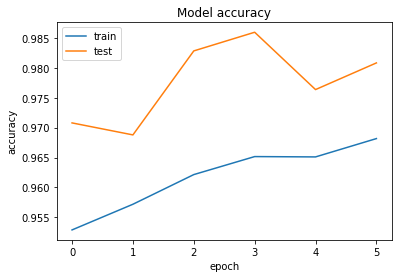

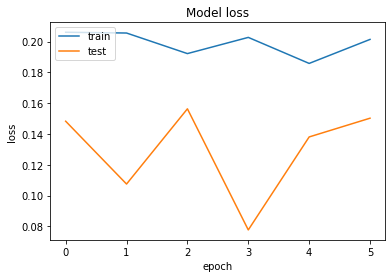

In [ ]:
plot_train_history(history_vgg)

In [ ]:

def test_model_and_submit(start=1, end=1, modelStr=''):
    img_rows, img_cols = 224, 224
    # batch_size = 64
    # random_state = 51
    nb_epoch = 15

    print('Start testing............')
    test_data, test_id = read_and_normalize_test_data(img_rows, img_cols,
                                                      color_type_global)
    yfull_test = []

    for index in range(start, end + 1):
        # Store test predictions
        model = read_model(index, modelStr)
        test_prediction = model.predict(test_data, batch_size=128, verbose=1)
        yfull_test.append(test_prediction)

    info_string = 'loss_' + modelStr \
                  + '_r_' + str(img_rows) \
                  + '_c_' + str(img_cols) \
                  + '_folds_' + str(end - start + 1) \
                  + '_ep_' + str(nb_epoch)

    test_res = merge_several_folds_mean(yfull_test, end - start + 1)
    create_submission(test_res, test_id, info_string)

# nfolds, nb_epoch, split
run_cross_validation(2, 20, 0.15, '_vgg_16_2x20')

# nb_epoch, split
# run_one_fold_cross_validation(10, 0.1)

# test_model_and_submit(1, 10, 'high_epoch')